# FINAL PROJECT - Introduction to Data Science
# Project 01 - House Price Prediction - 22KDL
# Group_17 - **Methodology**
# Performed by: Vƒ©nh Thu·∫≠n, Nh·ª±t Tr∆∞·ªùng, T·ª´ Th·ª©c

# Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # S·ª≠ d·ª•ng th∆∞ vi·ªán seaborn ƒë·ªÉ th·ª±c hi·ªán c√°c tr·ª±c quan h√≥a d·ªØ li·ªáu
import re
import pickle

%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# S·ª≠ d·ª•ng Pandas ƒë·ªÉ nh·∫≠p t·ªáp CSV v√†o m·ªôt dataframe
data = pd.read_csv('https://raw.githubusercontent.com/ThuanLy-0092/HousePrice_Prediction_Project/main/clean_data.csv')
data

Price  Acreage  Amenities_rating  Floors  days_since_min  Rooms  \
0      5.80       55               6.0       4             391      7   
1      4.97       43               2.7       3             391     12   
2     12.50       55               4.8       4             391      6   
3      4.00       40               3.0       3             391      7   
4      1.85       14               1.5       3             391      5   
...     ...      ...               ...     ...             ...    ...   
4628   5.99      109               6.0       2              77      6   
4629   3.00       83               6.0       1              70      2   
4630   5.20       40               4.8       3              73      6   
4631   7.00       40               3.3       4              76      6   
4632   7.50       49               4.8       2              76     10   

      Distance_to_center  
0               4.765578  
1               6.924790  
2               9.568381  
3               7.621127  
4               4.267616  
...                  ...  
4628           10.240432  
4629            3.135531  
4630            5.403038  
4631            4.068007  
4632            6.871485  

[4633 rows x 7 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               4633 non-null   float64
 1   Acreage             4633 non-null   int64  
 2   Amenities_rating    4633 non-null   float64
 3   Floors              4633 non-null   int64  
 4   days_since_min      4633 non-null   int64  
 5   Rooms               4633 non-null   int64  
 6   Distance_to_center  4633 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 253.5 KB


In [ ]:
data.describe()

Price      Acreage  Amenities_rating       Floors  \
count  4633.000000  4633.000000       4633.000000  4633.000000   
mean      5.757023    58.165120          3.989553     2.495359   
std       2.635153    21.567766          1.495279     0.865545   
min       0.105000     8.000000          0.000000     1.000000   
25%       4.000000    44.000000          3.000000     2.000000   
50%       5.500000    55.000000          4.500000     2.000000   
75%       7.000000    70.000000          4.800000     3.000000   
max      14.000000   126.000000          6.000000     4.000000   

       days_since_min        Rooms  Distance_to_center  
count     4633.000000  4633.000000         4633.000000  
mean       235.169868     6.359378           22.137518  
std        128.159106     2.404597          144.338302  
min          0.000000     2.000000            0.473467  
25%        108.000000     4.000000            4.064113  
50%        226.000000     6.000000            6.924790  
75%        357.000000     8.000000            9.384954  
max        460.000000    14.000000         3617.122274

# Methodology

## Design a methodology

### Ridge regression

- ***`Regularization`:*** S·ª≠ d·ª•ng norm L2 c·ªßa vector h·ªá s·ªë ƒë·ªÉ gi·∫£m thi·ªÉu h√†m m·ª•c ti√™u. Th√†nh ph·∫ßn regularization n√†y gi√∫p ki·ªÉm so√°t ƒë·ªô l·ªõn c·ªßa c√°c h·ªá s·ªë c·ªßa bi·∫øn ƒë·∫ßu v√†o, l√†m gi·∫£m s·ª± bi·∫øn ƒë·ªông c·ªßa m√¥ h√¨nh v√† gi·∫£m thi·ªÉu overfitting.

- ***Gi·∫£m thi·ªÉu overfitting:*** ƒê·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa Ridge Regression l√† gi·∫£m thi·ªÉu overfitting b·∫±ng c√°ch gi·ªõi h·∫°n ƒë·ªô l·ªõn c·ªßa c√°c h·ªá s·ªë. ƒêi·ªÅu n√†y l√†m gi·∫£m kh·∫£ nƒÉng m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c nhi·ªÖu t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán v√† c·∫£i thi·ªán kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh tr√™n d·ªØ li·ªáu m·ªõi.

- ***Ph∆∞∆°ng tr√¨nh h·ªìi quy c√≥ d·∫°ng chu·∫©n:*** Ridge Regression gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ c·ªßa ph∆∞∆°ng tr√¨nh h·ªìi quy b·ªã kh√¥ng ·ªïn ƒë·ªãnh (ill-conditioned) b·∫±ng c√°ch th√™m v√†o m·ªôt ph·∫ßn t·ª≠ ƒë∆∞·ªùng ch√©o trong ma tr·∫≠n h·ªá s·ªë. ƒêi·ªÅu n√†y ƒë·∫£m b·∫£o r·∫±ng ph∆∞∆°ng tr√¨nh h·ªìi quy lu√¥n c√≥ nghi·ªám duy nh·∫•t.

#### ƒê·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa Ridge regression

- ***Kh·∫£ nƒÉng x·ª≠ l√Ω ƒëa c·ªông tuy·∫øn:*** Ridge Regression c√≥ th·ªÉ x·ª≠ l√Ω t·ªët c√°c v·∫•n ƒë·ªÅ li√™n quan ƒë·∫øn ƒëa c·ªông tuy·∫øn, khi c√≥ s·ª± t∆∞∆°ng quan cao gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o.

- ***C√¢n b·∫±ng gi·ªØa ƒë·ªô l·ªõn c·ªßa h·ªá s·ªë v√† l·ªói d·ª± ƒëo√°n:*** Tham s·ªë alpha (Œª) trong Ridge Regression ƒëi·ªÅu ch·ªânh m·ª©c ƒë·ªô c·ªßa regularization. Gi√° tr·ªã c·ªßa alpha c√†ng cao th√¨ ƒë·ªô l·ªõn c·ªßa c√°c h·ªá s·ªë c√†ng gi·∫£m, v√† ng∆∞·ª£c l·∫°i.

- ***Y√™u c·∫ßu c√°c bi·∫øn ƒë·∫ßu v√†o ƒë∆∞·ª£c chu·∫©n h√≥a:*** Ridge Regression y√™u c·∫ßu c√°c bi·∫øn ƒë·∫ßu v√†o ƒë∆∞·ª£c chu·∫©n h√≥a ƒë·ªÉ c√°c h·ªá s·ªë c√≥ th·ªÉ so s√°nh ƒë∆∞·ª£c v·ªõi nhau. Vi·ªác n√†y ƒë·∫£m b·∫£o r·∫±ng m·ªói bi·∫øn ƒë·∫ßu v√†o c√≥ c√πng m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng ƒë·∫øn k·∫øt qu·∫£ d·ª± ƒëo√°n.

#### T√≠nh ph√π h·ª£p v·ªõi b√†i to√°n d·ª± ƒëo√°n gi√° nh√†
- ***Gi·∫£m thi·ªÉu overfitting:*** B√†i to√°n d·ª± ƒëo√°n gi√° nh√† th∆∞·ªùng c√≥ r·∫•t nhi·ªÅu bi·∫øn ƒë·∫ßu v√†o (nh∆∞ di·ªán t√≠ch, v·ªã tr√≠, s·ªë ph√≤ng ng·ªß, ti·ªán √≠ch xung quanh, ...) v√† c√≥ th·ªÉ d·ªÖ d√†ng b·ªã overfitting n·∫øu kh√¥ng ki·ªÉm so√°t ƒë∆∞·ª£c ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh. Ridge Regression gi√∫p gi·∫£m thi·ªÉu overfitting b·∫±ng c√°ch gi·ªõi h·∫°n ƒë·ªô l·ªõn c·ªßa c√°c h·ªá s·ªë, t·ª´ ƒë√≥ c·∫£i thi·ªán kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh tr√™n d·ªØ li·ªáu m·ªõi.

- ***Y√™u c·∫ßu chu·∫©n h√≥a bi·∫øn ƒë·∫ßu v√†o:*** Ridge Regression y√™u c·∫ßu c√°c bi·∫øn ƒë·∫ßu v√†o ƒë∆∞·ª£c chu·∫©n h√≥a ƒë·ªÉ c√°c h·ªá s·ªë c√≥ th·ªÉ so s√°nh ƒë∆∞·ª£c v·ªõi nhau. ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi b√†i to√°n d·ª± ƒëo√°n gi√° nh√†, v√¨ c√°c bi·∫øn ƒë·∫ßu v√†o nh∆∞ di·ªán t√≠ch, gi√° tr·ªã nh√† ƒë·ªÅu c√≥ thang ƒëo t∆∞∆°ng ƒë·ªëi l·ªõn v√† c·∫ßn ƒë∆∞·ª£c chu·∫©n h√≥a ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh c√¥ng b·∫±ng gi·ªØa c√°c bi·∫øn.

- ***C√¢n b·∫±ng gi·ªØa t·ªëc ƒë·ªô h·ªçc v√† hi·ªáu su·∫•t d·ª± ƒëo√°n:*** Tham s·ªë alpha trong Ridge Regression ƒëi·ªÅu ch·ªânh m·ª©c ƒë·ªô c·ªßa regularization. Vi·ªác l·ª±a ch·ªçn alpha ph√π h·ª£p s·∫Ω gi√∫p c√¢n b·∫±ng gi·ªØa t·ªëc ƒë·ªô h·ªçc c·ªßa m√¥ h√¨nh v√† kh·∫£ nƒÉng c·∫£i thi·ªán d·ª± ƒëo√°n. ƒêi·ªÅu n√†y r·∫•t quan tr·ªçng trong b√†i to√°n d·ª± ƒëo√°n gi√° nh√†, khi m√¥ h√¨nh c·∫ßn ph·∫£i c√≥ kh·∫£ nƒÉng d·ª± ƒëo√°n ch√≠nh x√°c v√† ƒë·ªìng th·ªùi tr√°nh overfitting.

#### Si√™u tham s·ªë `ridge__alpha`
- `alpha` l√† si√™u tham s·ªë trong Ridge Regression quy ƒë·ªãnh m·ª©c ƒë·ªô c·ªßa regularization. N√≥ quy·∫øt ƒë·ªãnh ƒë·ªô l·ªõn c·ªßa h·ªá s·ªë chu·∫©n ho√° L2 ƒë∆∞·ª£c th√™m v√†o h√†m m·ª•c ti√™u.
- Gi√° tr·ªã c·ªßa `alpha` ƒë∆∞·ª£c ch·ªçn c√†ng cao, m√¥ h√¨nh s·∫Ω c√†ng ƒë∆∞·ª£c ki·ªÉm so√°t m·ªôt c√°ch nghi√™m ng·∫∑t h∆°n, d·∫´n ƒë·∫øn c√°c h·ªá s·ªë h·ªìi quy (coefficients) c·ªßa m√¥ h√¨nh c√≥ xu h∆∞·ªõng gi·∫£m xu·ªëng g·∫ßn v·ªõi 0. ƒêi·ªÅu n√†y c√≥ th·ªÉ gi·∫£m thi·ªÉu overfitting nh∆∞ng c≈©ng c√≥ th·ªÉ l√†m gi·∫£m hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh n·∫øu m·ª©c ƒë·ªô regularization qu√° cao.
- Ng∆∞·ª£c l·∫°i, n·∫øu `alpha` qu√° th·∫•p, m√¥ h√¨nh s·∫Ω √≠t b·ªã ki·ªÉm so√°t v√† c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting tr√™n t·∫≠p hu·∫•n luy·ªán.


#### Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u cho alpha
- ***S·ªë l∆∞·ª£ng bi·∫øn ƒë·∫ßu v√†o v√† s·ª± t∆∞∆°ng quan:*** N·∫øu c√≥ nhi·ªÅu bi·∫øn ƒë·∫ßu v√†o v√† c√°c bi·∫øn n√†y c√≥ m·ª©c ƒë·ªô t∆∞∆°ng quan cao, c√≥ th·ªÉ c·∫ßn ƒë·∫øn c√°c gi√° tr·ªã alpha l·ªõn ƒë·ªÉ gi·∫£m thi·ªÉu overfitting.

- ***S·ª± ph√¢n t√°n c·ªßa d·ªØ li·ªáu:*** N·∫øu d·ªØ li·ªáu c√≥ s·ª± ph√¢n t√°n l·ªõn, ƒë√¥i khi c·∫ßn ƒë·∫øn c√°c gi√° tr·ªã alpha l·ªõn h∆°n ƒë·ªÉ m√¥ h√¨nh kh√¥ng b·ªã ·∫£nh h∆∞·ªüng qu√° m·ª©c b·ªüi c√°c ƒëi·ªÉm d·ªØ li·ªáu nhi·ªÖu.

- ***M·ª•c ti√™u c·ªßa m√¥ h√¨nh:*** N·∫øu m·ª•c ti√™u l√† c√≥ m·ªôt m√¥ h√¨nh ƒë∆°n gi·∫£n v√† d·ª± ƒëo√°n ·ªïn ƒë·ªãnh, c√≥ th·ªÉ c·∫ßn ƒë·∫øn c√°c gi√° tr·ªã alpha l·ªõn h∆°n ƒë·ªÉ ki·ªÉm so√°t m·ª©c ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh.

- ###   [ 0.00015, 0.0015, 0.015, 0.15, 1, 10, 100 ]
- `0.00015, 0.0015, 0.015:` M·ªôt gi√° tr·ªã nh·ªè ƒë·ªÉ ki·ªÉm tra m·ª©c ƒë·ªô regularization y·∫øu.
- `0.15, 1:` C√°c gi√° tr·ªã v·ª´a ph·∫£i, ph√π h·ª£p cho h·∫ßu h·∫øt c√°c tr∆∞·ªùng h·ª£p v√† d·ªØ li·ªáu.
- `10, 100:` C√°c gi√° tr·ªã l·ªõn h∆°n, d√πng ƒë·ªÉ ki·ªÉm tra m·ª©c ƒë·ªô regularization m·∫°nh h∆°n.

 ***Kho·∫£ng gi√° tr·ªã tr√™n l√† m·ªôt l·ª±a ch·ªçn ph·ªï bi·∫øn v√† c√≥ th·ªÉ √°p d·ª•ng r·ªông r√£i cho nhi·ªÅu tr∆∞·ªùng h·ª£p. Tuy nhi√™n, ƒë·ªÉ x√°c ƒë·ªãnh ch√≠nh x√°c kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u cho alpha, b·∫°n n√™n th·ª≠ nghi·ªám v√† ƒë√°nh gi√° k·∫øt qu·∫£ tr√™n c√°c m√¥ h√¨nh hu·∫•n luy·ªán ƒë·ªÉ ch·ªçn ra gi√° tr·ªã alpha t·ªët nh·∫•t cho t·ª´ng tr∆∞·ªùng h·ª£p c·ª• th·ªÉ.***

###Ridge Regression- with polynomial

- C√°c ƒë·∫∑c ƒëi·ªÉm t∆∞∆°ng t·ª± v·ªõi Ridge regression

- Ridge Regression s·ª≠ d·ª•ng c√°c bi·∫øn ƒëa th·ª©c c·ªßa c√°c bi·∫øn g·ªëc ƒë·ªÉ m·ªü r·ªông kh√¥ng gian ƒë·∫∑c tr∆∞ng c·ªßa m√¥ h√¨nh. V√≠ d·ª•, n·∫øu ban ƒë·∫ßu c√≥ m·ªôt bi·∫øn x, th√¨ c√°c bi·∫øn ƒëa th·ª©c b·∫≠c hai s·∫Ω l√† x^2, x^3 , v√† c√°c b·∫≠c cao h∆°n.

- Vi·ªác th√™m c√°c bi·∫øn ƒëa th·ª©c gi√∫p m√¥ h√¨nh c√≥ th·ªÉ bi·ªÉu di·ªÖn ƒë∆∞·ª£c c√°c m·ªëi quan h·ªá phi tuy·∫øn gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o v√† bi·∫øn m·ª•c ti√™u m·ªôt c√°ch ch√≠nh x√°c h∆°n.

- ***T·ªëi ∆∞u h√≥a:*** M·ª•c ti√™u c·ªßa Ridge Regression l√† t·ªëi thi·ªÉu h√≥a h√†m m·∫•t m√°t, bao g·ªìm c·∫£ th√†nh ph·∫ßn l·ªói v√† th√†nh ph·∫ßn regularization. M·ªôt ph·∫ßn c·ªßa h√†m m·∫•t m√°t s·∫Ω bao g·ªìm c√°c h·∫°ng t·ª≠ ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng m√¥ h√¨nh ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a sao cho d·ª± ƒëo√°n ch√≠nh x√°c tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán v√† t·ªïng qu√°t h√≥a t·ªët tr√™n d·ªØ li·ªáu m·ªõi.

- ***L·ª±a ch·ªçn m·ª©c ƒë·ªô ƒëa th·ª©c:*** Vi·ªác l·ª±a ch·ªçn m·ª©c ƒë·ªô c·ªßa ƒëa th·ª©c (s·ªë l∆∞·ª£ng bi·∫øn ƒëa th·ª©c) l√† quan tr·ªçng ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c s·ª± c√¢n b·∫±ng gi·ªØa underfitting v√† overfitting. M·ª©c ƒë·ªô cao h∆°n c·ªßa ƒëa th·ª©c c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting, trong khi m·ª©c ƒë·ªô th·∫•p h∆°n c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting. ƒêi·ªÅu n√†y y√™u c·∫ßu s·ª± ƒëi·ªÅu ch·ªânh v√† ki·ªÉm so√°t c·∫©n th·∫≠n ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c m·ªôt m√¥ h√¨nh c√≥ hi·ªáu su·∫•t t·ªët tr√™n d·ªØ li·ªáu th·ª±c t·∫ø.

- ***Ph√π h·ª£p v·ªõi b√†i to√°n:*** M√¥ h√¨nh Ridge Regression s·ª≠ d·ª•ng ƒë·∫∑c tr∆∞ng ƒëa th·ª©c ph√π h·ª£p v·ªõi c√°c b√†i to√°n m√† d·ªØ li·ªáu c√≥ nhi·ªÅu bi·∫øn ƒë·∫ßu v√†o v√† c√≥ m·ªëi quan h·ªá ph·ª©c t·∫°p gi·ªØa c√°c bi·∫øn n√†y v√† bi·∫øn m·ª•c ti√™u. ƒê·∫∑c bi·ªát l√† trong c√°c b√†i to√°n d·ª± ƒëo√°n gi√° nh√†, khi c√°c y·∫øu t·ªë nh∆∞ di·ªán t√≠ch, v·ªã tr√≠, ti·ªán √≠ch xung quanh c√≥ th·ªÉ ·∫£nh h∆∞·ªüng kh√¥ng ch·ªâ tuy·∫øn t√≠nh m√† c√≤n phi tuy·∫øn t√≠nh ƒë·∫øn gi√° nh√†.

#### Si√™u tham s·ªë `poly__degree` & `ridge__alpha`
- ***Khi `poly__degree = 1`:*** Kh√¥ng c√≥ ƒë·∫∑c tr∆∞ng ƒëa th·ª©c n√†o ƒë∆∞·ª£c th√™m v√†o, ch·ªâ c√≥ c√°c bi·∫øn g·ªëc ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ª± ƒëo√°n.
- ***Khi `poly__degree > 1`:*** Ch√∫ng ta s·∫Ω t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi t·ª´ c√°c bi·∫øn g·ªëc b·∫±ng c√°ch th√™m c√°c ƒëa th·ª©c c·ªßa ch√∫ng, v√≠ d·ª• nh∆∞ b√¨nh ph∆∞∆°ng (x^2), l·∫≠p ph∆∞∆°ng (x^3), v.v. C√°c ƒë·∫∑c tr∆∞ng n√†y c√≥ th·ªÉ gi√∫p m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c m·ªëi quan h·ªá phi tuy·∫øn gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o v√† bi·∫øn m·ª•c ti√™u.

- ***Khi `ridge__alpha c√†ng l·ªõn`:*** M·ª©c ƒë·ªô regularization c√†ng cao, c√°c h·ªá s·ªë c·ªßa m√¥ h√¨nh s·∫Ω ƒë∆∞·ª£c gi·∫£m gi√° tr·ªã ƒë·ªÉ tr√°nh m√¥ h√¨nh qu√° ph·ª©c t·∫°p.
- ***Khi `ridge__alpha c√†ng nh·ªè`:*** M√¥ h√¨nh s·∫Ω c√≥ xu h∆∞·ªõng t·ªëi ∆∞u h√≥a ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán, nh∆∞ng c√≥ nguy c∆° overfitting.

#### Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u cho m√¥ h√¨nh
- `poly__degree`: Th∆∞·ªùng n√™n b·∫Øt ƒë·∫ßu v·ªõi c√°c gi√° tr·ªã nh·ªè v√† tƒÉng d·∫ßn ƒë·ªÉ xem m·ª©c ƒë·ªô c·∫£i thi·ªán c·ªßa m√¥ h√¨nh. Th√¥ng th∆∞·ªùng, c√°c gi√° tr·ªã t·ª´ 1 ƒë·∫øn 3 th∆∞·ªùng l√† l·ª±a ch·ªçn ph·ªï bi·∫øn. C√°c b·∫≠c cao h∆°n c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng n·∫øu c√≥ s·ª± ph·ª• thu·ªôc phi tuy·∫øn m·∫°nh gi·ªØa bi·∫øn ƒë·∫ßu v√†o v√† bi·∫øn m·ª•c ti√™u.
- ### ***poly__degree***: [1, 2, 3, 4, 5]


- `ridge__alpha`: C·∫ßn th·ª≠ nghi·ªám c√°c gi√° tr·ªã kh√°c nhau trong m·ªôt kho·∫£ng ƒëa d·∫°ng t·ª´ r·∫•t nh·ªè ƒë·∫øn l·ªõn. C√°c gi√° tr·ªã th∆∞·ªùng ƒë∆∞·ª£c l·ª±a ch·ªçn l√† t·ª´ 0.001 ƒë·∫øn 1000. Vi·ªác ch·ªçn ridge__alpha c≈©ng ph·ª• thu·ªôc v√†o t·ª∑ l·ªá c·ªßa bi·∫øn ƒë·∫ßu v√†o, v√† s·ª± ph√¢n lo·∫°i c·ªßa d·ªØ li·ªáu.

- ### ***ridge__alpha***: [0.00015, 0.0015, 0.015, 0.15, 1, 10, 100, 1000, 10000]




- ***Ki·ªÉm tra hi·ªáu su·∫•t m√¥ h√¨nh:***
Sau khi hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi c√°c tham s·ªë n√†y, b·∫°n n√™n ƒë√°nh gi√° hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh tr√™n t·∫≠p ki·ªÉm tra b·∫±ng c√°c ch·ªâ s·ªë nh∆∞ Mean Squared Error (MSE), Mean Absolute Error (MAE), v√† R-squared (R2). Nh·ªØng ch·ªâ s·ªë n√†y s·∫Ω gi√∫p b·∫°n bi·∫øt ƒë∆∞·ª£c m·ª©c ƒë·ªô ch√≠nh x√°c v√† kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh.


- ***ƒêi·ªÅu ch·ªânh v√† t·ªëi ∆∞u h√≥a:***
N·∫øu hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh ch∆∞a ƒë·∫°t y√™u c·∫ßu, b·∫°n c√≥ th·ªÉ c√¢n nh·∫Øc th·ª≠ c√°c gi√° tr·ªã poly__degree l·ªõn h∆°n (nh∆∞ 6, 7) ho·∫∑c tƒÉng d·∫ßn t·ª´ng b∆∞·ªõc ƒë·ªÉ xem s·ª± thay ƒë·ªïi. ƒê·ªëi v·ªõi ridge__alpha, b·∫°n c√≥ th·ªÉ th·ª≠ c√°c gi√° tr·ªã n·∫±m gi·ªØa c√°c kho·∫£ng gi√° tr·ªã ƒë√£ ch·ªçn (v√≠ d·ª•: 0.001, 0.01, 0.1, 1, 100, 1000) ƒë·ªÉ ki·ªÉm tra s·ª± ·∫£nh h∆∞·ªüng c·ªßa t·ª´ng gi√° tr·ªã.

### Random Forest

- ***`Ensemble Learning`:*** Random Forest l√† m·ªôt ph∆∞∆°ng ph√°p trong h·ªç Ensemble Learning, n∆°i n√≥ x√¢y d·ª±ng nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh ƒë·ªôc l·∫≠p v√† k·∫øt h·ª£p ch√∫ng ƒë·ªÉ c·∫£i thi·ªán d·ª± ƒëo√°n.
- ***`C√°c c√¢y quy·∫øt ƒë·ªãnh (Decision Trees)`:*** M·ªói c√¢y quy·∫øt ƒë·ªãnh trong Random Forest ƒë∆∞·ª£c x√¢y d·ª±ng ƒë·ªôc l·∫≠p d·ª±a tr√™n m·ªôt ph·∫ßn c·ªßa d·ªØ li·ªáu hu·∫•n luy·ªán v√† m·ªôt s·ªë ƒë·∫∑c tr∆∞ng ng·∫´u nhi√™n.
- ***`Bootstrap v√† Bagging`:*** Random Forest s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p Bootstrap ƒë·ªÉ l·∫•y m·∫´u d·ªØ li·ªáu cho m·ªói c√¢y quy·∫øt ƒë·ªãnh, v√† k·∫øt h·ª£p ph∆∞∆°ng ph√°p Bagging ƒë·ªÉ gi·∫£m ph∆∞∆°ng sai (variance) c·ªßa m√¥ h√¨nh.
- ***`T√≠nh ng·∫´u nhi√™n`:*** ƒê·∫∑c ƒëi·ªÉm quan tr·ªçng c·ªßa Random Forest l√† s·ª± ng·∫´u nhi√™n trong vi·ªác l·ª±a ch·ªçn c√°c ƒë·∫∑c tr∆∞ng v√† m·∫´u d·ªØ li·ªáu cho m·ªói c√¢y quy·∫øt ƒë·ªãnh, gi√∫p gi·∫£m thi·ªÉu overfitting v√† c·∫£i thi·ªán kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh.

#### ƒê·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa Random Forest
-  ***Kh·∫£ nƒÉng x·ª≠ l√Ω d·ªØ li·ªáu l·ªõn v√† ƒëa ƒë·∫∑c tr∆∞ng:*** RF ph√π h·ª£p v·ªõi c√°c b√†i to√°n d·ª± ƒëo√°n tr√™n d·ªØ li·ªáu c√≥ nhi·ªÅu ƒë·∫∑c tr∆∞ng v√† c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω c√°c m·ªëi quan h·ªá ph·ª©c t·∫°p gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† bi·∫øn m·ª•c ti√™u.
- ***X·ª≠ l√Ω bi·∫øn s·ªë kh√¥ng tuy·∫øn t√≠nh:*** V·ªõi kh·∫£ nƒÉng x·ª≠ l√Ω c√°c m·ªëi quan h·ªá kh√¥ng tuy·∫øn t√≠nh, Random Forest c√≥ th·ªÉ hi·ªáu qu·∫£ trong vi·ªác d·ª± ƒëo√°n c√°c bi·∫øn s·ªë ph·ª©c t·∫°p nh∆∞ gi√° nh√†.
- ***·ªîn ƒë·ªãnh v√† d·ªÖ s·ª≠ d·ª•ng:*** RF l√† m·ªôt ph∆∞∆°ng ph√°p ·ªïn ƒë·ªãnh v√† d·ªÖ s·ª≠ d·ª•ng, kh√¥ng y√™u c·∫ßu nhi·ªÅu si√™u tham s·ªë (hyperparameters) ƒëi·ªÅu ch·ªânh so v·ªõi c√°c ph∆∞∆°ng ph√°p kh√°c nh∆∞ SVM hay Neural Networks.

#### T√≠nh ph√π h·ª£p v·ªõi b√†i to√°n d·ª± ƒëo√°n gi√° nh√†:
- ***D·ªØ li·ªáu c√≥ nhi·ªÅu ƒë·∫∑c tr∆∞ng:*** B√†i to√°n d·ª± ƒëo√°n gi√° nh√† th∆∞·ªùng c√≥ r·∫•t nhi·ªÅu ƒë·∫∑c tr∆∞ng nh∆∞ di·ªán t√≠ch, v·ªã tr√≠, ti·ªán √≠ch xung quanh, lo·∫°i h√¨nh nh√† ƒë·∫•t, nƒÉm x√¢y d·ª±ng, v√† nhi·ªÅu y·∫øu t·ªë kh√°c. RF c√≥ th·ªÉ x·ª≠ l√Ω hi·ªáu qu·∫£ c√°c b·ªô d·ªØ li·ªáu ph·ª©c t·∫°p v·ªõi nhi·ªÅu ƒë·∫∑c tr∆∞ng n√†y.

- ***M·ªëi quan h·ªá kh√¥ng tuy·∫øn t√≠nh:*** Gi√° nh√† th∆∞·ªùng ph·ª• thu·ªôc v√†o c√°c y·∫øu t·ªë kh√¥ng tuy·∫øn t√≠nh v√† t∆∞∆°ng t√°c ph·ª©c t·∫°p gi·ªØa c√°c ƒë·∫∑c tr∆∞ng. RF c√≥ kh·∫£ nƒÉng m√¥ h√¨nh h√≥a c√°c m·ªëi quan h·ªá n√†y m·ªôt c√°ch linh ho·∫°t v√† hi·ªáu qu·∫£.

- ***·ªîn ƒë·ªãnh v√† ch√≠nh x√°c:*** Nh·ªù v√†o s·ª± k·∫øt h·ª£p c·ªßa nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh ƒë·ªôc l·∫≠p v√† k·ªπ thu·∫≠t ng·∫´u nhi√™n, RF th∆∞·ªùng cho k·∫øt qu·∫£ d·ª± ƒëo√°n ·ªïn ƒë·ªãnh v√† c√≥ ƒë·ªô ch√≠nh x√°c cao, gi√∫p c√°c nh√† ph√¢n t√≠ch d·ª± ƒëo√°n gi√° nh√† m·ªôt c√°ch ch√≠nh x√°c v√† ƒë√°ng tin c·∫≠y.

#### Si√™u tham s·ªë c·ªßa Random Forest Regressor
`n_estimators:`

- ***√ù nghƒ©a:*** S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng ng·∫´u nhi√™n.
- ***Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:***
Th√¥ng th∆∞·ªùng, c√°c gi√° tr·ªã t·ª´ 100 ƒë·∫øn 500 l√† ƒë·ªß cho h·∫ßu h·∫øt c√°c ·ª©ng d·ª•ng. Tuy nhi√™n, s·ªë l∆∞·ª£ng c√¢y l·ªõn h∆°n c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t nh∆∞ng c≈©ng tƒÉng th·ªùi gian t√≠nh to√°n.
- **`n_estimators:` [100, 200, 300]** l√† m·ªôt kho·∫£ng gi√° tr·ªã h·ª£p l√Ω ƒë·ªÉ b·∫Øt ƒë·∫ßu, nh∆∞ng c√≥ th·ªÉ m·ªü r·ªông t·ªõi 500 ho·∫∑c 1000 n·∫øu m√¥ h√¨nh v·∫´n c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t v·ªõi nhi·ªÅu c√¢y h∆°n.


`max_depth:`

- ***√ù nghƒ©a:*** ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa m·ªói c√¢y quy·∫øt ƒë·ªãnh s·ªë l∆∞·ª£ng c√°c quy·∫øt ƒë·ªãnh (decision points) trong m·ªôt c√¢y.
- ***Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:***
Gi√° tr·ªã None c√≥ nghƒ©a l√† c√°c c√¢y s·∫Ω ph√°t tri·ªÉn cho ƒë·∫øn khi t·∫•t c·∫£ c√°c l√° ch·ª©a √≠t nh·∫•t min_samples_split m·∫´u.
C√°c gi√° tr·ªã ph·ªï bi·∫øn l√† t·ª´ 10 ƒë·∫øn 30. Trong m·ªôt s·ªë tr∆∞·ªùng h·ª£p, gi√° tr·ªã None c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting.
- **`max_depth:` [None, 10, 20, 30]** l√† m·ªôt kho·∫£ng gi√° tr·ªã t·ªët ƒë·ªÉ th·ª≠ nghi·ªám.


`min_samples_split:`

- ***√ù nghƒ©a:*** S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu c·∫ßn thi·∫øt ƒë·ªÉ chia m·ªôt n√∫t.
- ***Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:***
C√°c gi√° tr·ªã ph·ªï bi·∫øn t·ª´ 2 ƒë·∫øn 10.
- **`min_samples_split:` [2, 5, 10]** l√† m·ªôt kho·∫£ng gi√° tr·ªã h·ª£p l√Ω ƒë·ªÉ ki·ªÉm tra.
Gi√° tr·ªã nh·ªè c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting, trong khi gi√° tr·ªã l·ªõn c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting.


`min_samples_leaf:`

- ***√ù nghƒ©a:*** S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu tr√™n m·ªói l√°.
- ***Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:***
C√°c gi√° tr·ªã ph·ªï bi·∫øn t·ª´ 1 ƒë·∫øn 5.
- **`min_samples_leaf:` [1, 2, 4]** l√† m·ªôt kho·∫£ng gi√° tr·ªã h·ª£p l√Ω ƒë·ªÉ th·ª≠ nghi·ªám.
Gi√° tr·ªã nh·ªè c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting, gi√° tr·ªã l·ªõn c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting.

`max_features:`

- ***√ù nghƒ©a:*** S·ªë l∆∞·ª£ng features t·ªëi ƒëa c·∫ßn thi·∫øt ƒë·ªÉ c√¢n nh·∫Øc khi t√¨m split point.
- ***Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:***
C√°c gi√° tr·ªã ph·ªï bi·∫øn l√† auto (s·ª≠ d·ª•ng t·∫•t c·∫£ c√°c features), sqrt (cƒÉn b·∫≠c hai c·ªßa t·ªïng s·ªë features) v√† log2 (log c∆° s·ªë 2 c·ªßa t·ªïng s·ªë features).
- **`max_features:` ['auto', 'sqrt', 'log2']** l√† c√°c gi√° tr·ªã h·ª£p l√Ω ƒë·ªÉ th·ª≠ nghi·ªám.

#### L∆∞u √Ω:
- **Overfitting:** ƒêi·ªÅu ch·ªânh c√°c si√™u tham s·ªë nh∆∞ max_depth, min_samples_split, v√† min_samples_leaf ƒë·ªÉ tr√°nh overfitting.
- **Th·ªùi gian hu·∫•n luy·ªán:** S·ªë l∆∞·ª£ng c√¢y (n_estimators) c√†ng l·ªõn th√¨ th·ªùi gian hu·∫•n luy·ªán c√†ng l√¢u. C√¢n nh·∫Øc gi·ªØa hi·ªáu su·∫•t v√† th·ªùi gian hu·∫•n luy·ªán.
- **Cross-validation:** S·ª≠ d·ª•ng cross-validation ƒë·ªÉ ki·ªÉm tra hi·ªáu su·∫•t c·ªßa c√°c si√™u tham s·ªë v√† ch·ªçn gi√° tr·ªã t·ªëi ∆∞u.

### XGboosting l√† m·ªôt bi·∫øn th·ªÉ ƒë∆∞·ª£c c·∫£i ti·∫øn c·ªßa Gradient Boosting


- ***`XGBoosting`***: XGB l√† m·ªôt ph∆∞∆°ng ph√°p thu·ªôc h·ªç `Boosting` (M·ª•c ti√™u l√† gi·∫£m bias - √°p d·ª•ng cho c√°c model c√≥ variance th·∫•p v√† b·ªã bias cao).
 Boosting s·∫Ω t·∫°o ra m·ªôt lo·∫°t c√°c model y·∫øu, h·ªçc b·ªï sung l·∫´n nhau. N√≥i c√°ch kh√°c, trong Boosting, c√°c model sau s·∫Ω c·ªë g·∫Øng h·ªçc ƒë·ªÉ h·∫°n ch·∫ø l·ªói l·∫ßm c·ªßa c√°c model tr∆∞·ªõc.

- ***C·∫£i ti·∫øn t·ª´ `Gradient Boosting`***: XGBoost c·∫£i ti·∫øn t·ª´ Gradient Boosting b·∫±ng c√°ch √°p d·ª•ng nhi·ªÅu k·ªπ thu·∫≠t nh∆∞ regularization ƒë·ªÉ gi·∫£m overfitting, h·ªó tr·ª£ t√≠nh to√°n song song ƒë·ªÉ tƒÉng t·ªëc ƒë·ªô hu·∫•n luy·ªán, v√† c·∫£i thi·ªán x·ª≠ l√Ω d·ªØ li·ªáu th∆∞a (sparse data).

- ***Thu·∫≠t to√°n `c√¢y quy·∫øt ƒë·ªãnh(Decision Tree)`***: T∆∞∆°ng t·ª± nh∆∞ Gradient Boosting, XGBoost s·ª≠ d·ª•ng c√°c c√¢y quy·∫øt ƒë·ªãnh nh·ªè ƒë·ªÉ x√¢y d·ª±ng m√¥ h√¨nh. M·ªói c√¢y quy·∫øt ƒë·ªãnh ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh ƒë·ªÉ c·∫£i thi·ªán d·ª± ƒëo√°n m·ªôt c√°ch hi·ªáu qu·∫£ h∆°n.

- ***`Learning rate`***: XGBoost s·ª≠ d·ª•ng tham s·ªë shrinkage (learning rate) ƒë·ªÉ ƒëi·ªÅu ch·ªânh t·ªëc ƒë·ªô h·ªçc c·ªßa m·ªói c√¢y. Tham s·ªë n√†y gi√∫p c√¢n b·∫±ng gi·ªØa t·ªëc ƒë·ªô h·ªçc v√† vi·ªác c·∫£i thi·ªán d·ª± ƒëo√°n.


#### ƒê·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa Gradient Boosting:
- ***X·ª≠ l√Ω l·ªói (Residuals):*** M·ªói c√¢y quy·∫øt ƒë·ªãnh trong m√¥ h√¨nh Gradient Boosting ƒë∆∞·ª£c x√¢y d·ª±ng ƒë·ªÉ d·ª± ƒëo√°n ph·∫ßn d∆∞ (residuals) c·ªßa d·ª± ƒëo√°n t·ª´ m√¥ h√¨nh tr∆∞·ªõc ƒë√≥.

- ***T√≠ch h·ª£p nhi·ªÅu m√¥ h√¨nh nh·ªè:*** Gradient Boosting k·∫øt h·ª£p nhi·ªÅu m√¥ h√¨nh nh·ªè (c√¢y quy·∫øt ƒë·ªãnh) ƒë·ªÉ t·∫°o ra m·ªôt m√¥ h√¨nh t·ªïng h·ª£p m·∫°nh m·∫Ω.

- ***ƒêi·ªÅu ch·ªânh t·ªëc ƒë·ªô h·ªçc:*** S·ª≠ d·ª•ng tham s·ªë shrinkage (learning rate) ƒë·ªÉ ƒëi·ªÅu ch·ªânh m·ª©c ƒë·ªô m√† m·ªói c√¢y m·ªõi c·∫£i thi·ªán d·ª± ƒëo√°n.

#### T√≠nh ph√π h·ª£p v·ªõi b√†i to√°n d·ª± ƒëo√°n gi√° nh√†:
- ***Ph√π h·ª£p v·ªõi d·ªØ li·ªáu c√≥ nhi·ªÅu ƒë·∫∑c tr∆∞ng:*** Gradient Boosting c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω t·ªët d·ªØ li·ªáu c√≥ nhi·ªÅu ƒë·∫∑c tr∆∞ng v√† m·ªëi quan h·ªá ph·ª©c t·∫°p gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† m·ª•c ti√™u.

- ***X·ª≠ l√Ω bi·∫øn s·ªë kh√¥ng tuy·∫øn t√≠nh:*** Gi√° nh√† th∆∞·ªùng b·ªã ·∫£nh h∆∞·ªüng b·ªüi nhi·ªÅu y·∫øu t·ªë kh√¥ng tuy·∫øn t√≠nh, v√† Gradient Boosting c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω c√°c m·ªëi quan h·ªá ph·ª©c t·∫°p n√†y.

- ***Kh·∫£ nƒÉng kh·∫Øc ph·ª•c l·ªói:*** B·∫±ng c√°ch d·ª± ƒëo√°n ph·∫ßn d∆∞ v√† c·∫£i thi·ªán d·∫ßn d·∫ßn, Gradient Boosting c√≥ th·ªÉ gi·∫£m thi·ªÉu l·ªói d·ª± ƒëo√°n m·ªôt c√°ch hi·ªáu qu·∫£.


#### Si√™u tham s·ªë trong XGBoosting
`learning_rate:`

- **√ù nghƒ©a**: T·ªëc ƒë·ªô h·ªçc c·ªßa m√¥ h√¨nh. Gi√° tr·ªã nh·ªè h∆°n l√†m gi·∫£m t·ªëc ƒë·ªô h·ªçc nh∆∞ng c√≥ th·ªÉ d·∫´n ƒë·∫øn m√¥ h√¨nh t·ªët h∆°n b·∫±ng c√°ch gi·∫£m thi·ªÉu overfitting.
- **Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:** Th√¥ng th∆∞·ªùng n·∫±m trong kho·∫£ng t·ª´ 0.01 ƒë·∫øn 0.2. C√°c gi√° tr·ªã l·ªõn h∆°n c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting.
- `learning_rate`: [0.01, 0.05, 0.1, 0.2]

`max_depth:`

- **√ù nghƒ©a:** ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa m·ªói c√¢y trong m√¥ h√¨nh. ƒê·ªô s√¢u l·ªõn h∆°n cho ph√©p m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c nhi·ªÅu th√¥ng tin h∆°n t·ª´ d·ªØ li·ªáu nh∆∞ng c≈©ng tƒÉng nguy c∆° overfitting.
- **Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:** Th√¥ng th∆∞·ªùng t·ª´ 3 ƒë·∫øn 10. Gi√° tr·ªã nh·ªè h∆°n c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting, gi√° tr·ªã l·ªõn h∆°n c√≥ th·ªÉ d·∫´n ƒë·∫øn overfitting.
- `max_depth`: [3, 4, 5, 6,7,8,9,10]

`n_estimators:`

- **√ù nghƒ©a:** S·ªë l∆∞·ª£ng c√¢y trong m√¥ h√¨nh. S·ªë l∆∞·ª£ng c√¢y l·ªõn h∆°n c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t nh∆∞ng c≈©ng tƒÉng th·ªùi gian t√≠nh to√°n.
- **Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:** Th√¥ng th∆∞·ªùng t·ª´ 100 ƒë·∫øn 400. Gi√° tr·ªã l·ªõn h∆°n c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t nh∆∞ng c≈©ng tƒÉng th·ªùi gian hu·∫•n luy·ªán v√† nguy c∆° overfitting.
- `n_estimators`: [100, 200, 300, 400]

`subsample:`

- **√ù nghƒ©a:** T·ª∑ l·ªá m·∫´u ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ hu·∫•n luy·ªán m·ªói c√¢y. Gi√° tr·ªã nh·ªè h∆°n 1.0 gi√∫p gi·∫£m overfitting.
- **Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:** Th√¥ng th∆∞·ªùng t·ª´ 0.6 ƒë·∫øn 1.0. Gi√° tr·ªã th·∫•p h∆°n c√≥ th·ªÉ gi√∫p m√¥ h√¨nh t·ªïng qu√°t h√≥a t·ªët h∆°n nh∆∞ng c≈©ng c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting n·∫øu qu√° th·∫•p.
- `subsample`: [0.6, 0.7, 0.8, 0.9, 1.0]

`colsample_bytree:`

- **√ù nghƒ©a:** T·ª∑ l·ªá c√°c features ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ hu·∫•n luy·ªán m·ªói c√¢y. Gi√° tr·ªã nh·ªè h∆°n 1.0 gi√∫p gi·∫£m overfitting.
- **Kho·∫£ng gi√° tr·ªã t·ªëi ∆∞u:** Th√¥ng th∆∞·ªùng t·ª´ 0.6 ƒë·∫øn 1.0. Gi√° tr·ªã th·∫•p h∆°n c√≥ th·ªÉ gi√∫p m√¥ h√¨nh t·ªïng qu√°t h√≥a t·ªët h∆°n nh∆∞ng c≈©ng c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting n·∫øu qu√° th·∫•p.
- `colsample_bytree`: [0.6, 0.7, 0.8, 0.9, 1.0]

### References

* [Python sklearn model selection documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Python sklearn GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Python sklearn RandomizedSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
* [Python sklearn StratifiedKFold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
* [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)
* [Hyperopt documentation](http://hyperopt.github.io/hyperopt/)
* [Hyperopt Github](https://github.com/hyperopt/hyperopt/wiki/FMin)
* [max_delta_step in xgboost](https://stats.stackexchange.com/questions/233248/max-delta-step-in-xgboost)

## Prepare Data

Text(0.5, 1.0, 'Correlation Heatmap')

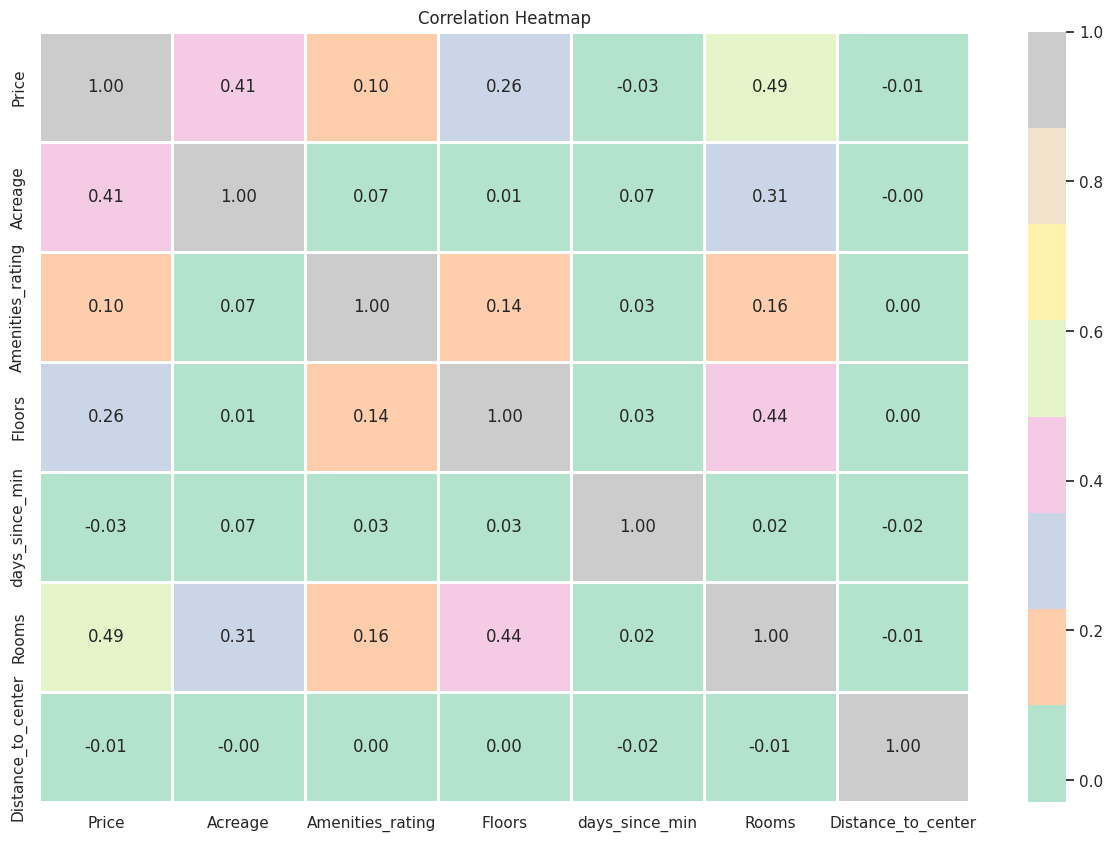

In [ ]:
# T√≠nh ma tr·∫≠n t∆∞∆°ng quan cho t·∫•t c·∫£ c√°c c·ªôt
corr_matrix = data.corr()

# Thi·∫øt l·∫≠p h√¨nh matplotlib
plt.figure(figsize=(15, 10))

# S·ª≠ d·ª•ng Seaborn ƒë·ªÉ t·∫°o b·∫£n ƒë·ªì nhi·ªát
sns.heatmap(corr_matrix, annot= True, fmt = '.2f', cmap = 'Pastel2', linewidths = 2)

# Ti√™u ƒë·ªÅ
plt.title('Correlation Heatmap')

In [ ]:
X = data.drop('Price',axis=1)
y = data['Price']
print(X.shape)
print(y.shape)

(4633, 6)
(4633,)


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
##70%-train,15%-validation,15%-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (3243, 6) 	y_train: (3243,)
Testing size: 	X_test: (1390, 6) 	y_test: (1390,)


In [ ]:
columns = X_train.columns.values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Kh·ªüi t·∫°o scaler
scaler = StandardScaler()

# Fit scaler tr√™n t·∫≠p hu·∫•n luy·ªán v√† transform c·∫£ t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (3243, 6) 	y_train: (3243,)
Testing size: 	X_test: (1390, 6) 	y_test: (1390,)


In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

**ƒêo·∫°n code tr√™n s·∫Ω l∆∞u scaler l·∫°i ƒë·ªÉ h·ªó tr·ª£ cho app**

**ƒêo·∫°n m√£ tr√™n ƒë∆∞·ª£c d√πng ƒë·ªÉ l∆∞u l·∫°i scaler ƒë·ªÉ c√≥ th·ªÉ tri·ªÉn khai n√≥ l√™n ·ª©ng d·ª•ng**

## Baseline Model - Original - Linear Regression

 **√ù t∆∞·ªüng:**

* Linear Regression (H·ªìi quy tuy·∫øn t√≠nh) l√† m·ªôt trong nh·ªØng thu·∫≠t to√°n h·ªçc c√≥ gi√°m s√°t c∆° b·∫£n v√† ph·ªï bi·∫øn nh·∫•t, s·ª≠ d·ª•ng ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã li√™n t·ª•c c·ªßa bi·∫øn m·ª•c ti√™u d·ª±a tr√™n m·ªôt ho·∫∑c nhi·ªÅu bi·∫øn ƒë·∫ßu v√†o.

* Thu·∫≠t to√°n n√†y c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ gi·∫£i quy·∫øt c√°c b√†i to√°n h·ªìi quy (d·ª± ƒëo√°n gi√° tr·ªã s·ªë).




> **∆Øu ƒëi·ªÉm:**

* D·ªÖ hi·ªÉu v√† d·ªÖ tri·ªÉn khai, ƒë·∫∑c bi·ªát v·ªõi c√°c b√†i to√°n ƒë∆°n gi·∫£n.

* C√≥ th·ªÉ di·ªÖn gi·∫£i ƒë∆∞·ª£c c√°c h·ªá s·ªë, gi√∫p hi·ªÉu r√µ m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o v√† bi·∫øn m·ª•c ti√™u.

* Khi d·ªØ li·ªáu tuy·∫øn t√≠nh, m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh cho k·∫øt qu·∫£ ch√≠nh x√°c v√† hi·ªáu qu·∫£.

* Th·ªùi gian t√≠nh to√°n nhanh, ph√π h·ª£p v·ªõi d·ªØ li·ªáu l·ªõn v√† ƒë∆°n gi·∫£n.
* H·ªìi quy tuy·∫øn t√≠nh l√† m·ªôt c√¥ng c·ª• m·∫°nh m·∫Ω v√† c∆° b·∫£n trong h·ªçc m√°y v√† th·ªëng k√™, v·ªõi nhi·ªÅu ·ª©ng d·ª•ng trong d·ª± b√°o v√† ph√¢n t√≠ch d·ªØ li·ªáu.

* Vi·ªác hi·ªÉu r√µ v√† s·ª≠ d·ª•ng ƒë√∫ng h·ªìi quy tuy·∫øn t√≠nh gi√∫p cho vi·ªác gi·∫£i quy·∫øt nhi·ªÅu b√†i to√°n th·ª±c ti·ªÖn m·ªôt c√°ch hi·ªáu qu·∫£ v√† ch√≠nh x√°c.

In [ ]:
linear_regression = linear_model.LinearRegression()

In [ ]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_pred = linear_regression.predict(X_train)
print(">> Train R2: ",r2_score(y_train,train_pred))
print(">> Train MSE: ", mean_squared_error(train_pred, y_train))
print(">> Train MAE: ", mean_absolute_error(train_pred, y_train))
# S·ª≠ d·ª•ng cross-validation ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t tr√™n t·∫≠p hu·∫•n luy·ªán
cv_scores = cross_val_score(linear_regression, X_train, y_train, cv=5, scoring='r2')

# In k·∫øt qu·∫£ R2 trung b√¨nh t·ª´ cross-validation tr√™n t·∫≠p hu·∫•n luy·ªán
print("Cross-validated R2 tr√™n t·∫≠p hu·∫•n luy·ªán:", np.mean(cv_scores))

>> Train R2:  0.3242990241047611
>> Train MSE:  4.698280191689881
>> Train MAE:  1.5814289966979393
Cross-validated R2 tr√™n t·∫≠p hu·∫•n luy·ªán: 0.31847711570048454


In [ ]:
test_pred = linear_regression.predict(X_test)
mse_LNR = mean_squared_error(test_pred, y_test)
mae_LNR = mean_absolute_error(test_pred, y_test)
print(">> Test R2: ",r2_score( y_test,test_pred))
print(">> Test MSE: ", mse_LNR)
print(">> Test MAE: ", mae_LNR)

>> Test R2:  0.3120382672487262
>> Test MSE:  4.757181111956865
>> Test MAE:  1.5956285173414537


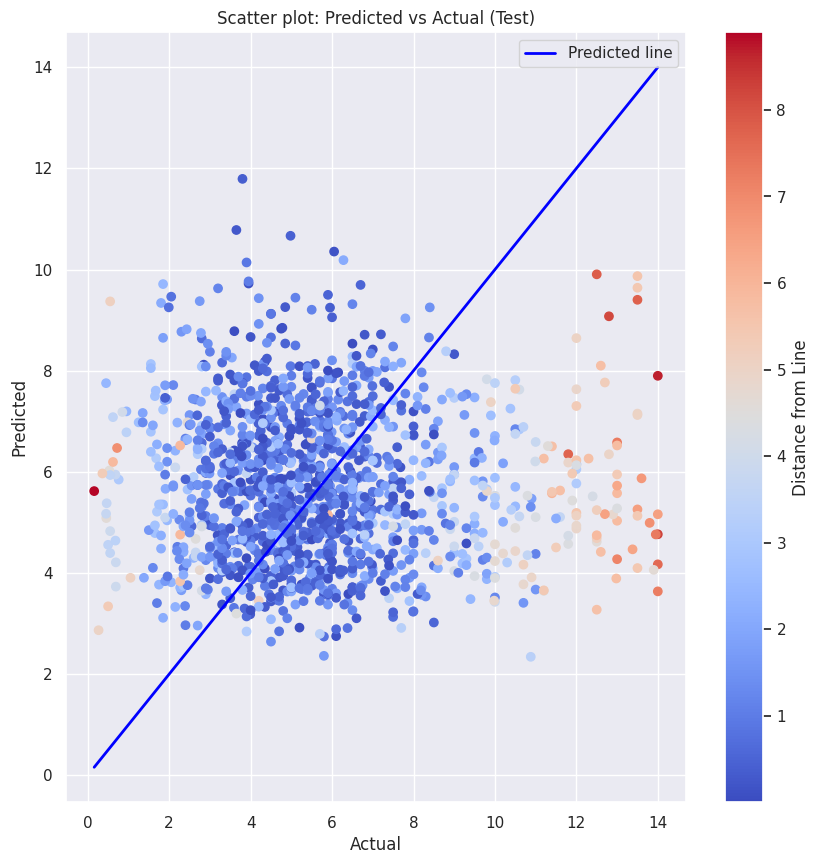

In [ ]:
# ƒê·∫∑t l·∫°i ch·ªâ m·ª•c c·ªßa y_test
y_test_reset_index = y_test.reset_index(drop=True)
# S·∫Øp x·∫øp ch·ªâ m·ª•c
sorted_indexes = np.argsort(y_test_reset_index)
# S·ª≠ d·ª•ng ch·ªâ m·ª•c ƒë√£ s·∫Øp x·∫øp ƒë·ªÉ s·∫Øp x·∫øp l·∫°i y_test
y_test_sorted = y_test_reset_index[sorted_indexes]
y_pred_test_sorted = test_pred[sorted_indexes]

distances = np.abs(test_pred - y_test)
# V·∫Ω scatter plot gi·ªØa d·ªØ li·ªáu d·ª± ƒëo√°n v√† th·ª±c t·∫ø tr√™n t·∫≠p ki·ªÉm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# V·∫Ω ƒë∆∞·ªùng fit (ƒë∆∞·ªùng th·∫≥ng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Th√™m colorbar ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu di·ªÖn m√†u s·∫Øc c·ªßa kho·∫£ng c√°ch
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression with Regularization L1 (Lasso Regression)

> **√ù t∆∞·ªüng:**

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) l√† m·ªôt ph∆∞∆°ng ph√°p h·ªìi quy tuy·∫øn t√≠nh c√≥ s·ª≠ d·ª•ng k·ªπ thu·∫≠t regularization ƒë·ªÉ gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting) v√† th·ª±c hi·ªán l·ª±a ch·ªçn bi·∫øn (feature selection).

* K·ªπ thu·∫≠t n√†y b·ªï sung m·ªôt r√†ng bu·ªôc \( L1 \) (absolute value of coefficients) v√†o h√†m m·∫•t m√°t, nh·∫±m m·ª•c ƒë√≠ch l√†m gi·∫£m b·ªõt c√°c h·ªá s·ªë c·ªßa c√°c bi·∫øn √≠t quan tr·ªçng v·ªÅ b·∫±ng 0, t·ª´ ƒë√≥ lo·∫°i b·ªè ch√∫ng kh·ªèi m√¥ h√¨nh.

> **∆Øu ƒëi·ªÉm:**

* Th·ª±c hi·ªán l·ª±a ch·ªçn bi·∫øn t·ª± ƒë·ªông, lo·∫°i b·ªè c√°c bi·∫øn kh√¥ng quan tr·ªçng kh·ªèi m√¥ h√¨nh.
* Gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting) b·∫±ng c√°ch ƒëi·ªÅu ch·ªânh ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh.
* ƒê·∫∑c bi·ªát hi·ªáu qu·∫£ khi s·ªë l∆∞·ª£ng bi·∫øn ƒë·∫ßu v√†o l·ªõn so v·ªõi s·ªë l∆∞·ª£ng m·∫´u.
* Lasso Regression l√† m·ªôt c√¥ng c·ª• m·∫°nh m·∫Ω v√† hi·ªáu qu·∫£ trong vi·ªác gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp v√† th·ª±c hi·ªán l·ª±a ch·ªçn bi·∫øn.
* Vi·ªác hi·ªÉu r√µ v√† s·ª≠ d·ª•ng ƒë√∫ng Lasso Regression gi√∫p cho vi·ªác gi·∫£i quy·∫øt nhi·ªÅu b√†i to√°n th·ª±c ti·ªÖn m·ªôt c√°ch hi·ªáu qu·∫£ v√† ch√≠nh x√°c.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ƒê·ªãnh nghƒ©a pipeline ch·ªâ v·ªõi Lasso Regression
pipeline = Pipeline([
    ('lasso', linear_model.Lasso())  # Lasso Regression
])

# ƒê·ªãnh nghƒ©a tham s·ªë grid ƒë·ªÉ th·ª≠ nghi·ªám alpha c·ªßa Lasso Regression
param_grid = {'lasso__alpha': [0.0015, 0.015, 0.15, 1, 10, 100]}

# S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m gi√° tr·ªã alpha t·ªët nh·∫•t
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# In ra c√°c si√™u tham s·ªë t·ªët nh·∫•t ƒë√£ t√¨m ƒë∆∞·ª£c
best_alpha = grid_search.best_params_['lasso__alpha']
print("Best alpha for Lasso:", best_alpha)
print("Best MSE:", -grid_search.best_score_)

# T·∫°o m√¥ h√¨nh Lasso v·ªõi alpha t·ªëi ∆∞u
best_lasso_model = linear_model.Lasso(alpha=best_alpha)

# Hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán
best_lasso_model.fit(X_train, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p hu·∫•n luy·ªán v√† t√≠nh to√°n c√°c ch·ªâ s·ªë
train_lasso_pred = best_lasso_model.predict(X_train)
print(">> Train R2: ", r2_score(y_train, train_lasso_pred))
print(">> Train MSE: ", mean_squared_error(y_train, train_lasso_pred))
print(">> Train MAE: ", mean_absolute_error(y_train, train_lasso_pred))

# S·ª≠ d·ª•ng cross-validation ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t tr√™n t·∫≠p hu·∫•n luy·ªán
cv_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 tr√™n t·∫≠p hu·∫•n luy·ªán:", np.mean(cv_scores))

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra v√† t√≠nh to√°n c√°c ch·ªâ s·ªë
test_lasso_pred = best_lasso_model.predict(X_test)
print(">> Test R2: ", r2_score(y_test, test_lasso_pred))
print(">> Test MSE: ", mean_squared_error(y_test, test_lasso_pred))
print(">> Test MAE: ", mean_absolute_error(y_test, test_lasso_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha for Lasso: 0.0015
Best MSE: 4.726624466191419
>> Train R2:  0.32429714901249673
>> Train MSE:  4.6982932295707736
>> Train MAE:  1.5815607250416623
Cross-validated R2 tr√™n t·∫≠p hu·∫•n luy·ªán: 0.31846435824169794
>> Test R2:  0.31216414861454156
>> Test MSE:  4.756310655901978
>> Test MAE:  1.5955144493968603


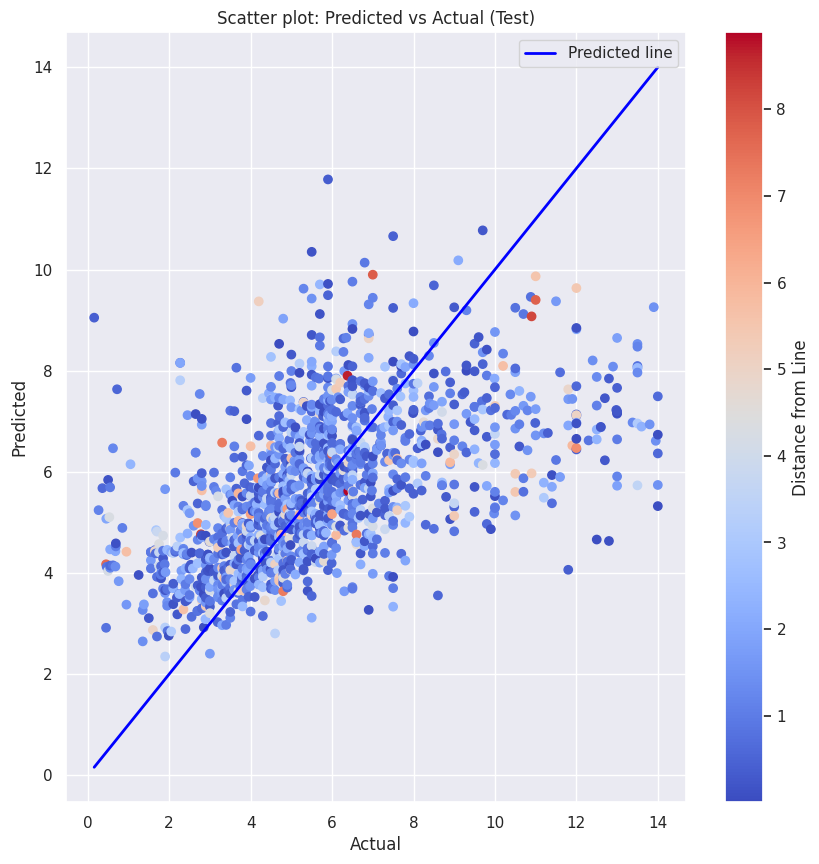

In [ ]:
y_pred_test_sorted = test_lasso_pred[sorted_indexes]

distances = np.abs(test_lasso_pred - y_test)
# V·∫Ω scatter plot gi·ªØa d·ªØ li·ªáu d·ª± ƒëo√°n v√† th·ª±c t·∫ø tr√™n t·∫≠p ki·ªÉm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test_sorted, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# V·∫Ω ƒë∆∞·ªùng fit (ƒë∆∞·ªùng th·∫≥ng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Th√™m colorbar ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu di·ªÖn m√†u s·∫Øc c·ªßa kho·∫£ng c√°ch
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression with Regularization L2 (Ridge Regression)

> **√ù t∆∞·ªüng:**

* Ridge Regression (H·ªìi quy Ridge) l√† m·ªôt ph∆∞∆°ng ph√°p h·ªìi quy tuy·∫øn t√≠nh c√≥ s·ª≠ d·ª•ng k·ªπ thu·∫≠t regularization ƒë·ªÉ gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting).

* K·ªπ thu·∫≠t n√†y b·ªï sung m·ªôt r√†ng bu·ªôc \( L2 \) (b√¨nh ph∆∞∆°ng c·ªßa c√°c h·ªá s·ªë) v√†o h√†m m·∫•t m√°t, nh·∫±m m·ª•c ƒë√≠ch l√†m gi·∫£m b·ªõt gi√° tr·ªã tuy·ªát ƒë·ªëi c·ªßa c√°c h·ªá s·ªë, nh∆∞ng kh√¥ng ƒë·∫∑t ch√∫ng v·ªÅ b·∫±ng 0.

> **∆Øu ƒëi·ªÉm:**

* Gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting) b·∫±ng c√°ch ƒëi·ªÅu ch·ªânh ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh.
* Ho·∫°t ƒë·ªông t·ªët trong tr∆∞·ªùng h·ª£p s·ªë l∆∞·ª£ng bi·∫øn l·ªõn h∆°n s·ªë l∆∞·ª£ng m·∫´u.
* Gi·ªØ l·∫°i t·∫•t c·∫£ c√°c bi·∫øn ƒë·∫ßu v√†o trong m√¥ h√¨nh, kh√¥ng lo·∫°i b·ªè ch√∫ng.
* Ridge Regression l√† m·ªôt c√¥ng c·ª• m·∫°nh m·∫Ω v√† hi·ªáu qu·∫£ trong vi·ªác gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp v√† c·∫£i thi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh.
* Vi·ªác hi·ªÉu r√µ v√† s·ª≠ d·ª•ng ƒë√∫ng Ridge Regression gi√∫p cho vi·ªác gi·∫£i quy·∫øt nhi·ªÅu b√†i to√°n th·ª±c ti·ªÖn m·ªôt c√°ch hi·ªáu qu·∫£ v√† ch√≠nh x√°c.





In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# ƒê·ªãnh nghƒ©a pipeline v·ªõi StandardScaler v√† Ridge Regression
pipeline = Pipeline([
    ('ridge', Ridge())  # Ridge Regression
])

# ƒê·ªãnh nghƒ©a tham s·ªë grid ƒë·ªÉ th·ª≠ nghi·ªám alpha c·ªßa Ridge Regression
param_grid = {'ridge__alpha': [0.00015, 0.0015, 0.015, 0.15, 1, 10, 100]}

# S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m gi√° tr·ªã alpha t·ªët nh·∫•t
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# In ra c√°c si√™u tham s·ªë t·ªët nh·∫•t ƒë√£ t√¨m ƒë∆∞·ª£c
best_alpha = grid_search.best_params_['ridge__alpha']
print("Best alpha for Ridge:", best_alpha)
print("Best MSE:", -grid_search.best_score_)

# Hu·∫•n luy·ªán l·∫°i pipeline v·ªõi alpha t·ªët nh·∫•t
best_ridge_model = linear_model.Ridge(alpha= best_alpha)

best_ridge_model.fit(X_train,y_train)
# D·ª± ƒëo√°n tr√™n t·∫≠p hu·∫•n luy·ªán v√† t√≠nh to√°n c√°c ch·ªâ s·ªë
train_ridge_pred = best_ridge_model.predict(X_train)
print(">> Train R2: ", r2_score(y_train, train_ridge_pred))
print(">> Train MSE: ", mean_squared_error(y_train, train_ridge_pred))
print(">> Train MAE: ", mean_absolute_error(y_train, train_ridge_pred))

# S·ª≠ d·ª•ng cross-validation ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t tr√™n t·∫≠p hu·∫•n luy·ªán
cv_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 tr√™n t·∫≠p hu·∫•n luy·ªán:", np.mean(cv_scores))

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra v√† t√≠nh to√°n c√°c ch·ªâ s·ªë
test_ridge_pred = best_ridge_model.predict(X_test)
print(">> Test R2: ", r2_score(y_test, test_ridge_pred))
print(">> Test MSE: ", mean_squared_error(y_test, test_ridge_pred))
print(">> Test MAE: ", mean_absolute_error(y_test, test_ridge_pred))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best alpha for Ridge: 10
Best MSE: 4.726395788569606
>> Train R2:  0.3242973374454985
>> Train MSE:  4.698291919359495
>> Train MAE:  1.5815826810991085
Cross-validated R2 tr√™n t·∫≠p hu·∫•n luy·ªán: 0.318499813482244
>> Test R2:  0.3120732723422275
>> Test MSE:  4.756939055514335
>> Test MAE:  1.5956560700593894


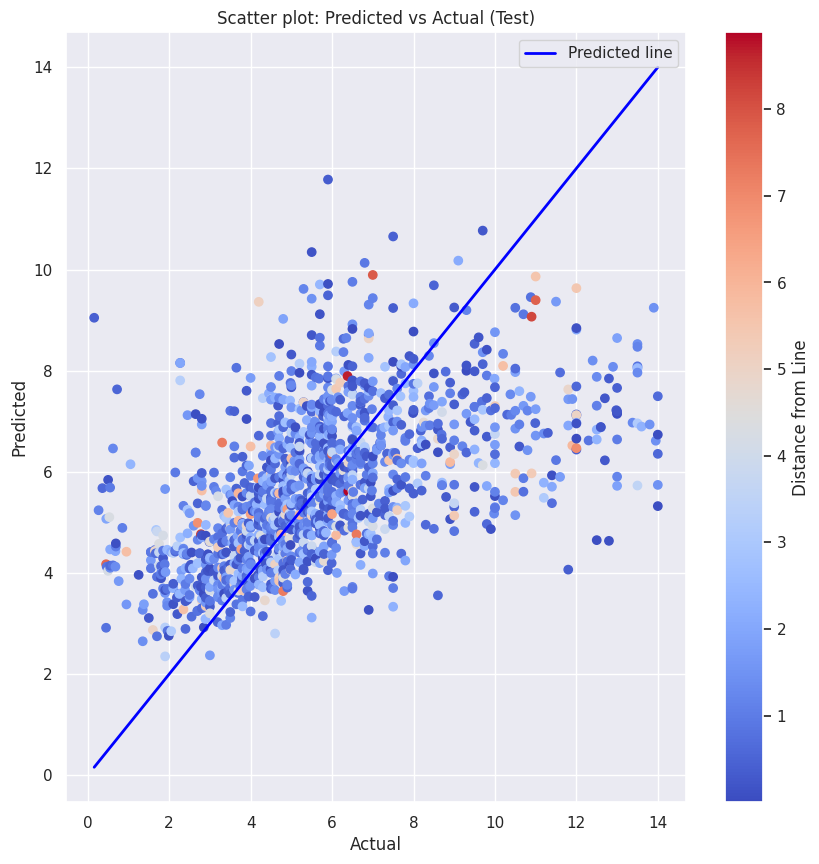

In [ ]:
y_pred_test_sorted = test_ridge_pred[sorted_indexes]

distances = np.abs(test_ridge_pred - y_test)
# V·∫Ω scatter plot gi·ªØa d·ªØ li·ªáu d·ª± ƒëo√°n v√† th·ª±c t·∫ø tr√™n t·∫≠p ki·ªÉm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test_sorted, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# V·∫Ω ƒë∆∞·ªùng fit (ƒë∆∞·ªùng th·∫≥ng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Th√™m colorbar ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu di·ªÖn m√†u s·∫Øc c·ªßa kho·∫£ng c√°ch
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

**Ta th·∫•y khi th√™m Regularization v√†o th√¨ m√¥ h√¨nh v·∫´n kh√¥ng ƒë∆∞·ª£c c·∫£i thi·ªán nhi·ªÅu v·ªÅ hi·ªáu su·∫•t, do b·ªô d·ªØ li·ªáu sau khi ƒë∆∞·ª£c clean ch·ª©a kh√° √≠t nhi·ªÖu v√† t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o kh√¥ng qu√° cao v√¨ th·∫ø khi kh√¥ng th√™m Regularization v√†o th√¨ m√¥ h√¨nh v·∫´n c√≥ th·ªÉ ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t t·ªët**

##Ridge Regression - Using Polinomial

> **√ù t∆∞·ªüng:**

* Ridge Regression with Polynomial Features l√† m·ªôt ph∆∞∆°ng ph√°p k·∫øt h·ª£p gi·ªØa Ridge Regression v√† vi·ªác m·ªü r·ªông c√°c bi·∫øn ƒë·∫ßu v√†o b·∫±ng c√°ch s·ª≠ d·ª•ng c√°c ƒë·∫∑c tr∆∞ng ƒëa th·ª©c (polynomial features).

* B·∫±ng c√°ch th√™m c√°c ƒë·∫∑c tr∆∞ng ƒëa th·ª©c c·ªßa c√°c bi·∫øn ƒë·∫ßu v√†o, m√¥ h√¨nh c√≥ th·ªÉ b·∫Øt ƒë·∫ßu h·ªçc c√°c m·ªëi quan h·ªá phi tuy·∫øn t√≠nh gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o v√† bi·∫øn m·ª•c ti√™u.

* S·ª≠ d·ª•ng Ridge Regression gi√∫p ki·ªÉm so√°t ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh b·∫±ng c√°ch √°p ƒë·∫∑t m·ªôt r√†ng bu·ªôc \( L2 \) l√™n c√°c h·ªá s·ªë, t·ª´ ƒë√≥ gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting) do s·ªë l∆∞·ª£ng bi·∫øn tƒÉng l√™n.

> **∆Øu ƒëi·ªÉm:**

* Cho ph√©p m√¥ h√¨nh h·ªçc c√°c m·ªëi quan h·ªá phi tuy·∫øn t√≠nh gi·ªØa bi·∫øn ƒë·∫ßu v√†o v√† bi·∫øn m·ª•c ti√™u.
* S·ª≠ d·ª•ng Ridge Regression gi√∫p ki·ªÉm so√°t ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh v√† gi·∫£m thi·ªÉu hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting).

> **Quy tr√¨nh th·ª±c hi·ªán:**

1. **T·∫°o c√°c ƒë·∫∑c tr∆∞ng ƒëa th·ª©c:**
   * S·ª≠ d·ª•ng c√°c h√†m t·∫°o ƒë·∫∑c tr∆∞ng ƒëa th·ª©c t·ª´ c√°c th∆∞ vi·ªán nh∆∞ `PolynomialFeatures` trong `scikit-learn`.

2. **√Åp d·ª•ng Ridge Regression v√† tuning:**
   * Hu·∫•n luy·ªán m√¥ h√¨nh Ridge Regression tr√™n d·ªØ li·ªáu ƒë√£ m·ªü r·ªông.

3. **ƒê√°nh gi√° m√¥ h√¨nh:**
   * S·ª≠ d·ª•ng c√°c s·ªë li·ªáu ƒë√°nh gi√° nh∆∞ MAE, MSE,r2 ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh tr√™n t·∫≠p ki·ªÉm tra.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# ƒê·ªãnh nghƒ©a pipeline ƒë·ªÉ chu·∫©n b·ªã c√°c ƒë·∫∑c tr∆∞ng ƒëa th·ª©c v√† hu·∫•n luy·ªán Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

# ƒê·ªãnh nghƒ©a tham s·ªë grid ƒë·ªÉ th·ª≠ nghi·ªám c√°c b·∫≠c ƒëa th·ª©c v√† si√™u tham s·ªë Ridge Regression
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],  # C√°c b·∫≠c ƒëa th·ª©c ƒë·ªÉ ki·ªÉm tra
    'ridge__alpha': [0.00015, 0.0015, 0.015, 0.15, 1, 10, 100, 1000, 10000]  # C√°c gi√° tr·ªã alpha c·ªßa Ridge Regression ƒë·ªÉ ki·ªÉm tra
}

# S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m tham s·ªë t·ªët nh·∫•t
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán
grid_search.fit(X_train, y_train)

# In ra c√°c si√™u tham s·ªë t·ªët nh·∫•t ƒë√£ t√¨m ƒë∆∞·ª£c
print("Best Parameters:", grid_search.best_params_)

# ƒê·ªãnh nghƒ©a l·∫°i pipeline v·ªõi b·∫≠c t·ªët nh·∫•t l√† 2 v√† alpha t·ªët nh·∫•t
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_params_['ridge__alpha']

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])

# Fit pipeline v√†o d·ªØ li·ªáu hu·∫•n luy·ªán
pipeline.fit(X_train, y_train)


# D·ª± ƒëo√°n tr√™n X_test ƒë√£ scale
y_pred_Ridge_Poly = pipeline.predict(X_test)

# ƒê√°nh gi√° hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh
mse_Ridge_poly = mean_squared_error(y_test, y_pred_Ridge_Poly)
mae_Ridge_poly = mean_absolute_error(y_test, y_pred_Ridge_Poly)
r2 = r2_score(y_test, y_pred_Ridge_Poly)

print(f"Mean Squared Error (MSE): {mse_Ridge_poly}")
print(f"Mean Absolute Error (MSE): {mae_Ridge_poly}")
print(f"R-squared (R2): {r2}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'poly__degree': 2, 'ridge__alpha': 100}
Mean Squared Error (MSE): 4.531280754632866
Mean Absolute Error (MSE): 1.5682009785796653
R-squared (R2): 0.3447069417423534


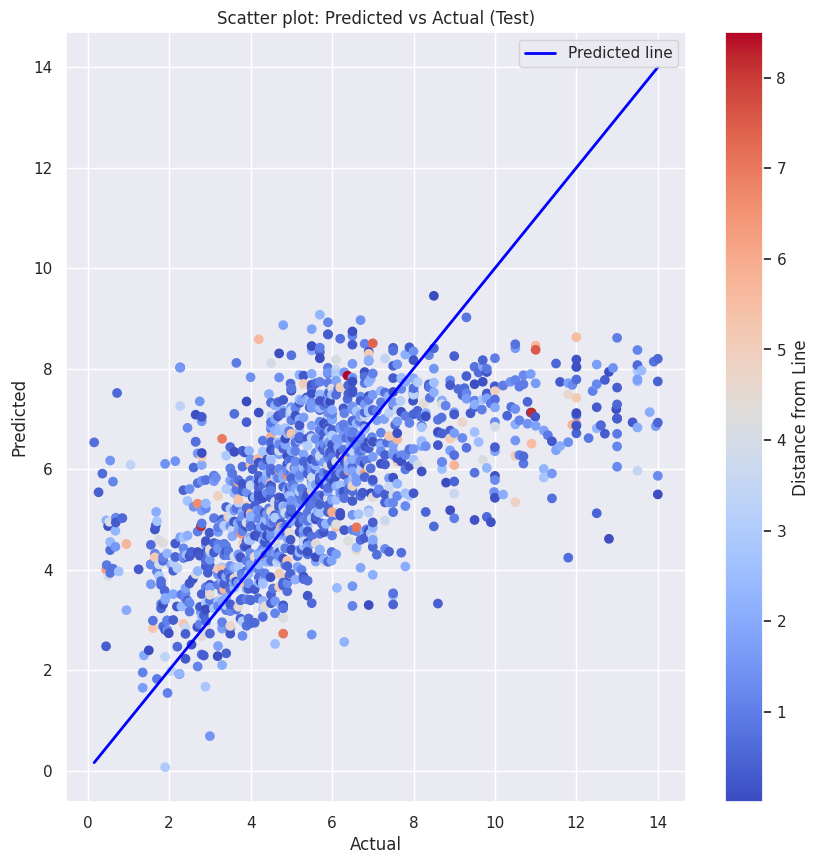

In [ ]:
y_pred_test_sorted = y_pred_Ridge_Poly[sorted_indexes]

distances = np.abs(y_pred_Ridge_Poly - y_test)
# V·∫Ω scatter plot gi·ªØa d·ªØ li·ªáu d·ª± ƒëo√°n v√† th·ª±c t·∫ø tr√™n t·∫≠p ki·ªÉm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test_sorted, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# V·∫Ω ƒë∆∞·ªùng fit (ƒë∆∞·ªùng th·∫≥ng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Th√™m colorbar ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu di·ªÖn m√†u s·∫Øc c·ªßa kho·∫£ng c√°ch
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

**Ph·∫ßn n√†y s·∫Ω tri·ªÉn khai Polynomial tr·ª±c ti·∫øp tr√™n Ridge Regression m√† kh√¥ng c·∫ßn ph·∫£i check l·∫°i ƒëa c·ªông tuy·∫øn v√¨ Ridge c√≥ th√™m Regularization L2 l√†m cho c√°c tr·ªçng s·ªë ƒë·∫ßu ra s·∫Ω kh√¥ng c√≤n b·ªã qu√° ph·ª©c t·∫°p, th√¥ng qua vi·ªác d√πng Grid search ƒë·ªÉ t√¨m ra best parameters ch√∫ng ta ƒë√£ nh·∫≠n th·∫•y ƒë∆∞·ª£c s·ª± c·∫£i thi·ªán hi·ªáu su·∫•t c·ªßa n√≥ so v·ªõi c√°c m√¥ H√¨nh LNR ban ƒë·∫ßu**

##Linear Regression Model From Scratch

###LinearRegression (Sklearn)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [ ]:
# X√°c ƒë·ªãnh c√°c t√≠nh nƒÉng v√† bi·∫øn m·ª•c ti√™u:
X = data.drop('Price', axis = 1)
y = data['Price']

# Chia khung d·ªØ li·ªáu th√†nh Training_set v√† Test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
# Kh·ªüi t·∫°o b·ªô chu·∫©n h√≥a
scaler = StandardScaler()

# Chu·∫©n h√≥a d·ªØ li·ªáu hu·∫•n luy·ªán
X_train = scaler.fit_transform(X_train)

# Chu·∫©n h√≥a d·ªØ li·ªáu ki·ªÉm tra (s·ª≠ d·ª•ng c√°c tham s·ªë ƒë√£ h·ªçc t·ª´ t·∫≠p hu·∫•n luy·ªán)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_coef = lr.coef_.reshape(-1, 1)
print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(lr_coef.shape)

Training size: 	X_train: (3706, 6) 	y_train: (3706,)
(6, 1)


In [ ]:
df_coef = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficient'])
print(df_coef)

                    Coeficient
Acreage               0.773464
Amenities_rating      0.059510
Floors                0.282398
days_since_min       -0.240472
Rooms                 0.900689
Distance_to_center   -0.038449


In [ ]:
#  S·ª≠ d·ª•ng h√†m c√≥ s·∫µn trong th∆∞ vi·ªán sklearn.metrics ƒë·ªÉ t√¨m MSE
from sklearn.metrics import mean_squared_error

train_pred = lr.predict(X_train)
print(">> Train MSE: ", mean_squared_error(train_pred, y_train))

test_pred = lr.predict(X_test)
print(">> Test MSE:  ", mean_squared_error(test_pred, y_test))

>> Train MSE:  4.70667443833165
>> Test MSE:   4.799479929458018


Residual

In [ ]:
test_residuals = y_test - test_pred
test_residuals

3706   -0.158129
3707    3.523721
3708    1.583731
3709    0.668604
3710    0.317682
          ...   
4628   -1.745102
4629   -2.001114
4630   -0.359498
4631    1.181943
4632    0.450411
Name: Price, Length: 927, dtype: float64

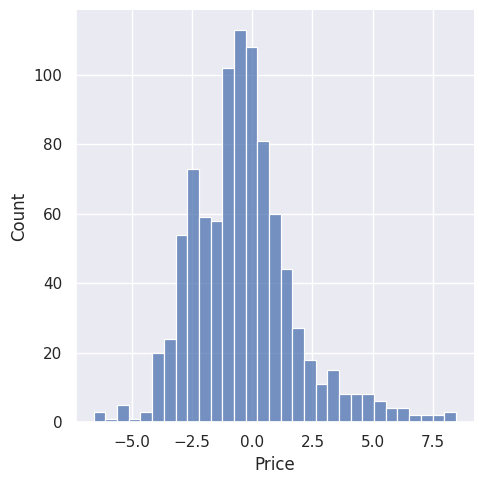

In [ ]:
sns.displot(x = test_residuals)

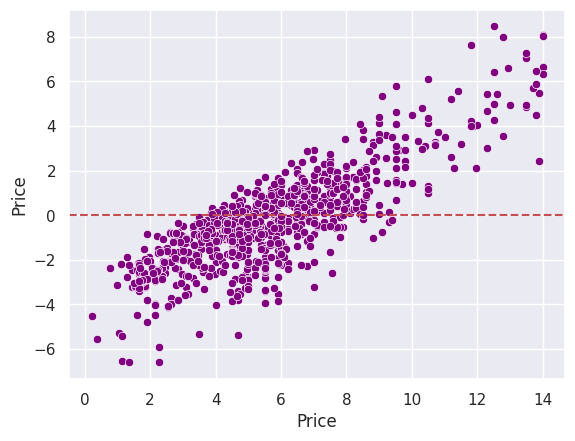

In [ ]:
sns.scatterplot(x = y_test, y = test_residuals, color = 'purple')
plt.axhline(y = 0, color= 'r', ls = '--')

In [ ]:
# M√¥-ƒëun sklearn.metrics th·ª±c hi·ªán m·ªôt s·ªë t√≠nh nƒÉng m·∫•t, ƒëi·ªÉm v√† ti·ªán √≠ch
# h√†m ƒë·ªÉ ƒëo hi·ªáu su·∫•t ph√¢n lo·∫°i.
# M·ªôt s·ªë s·ªë li·ªáu c√≥ th·ªÉ y√™u c·∫ßu ∆∞·ªõc t√≠nh x√°c su·∫•t c·ªßa l·ªõp d∆∞∆°ng,
# gi√° tr·ªã tin c·∫≠y ho·∫∑c gi√° tr·ªã quy·∫øt ƒë·ªãnh nh·ªã ph√¢n.
from sklearn import metrics

MAE_simple  = metrics.mean_absolute_error(y_test, test_pred)
MSE_simple  = metrics.mean_squared_error(y_test, test_pred)
RMSE_simple = np.sqrt(MSE_simple)
R2 = metrics.r2_score(y_test, test_pred)

pd.DataFrame([MAE_simple, MSE_simple, RMSE_simple, R2], index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

Metrics
MAE   1.650044
MSE   4.799480
RMSE  2.190772
R^2   0.304242

In [ ]:
print('predicted mean:' ,np.mean(test_pred))
print('real mean:     ' ,data['Price'].mean())

predicted mean: 5.90144853156077
real mean:      5.757022534003886


In [ ]:
df_result_lr = pd.DataFrame({'Actual' : y_test, 'Predicted' : test_pred})
df_result_lr

Actual  Predicted
3706    6.50   6.658129
3707   11.00   7.476279
3708    8.30   6.716269
3709    4.80   4.131396
3710    4.80   4.482318
...      ...        ...
4628    5.99   7.735102
4629    3.00   5.001114
4630    5.20   5.559498
4631    7.00   5.818057
4632    7.50   7.049589

[927 rows x 2 columns]

<Axes: >

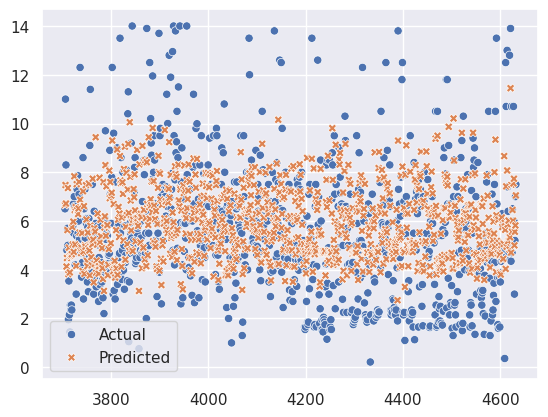

In [ ]:
sns.scatterplot(data = df_result_lr , color='blue')

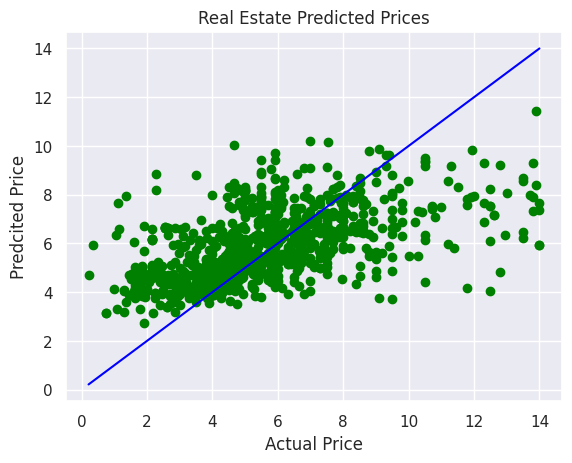

In [ ]:
plt.scatter(y_test, test_pred, color = 'green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'blue')
plt.title("Real Estate Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predcited Price")
plt.show()

###Cost function

In [ ]:
def compute_cost(X, y, w, b):
    """
    Compute cost
    Args:
      X (ndarray (m,n)): data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    total_cost = 0.0

    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b            #(n,)(n,) = scalar
        total_cost += (f_wb_i - y[i]) ** 2      #scalar

    return J_wb

###Gradient Descent

In [ ]:
import math

def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): the gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : the gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape         #s·ªë v√≠ d·ª•, ƒë·∫∑c ƒëi·ªÉm
    dJ_dw = np.zeros((n,))
    dJ_db = 0.0

    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        dJ_dw[:n] += (f_wb_i - y[i]) * X[i, :n]
        dJ_db     += (f_wb_i - y[i])
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

def gradient_descent(X, y, w_in, b_in, lr, iter):
    """
    Performs batch gradient descent to learn (w,b). Updates (w,b) by taking
    iter gradient steps with lr

    Args:
      X (ndarray (m,n))   : data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      lr (float)          : Learning rate
      iter (int)          : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : updated values of parameters
      b (scalar)       : updated value of parameter
      """
    # M·ªôt m·∫£ng ƒë·ªÉ l∆∞u tr·ªØ gi√° J v√† w ·ªü m·ªói l·∫ßn l·∫∑p, ch·ªß y·∫øu ƒë·ªÉ v·∫Ω ƒë·ªì th·ªã sau n√†y
    J_hist, p_hist = [], []
    w = (w_in) #tr√°nh s·ª≠a ƒë·ªïi to√†n c·∫ßu w trong h√†m
    b = b_in

    for i in range(iter):

        # T√≠nh to√°n gradient v√† c·∫≠p nh·∫≠t c√°c th√¥ng s·ªë
        dJ_dw, dJ_db = compute_gradient(X, y, w, b)

        # C·∫≠p nh·∫≠t th√¥ng s·ªë b·∫±ng w, b, alpha v√† gradient
        w -= lr * dJ_dw
        b -= lr * dJ_db

        # Ti·∫øt ki·ªám chi ph√≠ J ·ªü m·ªói l·∫ßn l·∫∑p
        if i < 100000: #ngƒÉn ch·∫∑n c·∫°n ki·ªát t√†i nguy√™n
            J_hist.append(compute_cost(X, y, w, b))
            p_hist.append([w, b])

        # Chi ph√≠ in m·ªói l·∫ßn 10 l·∫ßn ho·∫∑c nhi·ªÅu l·∫ßn l·∫∑p n·∫øu < 10
        if i % math.ceil(iter/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}")

    # V·∫Ω h√†m chi ph√≠ J qua c√°c l·∫ßn l·∫∑p
    plt.plot(range(len(J_hist)), J_hist)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function J')
    plt.title('Cost Function J vs. Iteration')
    plt.grid(True)
    plt.show()

    return w, b, J_hist #tr·∫£ v·ªÅ l·ªãch s·ª≠ w, b v√† J cu·ªëi c√πng ƒë·ªÉ v·∫Ω ƒë·ªì th·ªã

###Parameter Intialization

Iteration    0: Cost    20.01
Iteration  100: Cost     4.64
Iteration  200: Cost     2.66
Iteration  300: Cost     2.39
Iteration  400: Cost     2.36
Iteration  500: Cost     2.35
Iteration  600: Cost     2.35
Iteration  700: Cost     2.35
Iteration  800: Cost     2.35
Iteration  900: Cost     2.35


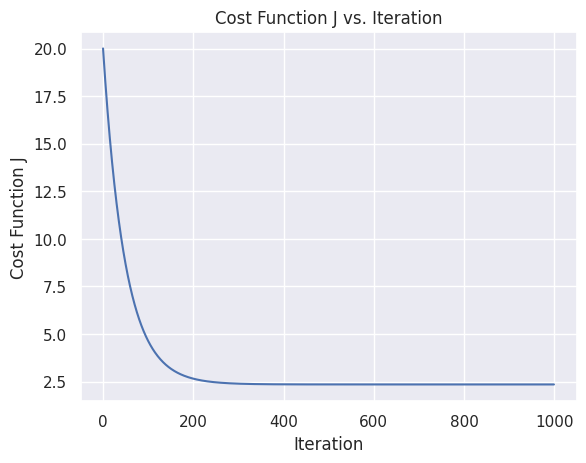

w, b found by gradient descent: [ 0.77398609  0.05956335  0.28316368 -0.2405924   0.89973364 -0.03846557], 5.81492310171581


In [ ]:
# Kh·ªüi t·∫°o tham s·ªë
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.0

# C√†i ƒë·∫∑t gi·∫£m ƒë·ªô d·ªëc
iter = 1000
lr = 0.01

# T√¨m Wei v√† Bias
wei, bias, _ = gradient_descent(X_train ,y_train, initial_w, initial_b, lr, iter)
print(f"w, b found by gradient descent: {wei}, {bias}")

###Prediction

In [ ]:
def predict(x, w, b):
    """
    S


y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], wei, bias))ingle predict using linear regression
    Args:
      x (ndarray): shape (n,) example with multiple features
      w (ndarray): shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      f (scalar):  prediction # f = np.dot(w, x) + b
    """
    return np.dot(w, x) + b

y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], wei, bias))

In [ ]:
# T√≠nh to√°n s·ª± kh√°c bi·ªát gi·ªØa m·ª•c ti√™u d·ª± ƒëo√°n v√† m·ª•c ti√™u th·ª±c t·∫ø
diff = (abs(y_pred - y_test) / y_test) * 100

# B·∫£n t√≥m t·∫Øt
within_5per = len(diff[diff < 5])
within_10per = len(diff[diff < 10])

ratio_5per = (within_5per / y_test.shape[0]) * 100
ratio_10per = (within_10per / y_test.shape[0]) * 100

conclusion = pd.DataFrame({'<5%': [within_5per, ratio_5per],
                           '<10%': [within_10per, ratio_10per]},
                           index = ['count', 'ratio'])

# Hi·ªáu su·∫•t
squared_errors = [(ytest - ypred) ** 2 for ytest, ypred in zip(y_test, y_pred)]
mse = sum(squared_errors) / len(squared_errors)
print(f"Mean Squared Error: {mse}\n")

# Ph·∫ßn k·∫øt lu·∫≠n
print(f"Number of test target: {y_test.shape[0]}")
print("Prediction results:\n", conclusion)

Mean Squared Error: 4.7993982103182855

Number of test target: 927
Prediction results:
               <5%        <10%
count  122.000000  246.000000
ratio   13.160734   26.537217


##XGBoost (Extreme Gradient Boosting)

In [ ]:
!pip install xgboost

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 153.9/153.9 MB 5.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190.9/190.9 MB 4.7 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor


In [ ]:
# ƒê·ªãnh nghƒ©a m√¥ h√¨nh XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán
model.fit(X_train, y_train)

# D·ª± ƒëo√°n ·ªü t·∫≠p train
y_train_pred = model.predict(X_train)
# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
y_pred = model.predict(X_test)

# ƒê√°nh gi√° hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f'Mean Squared Error train: {mse_train}')
print(f'R-squared train: {r2_train}')
print(f'Mean Absolute Error train: {mae_train}')

print(f'Mean Squared Error test: {mse_test}')
print(f'R-squared test: {r2_test}')
print(f'Mean Absolute Error test: {mae_test}')


Mean Squared Error train: 0.6838884415756232
R-squared train: 0.9014104320514655
Mean Absolute Error train: 0.5691943915560723
Mean Squared Error test: 3.8492800217763787
R-squared test: 0.4419880654542657
Mean Absolute Error test: 1.4316702378143384


**Nh·∫≠n th·∫•y ƒë∆∞·ª£c m√¥ h√¨nh b·ªã overfit qua c√°c metrics, c·ª• th·ªÉ:**
* MAE v√† MSE c·ªßa t·∫≠p train th·∫•p h∆°n t·∫≠p test r·∫•t nhi·ªÅu.
* R2 c·ªßa t·∫≠p train c≈©ng cao h∆°n t·∫≠p test. <br>
=> ch·ª©ng t·ªè m√¥ h√¨nh ƒëang b·ªã overfitting v√¨ n√≥ ƒë√£ qu√° " h·ªçc thu·ªôc " t·∫≠p train l√†m cho m√¥ h√¨nh b·ªã ph·ª©c t·∫°p.<br>




**V·∫≠y ƒë·ªÉ kh·∫Øc ph·ª•c v·∫•n ƒë·ªÅ n√†y ta s·∫Ω th√™m Regularization v√† ƒëi·ªÅu ch·ªânh c√°c si√™u tham s·ªë ƒë·ªÉ m√¥ h√¨nh kh√¥ng c√≤n b·ªã ph·ª©c t·∫°p n·ªØa**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

param_distributions = {
'max_depth': np.arange(2, 7),
'learning_rate': np.arange(0.01, 1.5, 0.01),
'n_estimators': np.arange(700, 4001, 10),
'gamma': np.arange(5, 101, 3),
'subsample': np.arange(0.3, 0.7, 0.1),
'colsample_bytree': np.arange(0.5, 0.8, 0.05),
'colsample_bylevel': np.arange(0.5, 0.8, 0.05),
'reg_alpha': np.arange(1, 40, 1),
'reg_lambda': np.arange(1, 40, 1),
}


random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train, verbose=True)

best_model = random_search.best_estimator_

print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print()

# Predictions on test data
y_pred_test = best_model.predict(X_test)

# Predictions on train data
y_pred_train = best_model.predict(X_train)

# Metrics for test data
mse_GB_test = mean_squared_error(y_test, y_pred_test)
mae_GB_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Metrics for train data
mse_GB_train = mean_squared_error(y_train, y_pred_train)
mae_GB_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Metrics on Test Data:')
print(f'Mean Squared Error: {mse_GB_test}')
print(f'Mean Absolute Error: {mae_GB_test}')
print(f'R-squared: {r2_test}')
print()

print(f'Metrics on Train Data:')
print(f'Mean Squared Error: {mse_GB_train}')
print(f'Mean Absolute Error: {mae_GB_train}')
print(f'R-squared: {r2_train}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearchCV:
{'subsample': 0.3, 'reg_lambda': 14, 'reg_alpha': 12, 'n_estimators': 1410, 'max_depth': 5, 'learning_rate': 0.06999999999999999, 'gamma': 11, 'colsample_bytree': 0.7500000000000002, 'colsample_bylevel': 0.55}

Metrics on Test Data:
Mean Squared Error: 3.7946222917762524
Mean Absolute Error: 1.4036049150829046
R-squared: 0.44991153828105523

Metrics on Train Data:
Mean Squared Error: 3.4388067166609737
Mean Absolute Error: 1.3442876679757945
R-squared: 0.5042605667190028


**Sau khi tuning ƒë√£ nh·∫≠n ƒë∆∞·ª£c 1 m√¥ h√¨nh kh√° ·ªïn v√† kh√¥ng c√≤n b·ªã overfit n·ªØa**

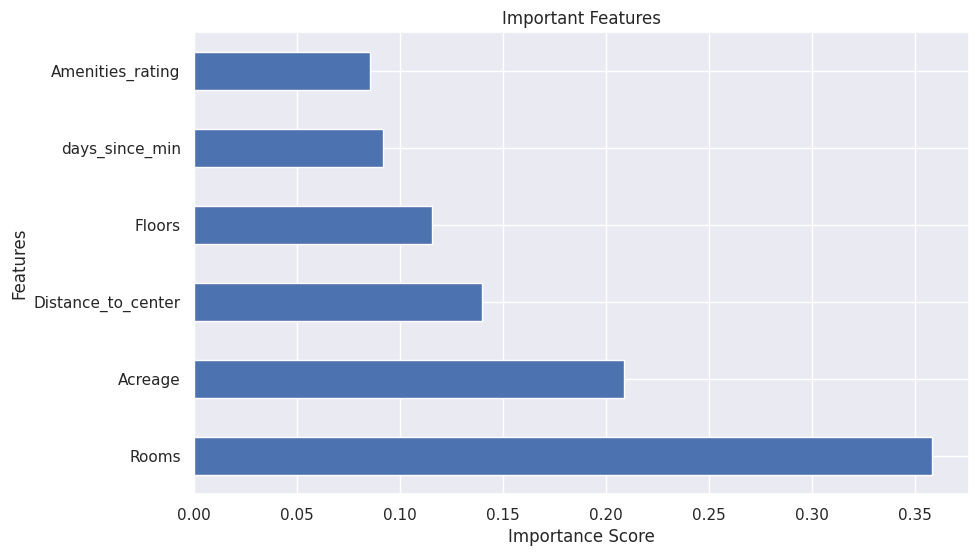

In [ ]:
feature_importances = best_model.feature_importances_

feature_importance = pd.Series(feature_importances, index=columns)


top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Gradient Boosting From Scratch

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Step 1**: `Node` L∆∞u tr·ªØ th√¥ng tin c·ªßa m·ªôt n√∫t trong c√¢y quy·∫øt ƒë·ªãnh.

`H√†m __init__` **(self, info, left=None, right=None):**

**√ù nghƒ©a:** Kh·ªüi t·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng Node trong c√¢y quy·∫øt ƒë·ªãnh.

**Tham s·ªë:**
- info: Th√¥ng tin c·ªßa n√∫t (c√≥ th·ªÉ l√† th√¥ng tin v·ªÅ ph√¢n chia ho·∫∑c gi√° tr·ªã d·ª± ƒëo√°n).
- left: Con tr·ªè ƒë·∫øn n√∫t con b√™n tr√°i.
- right: Con tr·ªè ƒë·∫øn n√∫t con b√™n ph·∫£i.

**M·ª•c ƒë√≠ch:** L∆∞u tr·ªØ v√† qu·∫£n l√Ω c·∫•u tr√∫c d·ªØ li·ªáu c·ªßa c√¢y quy·∫øt ƒë·ªãnh.

**Qu√° tr√¨nh:** Kh·ªüi t·∫°o c√°c thu·ªôc t√≠nh info, left, right khi t·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng Node m·ªõi.

In [ ]:
class Node:
    def __init__(self, info, left=None, right=None):
        self.info = info
        self.left = left
        self.right = right


### **Step 2:** `DecisionTreeRegressor` X√¢y d·ª±ng v√† d·ª± ƒëo√°n t·ª´ng c√¢y quy·∫øt ƒë·ªãnh trong m√¥ h√¨nh h·ªìi quy.




**`H√†m __init__`(self, min_samples_split=2, min_samples_leaf=1, max_depth=3):**

- **√ù nghƒ©a:** Kh·ªüi t·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng c√¢y quy·∫øt ƒë·ªãnh cho b√†i to√°n h·ªìi quy.

- **Tham s·ªë:**
 - `min_samples_split`: S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu c·∫ßn ƒë·ªÉ ti·∫øp t·ª•c ph√¢n chia m·ªôt n√∫t.
 - `min_samples_leaf`: S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu cho m·ªói n√∫t l√°.
 - `max_depth`: ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y.

- **M·ª•c ƒë√≠ch:** ƒê·ªãnh nghƒ©a c√°c tham s·ªë v√† c√†i ƒë·∫∑t c√°c ph∆∞∆°ng th·ª©c ƒë·ªÉ x√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh.

- **Qu√° tr√¨nh:** L∆∞u tr·ªØ c√°c tham s·ªë nh∆∞ min_samples_split, min_samples_leaf, max_depth v√† kh·ªüi t·∫°o thu·ªôc t√≠nh root (n√∫t g·ªëc c·ªßa c√¢y).















`H√†m build_tree`(self, X, Y, cur_depth=0):
- **√ù nghƒ©a:** X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán.

- **Tham s·ªë:**
 - `X`: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (features).
 - `Y`: Vector nh√£n m·ª•c ti√™u (target).
 - `cur_depth`: ƒê·ªô s√¢u hi·ªán t·∫°i c·ªßa n√∫t ƒëang x√©t.

- **M·ª•c ƒë√≠ch:** ƒê·ªá quy x√¢y d·ª±ng c√¢y t·ª´ n√∫t g·ªëc ƒë·∫øn c√°c n√∫t l√°.

- **Qu√° tr√¨nh:**
 - G·ªçi get_best_split(X, Y) ƒë·ªÉ t√¨m ph√©p chia t·ªët nh·∫•t d·ª±a tr√™n RSS.
 - N·∫øu ƒë·ªß ƒëi·ªÅu ki·ªán ƒë·ªÉ ph√¢n chia (s·ªë m·∫´u ƒë·ªß l·ªõn, ch∆∞a ƒë·∫°t ƒë·ªô s√¢u t·ªëi ƒëa v√† c√≥ th·ªÉ ph√¢n chia t·ªët h∆°n), t·∫°o c√°c nh√°nh tr√°i v√† ph·∫£i v√† ƒë·ªá quy x√¢y d·ª±ng c√¢y t·ª´ng nh√°nh.
 - N·∫øu kh√¥ng ƒë·ªß ƒëi·ªÅu ki·ªán ph√¢n chia, t·∫°o m·ªôt n√∫t l√°.

**`H√†m get_best_split`(self, X, Y):**
- **√ù nghƒ©a:** T√¨m ph√©p chia t·ªët nh·∫•t cho m·ªôt n√∫t trong c√¢y.

- **Tham s·ªë:**
 - `X`: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (features).
 - `Y`: Vector nh√£n m·ª•c ti√™u (target).

- **M·ª•c ƒë√≠ch:** T·ªëi ∆∞u h√≥a vi·ªác ph√¢n chia d·ªØ li·ªáu d·ª±a tr√™n ƒë·ªô gi·∫£m RSS.

- **Qu√° tr√¨nh:**
 - Duy·ªát qua t·ª´ng ƒë·∫∑c tr∆∞ng ƒë·ªÉ t√¨m ph√©p chia t·ªët nh·∫•t.
 - S·∫Øp x·∫øp d·ªØ li·ªáu theo t·ª´ng ƒë·∫∑c tr∆∞ng v√† t√≠nh to√°n RSS cho t·ª´ng ph√¢n chia c√≥ th·ªÉ.
 - L·ª±a ch·ªçn ph√©p chia m√† c√≥ ƒë·ªô gi·∫£m RSS l·ªõn nh·∫•t.

**`H√†m fit`(self, X, Y):**
- **√ù nghƒ©a:** Hu·∫•n luy·ªán m√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán.

- **Tham s·ªë:**
 - `X`: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (features).
 - `Y`: Vector nh√£n m·ª•c ti√™u (target).

- **M·ª•c ƒë√≠ch:** X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán.

- **Qu√° tr√¨nh:**
G·ªçi build_tree(X, Y) ƒë·ªÉ x√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† l∆∞u c√¢y v√†o thu·ªôc t√≠nh root.

**`H√†m make_prediction`(self, x, tree):**
- **√ù nghƒ©a:** D·ª± ƒëo√°n gi√° tr·ªã cho m·ªôt m·∫´u ƒë∆°n b·∫±ng c√°ch ƒëi xu·ªëng c√¢y quy·∫øt ƒë·ªãnh.

- **Tham s·ªë:**
 - `x`: M·∫´u ƒë·∫ßu v√†o c·∫ßn d·ª± ƒëo√°n.
 - `tree`: C√¢y quy·∫øt ƒë·ªãnh ƒë√£ hu·∫•n luy·ªán.

- **M·ª•c ƒë√≠ch:** D·ª± ƒëo√°n gi√° tr·ªã d·ª±a tr√™n c√¢y quy·∫øt ƒë·ªãnh.

- **Qu√° tr√¨nh:**
 - N·∫øu ƒëang ·ªü m·ªôt n√∫t l√°, tr·∫£ v·ªÅ gi√° tr·ªã trung b√¨nh c·ªßa c√°c m·∫´u hu·∫•n luy·ªán trong n√∫t.
 - N·∫øu kh√¥ng ph·∫£i l√°, ƒëi xu·ªëng nh√°nh tr√°i ho·∫∑c ph·∫£i c·ªßa c√¢y d·ª±a tr√™n gi√° tr·ªã c·ªßa ƒë·∫∑c tr∆∞ng c·ªßa m·∫´u.

**`H√†m predict`(self, X):**
- **√ù nghƒ©a:** D·ª± ƒëo√°n gi√° tr·ªã cho m·ªôt t·∫≠p d·ªØ li·ªáu ƒë·∫ßu v√†o.

- **Tham s·ªë:**
 - `X`: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (features).

- **M·ª•c ƒë√≠ch:** D·ª± ƒëo√°n gi√° tr·ªã cho t·ª´ng m·∫´u trong t·∫≠p d·ªØ li·ªáu ƒë·∫ßu v√†o.

- **Qu√° tr√¨nh:**
D√πng make_prediction(x, self.root) ƒë·ªÉ d·ª± ƒëo√°n t·ª´ng m·∫´u trong X d·ª±a tr√™n c√¢y quy·∫øt ƒë·ªãnh ƒë√£ hu·∫•n luy·ªán.

In [ ]:
class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=3):
        self.root = None
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth

    def build_tree(self, X, Y, cur_depth=0):
        best_split = self.get_best_split(X, Y)
        if X.shape[0] >= self.min_samples_split and cur_depth < self.max_depth and best_split["rss"] < float('inf'):
            left_index = X[:, best_split["feature_index"]] <= best_split["threshold"]
            right_index = X[:, best_split["feature_index"]] > best_split["threshold"]
            X_left, Y_left = X[left_index], Y[left_index]
            X_right, Y_right = X[right_index], Y[right_index]
            left_subtree = self.build_tree(X_left, Y_left, cur_depth + 1)
            right_subtree = self.build_tree(X_right, Y_right, cur_depth + 1)
            return Node(best_split, left_subtree, right_subtree)
        best_split["values"] = Y
        return Node(best_split)

    def get_best_split(self, X, Y):
        best_split = {"rss": float('inf')}
        for feature_index in range(X.shape[1]):
            indices = np.argsort(X[:, feature_index])
            X_sort, Y_sort = X[indices, feature_index], Y[indices]
            left_sumsq, left_sum = 0, 0
            right_sumsq, right_sum = np.sum(Y_sort * Y_sort), np.sum(Y_sort)
            N_L = 0
            N_R = N_t = len(Y_sort)
            for i in range(N_t - 1):
                left_sumsq, left_sum = left_sumsq + Y_sort[i] ** 2, left_sum + Y_sort[i]
                right_sumsq, right_sum = right_sumsq - Y_sort[i] ** 2, right_sum - Y_sort[i]
                N_L, N_R = N_L + 1, N_R - 1
                if N_L >= self.min_samples_leaf and N_R >= self.min_samples_leaf:
                    rss = (left_sumsq - left_sum ** 2 / N_L) + (right_sumsq - right_sum ** 2 / N_R)
                    if rss < best_split["rss"]:
                        best_split["rss"] = rss
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = X_sort[i]
        return best_split

    def fit(self, X, Y):
        self.root = self.build_tree(X, Y)
        return self

    def make_prediction(self, x, tree):
        if "values" in tree.info:
            return tree.info["values"].mean()
        feature_val = x[tree.info["feature_index"]]
        if feature_val <= tree.info["threshold"]:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        return np.array([self.make_prediction(x, self.root) for x in X])

### **Step 3:** `GradientBoostingRegressor` X√¢y d·ª±ng v√† s·ª≠ d·ª•ng nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh ƒë·ªÉ t·ªëi ∆∞u h√≥a d·ª± ƒëo√°n li√™n t·ª•c qua t·ª´ng v√≤ng l·∫∑p.

**`H√†m __init__`(self, learning_rate=0.1, min_samples_leaf=1, max_depth=3, n_estimators=10):**
- **√ù nghƒ©a:** Kh·ªüi t·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng m√¥ h√¨nh Gradient Boosting Regressor.
- **Tham s·ªë:**
 - `learning_rate`: T·ªëc ƒë·ªô h·ªçc c·ªßa m√¥ h√¨nh.
 - `min_samples_leaf`: S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu cho m·ªói n√∫t l√° trong c√°c c√¢y quy·∫øt ƒë·ªãnh.
 - `max_depth`: ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√°c c√¢y quy·∫øt ƒë·ªãnh.
 - `n_estimators`: S·ªë l∆∞·ª£ng c√¢y quy·∫øt ƒë·ªãnh (t·ª©c l√† s·ªë l∆∞·ª£ng v√≤ng l·∫∑p trong qu√° tr√¨nh hu·∫•n luy·ªán).
- **M·ª•c ƒë√≠ch:** ƒê·ªãnh nghƒ©a c√°c tham s·ªë v√† c√†i ƒë·∫∑t c√°c ph∆∞∆°ng th·ª©c ƒë·ªÉ x√¢y d·ª±ng v√† s·ª≠ d·ª•ng m√¥ h√¨nh Gradient Boosting.
- **Qu√° tr√¨nh:** L∆∞u tr·ªØ c√°c tham s·ªë v√† kh·ªüi t·∫°o c√°c thu·ªôc t√≠nh nh∆∞ trees (danh s√°ch c√°c c√¢y quy·∫øt ƒë·ªãnh) v√† initial_prediction (gi√° tr·ªã d·ª± ƒëo√°n ban ƒë·∫ßu).

**`H√†m fit`(self, X, y):**
- **√ù nghƒ©a:** Hu·∫•n luy·ªán m√¥ h√¨nh Gradient Boosting tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán.
- **Tham s·ªë:**
 - `X`: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (features).
 - `y`: Vector nh√£n m·ª•c ti√™u (target).
- **M·ª•c ƒë√≠ch:** X√¢y d·ª±ng m√¥ h√¨nh Gradient Boosting t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán.
- **Qu√° tr√¨nh:**
 - Kh·ªüi t·∫°o y_pred b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa y.
 - L·∫∑p qua t·ª´ng n_estimators:
   - T√≠nh residual (residuals) gi·ªØa y v√† y_pred.
   - T·∫°o m·ªôt c√¢y quy·∫øt ƒë·ªãnh m·ªõi (tree) v√† hu·∫•n luy·ªán n√≥ v·ªõi residuals.
   - C·∫≠p nh·∫≠t y_pred b·∫±ng c·ªông d·ªìn learning_rate nh√¢n v·ªõi k·∫øt qu·∫£ d·ª± ƒëo√°n t·ª´ c√¢y quy·∫øt ƒë·ªãnh.
   - L∆∞u c√¢y quy·∫øt ƒë·ªãnh v√†o danh s√°ch self.trees.
 - Tr·∫£ v·ªÅ m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán.

**`H√†m predict`(self, X):**
- **√ù nghƒ©a:** D·ª± ƒëo√°n gi√° tr·ªã cho m·ªôt t·∫≠p d·ªØ li·ªáu ƒë·∫ßu v√†o b·∫±ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán.
- **Tham s·ªë:**
 - `X`: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (features).
- M·ª•c ƒë√≠ch: D·ª± ƒëo√°n gi√° tr·ªã cho t·ª´ng m·∫´u trong t·∫≠p d·ªØ li·ªáu ƒë·∫ßu v√†o.
- **Qu√° tr√¨nh:**
 - Kh·ªüi t·∫°o y_pred b·∫±ng gi√° tr·ªã d·ª± ƒëo√°n ban ƒë·∫ßu (initial_prediction).
 - Duy·ªát qua t·ª´ng c√¢y quy·∫øt ƒë·ªãnh trong self.trees v√† c·ªông d·ªìn k·∫øt qu·∫£ d·ª± ƒëo√°n c·ªßa t·ª´ng c√¢y nh√¢n v·ªõi learning_rate.
 - Tr·∫£ v·ªÅ y_pred, t·ª©c l√† d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh Gradient Boosting cho t·∫≠p d·ªØ li·ªáu X.

In [ ]:
class GradientBoostingRegressor:
    def __init__(self, learning_rate=0.01, min_samples_leaf=1, max_depth=3, n_estimators=1001):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.n_estimators = n_estimators

    def fit(self, X, y):
        self.trees = []
        self.initial_prediction = np.mean(y)
        y_pred = np.full_like(y, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

        return self

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


### Step 4: Hu·∫•n luy·ªán v√† ƒë√°nh gi√°

In [ ]:
# ƒê·ªçc d·ªØ li·ªáu t·ª´ file CSV
#file_path = 'clean_data (2).csv'
#data = pd.read_csv(file_path)

# T√°ch d·ªØ li·ªáu th√†nh c√°c bi·∫øn ƒë·∫ßu v√†o (X) v√† bi·∫øn m·ª•c ti√™u (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = y_train.values

In [ ]:
# Hu·∫•n luy·ªán m√¥ h√¨nh Gradient Boosting
n_estimators = 1001
learning_rate = 0.01
max_depth = 3
min_samples_leaf = 1

gbm = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
gbm.fit(X_train, y_train)


In [ ]:
# D·ª± ƒëo√°n tr√™n t·∫≠p hu·∫•n luy·ªán
train_pred = gbm.predict(X_train)

# ƒê√°nh gi√° tr√™n t·∫≠p hu·∫•n luy·ªán
train_mae = mean_absolute_error(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Training set evaluation:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R2: {train_r2}")

# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
test_pred = gbm.predict(X_test)

# ƒê√°nh gi√° tr√™n t·∫≠p ki·ªÉm tra
test_mae = mean_absolute_error(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("Testing set evaluation:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r2}")


Training set evaluation:
MAE: 1.406290648095382
MSE: 3.700695284125993
R2: 0.4677704792068952
Testing set evaluation:
MAE: 1.4795789008850055
MSE: 4.057758356015275
R2: 0.41318558112623305


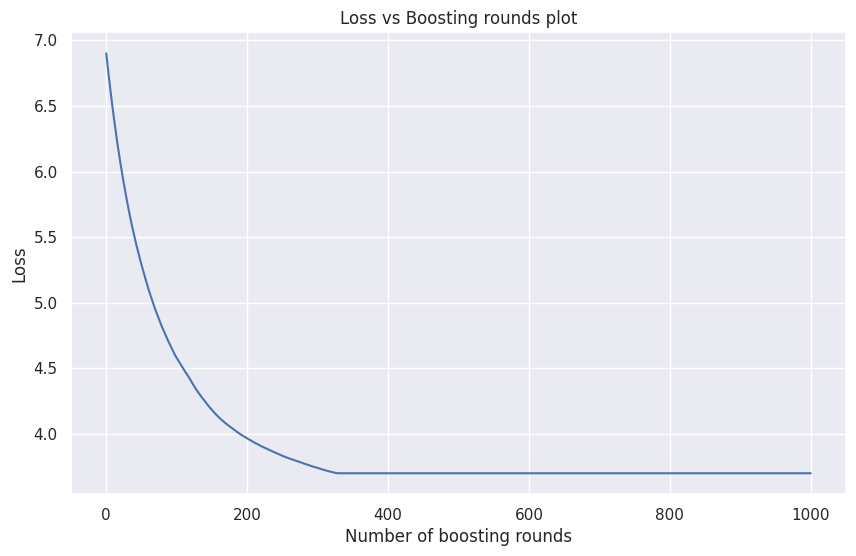

In [ ]:
# V·∫Ω ƒë·ªì th·ªã loss (MSE) theo s·ªë l∆∞·ª£ng v√≤ng l·∫∑p
losses = []
y_pred = np.full_like(y_train, gbm.initial_prediction)
for i, tree in enumerate(gbm.trees):
    y_pred += gbm.learning_rate * tree.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=range(len(losses)), y=losses)
ax.set(xlabel='Number of boosting rounds', ylabel='Loss', title='Loss vs Boosting rounds plot')
plt.show()


##Random Forest

>**√ù t∆∞·ªüng:**

* R·ª´ng ng·∫´u nhi√™n / R·ª´ng c√¢y (Random Forest) l√† m·ªôt trong nh·ªØng thu·∫≠t to√°n h·ªçc c√≥ gi√°m s√°t **tree-based (D·ª±a tr√™n c√¢y)** ph·ªï bi·∫øn nh·∫•t. N√≥ c≈©ng l√† m·ªôt trong nh·ªØng thu·∫≠t to√°n linh ho·∫°t v√† d·ªÖ s·ª≠ d·ª•ng nh·∫•t.

* Thu·∫≠t to√°n n√†y c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ gi·∫£i quy·∫øt c·∫£ b√†i to√°n ph√¢n lo·∫°i v√† h·ªìi quy.

* M√¥ h√¨nh r·ª´ng c√¢y ƒë∆∞·ª£c hu·∫•n luy·ªán d·ª±a tr√™n s·ª± ph·ªëi h·ª£p gi·ªØa lu·∫≠t ***k·∫øt h·ª£p (ensembling)*** v√† qu√° tr√¨nh ***l·∫•y m·∫´u t√°i l·∫∑p (boostrapping)***

* C·ª• th·ªÉ thu·∫≠t to√°n n√†y t·∫°o ra nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh m√† m·ªói c√¢y quy·∫øt ƒë·ªãnh ƒë∆∞·ª£c hu·∫•n luy·ªán d·ª±a tr√™n nhi·ªÅu m·∫´u con kh√°c nhau v√† k·∫øt qu·∫£ d·ª± b√°o l√† b·∫ßu c·ª≠ (voting) t·ª´ to√†n b·ªô nh·ªØng c√¢y quy·∫øt ƒë·ªãnh.


>**∆Øu ƒëi·ªÉm**

* Do m·ªôt k·∫øt qu·∫£ d·ª± b√°o ƒë∆∞·ª£c t·ªïng h·ª£p t·ª´ nhi·ªÅu m√¥ h√¨nh n√™n k·∫øt qu·∫£ c·ªßa ch√∫ng s·∫Ω kh√¥ng b·ªã ch·ªách.

* ƒê·ªìng th·ªùi k·∫øt h·ª£p k·∫øt qu·∫£ d·ª± b√°o t·ª´ nhi·ªÅu m√¥ h√¨nh s·∫Ω c√≥ ph∆∞∆°ng sai nh·ªè h∆°n so v·ªõi ch·ªâ m·ªôt m√¥ h√¨nh. ƒêi·ªÅu n√†y gi√∫p cho m√¥ h√¨nh kh·∫Øc ph·ª•c ƒë∆∞·ª£c hi·ªán t∆∞·ª£ng qu√° kh·ªõp (overfitting).

>**M√¥ h√¨nh k·∫øt h·ª£p (ensemble model)**

* L√† k·∫øt h·ª£p nhi·ªÅu m√¥ h√¨nh ƒë·ªÉ th·ª±c hi·ªán d·ª± b√°o k·∫øt qu·∫£. M·ªói m√¥ h√¨nh s·∫Ω c√≥ m·ªôt d·ª± b√°o ri√™ng v√† ta s·∫Ω th·ª±c hi·ªán B·∫ßu C·ª≠ (Voting) ƒë·ªÉ t√¨m ra k·∫øt qu·∫£ cho m√¥ h√¨nh k·∫øt h·ª£p.

* Th√¥ng th∆∞·ªùng nh·ªØng k·∫øt qu·∫£ t·ª´ m√¥ h√¨nh k·∫øt h·ª£p s·∫Ω t·ªët h∆°n so v·ªõi ch·ªâ s·ª≠ d·ª•ng m·ªôt m√¥ h√¨nh b·ªüi ch√∫ng ta ƒëang v·∫≠n d·ª•ng tr√≠ th√¥ng minh ƒë√°m ƒë√¥ng (wisdom of the crowd). ƒêi·ªÅu n√†y ƒë√£ ƒë∆∞·ª£c ki·ªÉm ch·ª©ng ·ªü nhi·ªÅu l·ªõp m√¥ h√¨nh kh√°c nhau trong th·ª±c nghi·ªám.

>**L·∫•y m·∫´u t√°i l·∫≠p (boostrapping)**

* Thu·∫≠t to√°n r·ª´ng c√¢y s·∫Ω s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p l·∫•y m·∫´u t√°i l·∫≠p ƒë·ªÉ t·∫°o th√†nh `B`
 t·∫≠p d·ªØ li·ªáu con t·ª´ m·ªôt t·∫≠p `D = {(x1, y1), (x2, y2),...,(xN, yN)}` ban ƒë·∫ßu c√≥ `N` quan s√°t.

* Qu√° tr√¨nh l·∫•y m·∫´u t√°i l·∫≠p n√†y c√≤n g·ªçi l√† b·ªè t√∫i (bagging). T·ª©c l√† ch√∫ng ta s·∫Ω th·ª±c hi·ªán `M` l∆∞·ª£t nh·∫∑t c√°c m·∫´u t·ª´ t·ªïng th·ªÉ v√† b·ªè v√†o t√∫i ƒë·ªÉ t·∫°o th√†nh t·∫≠p con `Bi`. T·∫≠p `Bi` cho ph√©p c√°c ph·∫ßn t·ª≠ ƒë∆∞·ª£c l·∫∑p l·∫°i. Nh∆∞ v·∫≠y s·∫Ω t·ªìn t·∫°i nh·ªØng quan s√°t thu·ªôc `D` nh∆∞ng kh√¥ng thu·ªôc `Bi`. ƒê√¢y l√† nh·ªØng quan s√°t ch∆∞a ƒë∆∞·ª£c b·ªè v√†o t√∫i v√† ch√∫ng ta g·ªçi ch√∫ng l√† n·∫±m ngo√†i t√∫i (out of bag).

* M·ªói m√¥ h√¨nh trong m√¥ h√¨nh k·∫øt h·ª£p s·∫Ω s·ª≠ d·ª•ng m·ªói t·∫≠p d·ªØ li·ªáu con `Bi` ƒë·ªÉ th·ª±c hi·ªán d·ª± b√°o. M√¥ h√¨nh d·ª± b√°o t·ª´ c√¢y quy·∫øt ƒë·ªãnh l√† gi√° tr·ªã trung b√¨nh ho·∫∑c b·∫ßu c·ª≠ c·ªßa `B` c√¢y quy·∫øt ƒë·ªãnh (M·ªói t·∫≠p d·ªØ li·ªáu con t∆∞∆°ng ·ª©ng v·ªõi m·ªói c√¢y ƒë∆∞·ª£c th·ª±c hi·ªán).

* N·∫øu s·ª≠ d·ª•ng d·ª± b√°o l√† trung b√¨nh k·∫øt h·ª£p t·ª´ nhi·ªÅu m√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh th√¨ ph∆∞∆°ng sai c√≥ th·ªÉ gi·∫£m `B` l·∫ßn so v·ªõi ch·ªâ s·ª≠ d·ª•ng m·ªôt m√¥ h√¨nh duy nh·∫•t. Trong m·ªôt m√¥ h√¨nh r·ª´ng c√¢y, s·ªë l∆∞·ª£ng c√°c c√¢y quy·∫øt ƒë·ªãnh l√† r·∫•t l·ªõn. Do ƒë√≥ ph∆∞∆°ng sai d·ª± b√°o t·ª´ m√¥ h√¨nh c√≥ th·ªÉ gi·∫£m g·∫•p nhi·ªÅu l·∫ßn v√† t·∫°o ra m·ªôt d·ª± b√°o ·ªïn ƒë·ªãnh h∆°n.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
X_RF = data.drop('Price', axis = 1)
y_RF = data['Price']

In [ ]:
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size = 0.2, random_state = 17, shuffle = False)

In [ ]:
# Kh·ªüi t·∫°o b·ªô chu·∫©n h√≥a
scaler = StandardScaler()

# Chu·∫©n h√≥a d·ªØ li·ªáu hu·∫•n luy·ªán
X_RF_train = scaler.fit_transform(X_RF_train)

# Chu·∫©n h√≥a d·ªØ li·ªáu ki·ªÉm tra (s·ª≠ d·ª•ng c√°c tham s·ªë ƒë√£ h·ªçc t·ª´ t·∫≠p hu·∫•n luy·ªán)
X_RF_test = scaler.transform(X_RF_test)

**Ch·ªçn c√°c tham s·ªë t·ªëi ∆∞u b·∫±ng GridSearch**

In [ ]:
# X√°c ƒë·ªãnh c√°c si√™u tham s·ªë c·∫ßn ƒëi·ªÅu ch·ªânh v·ªõi ph·∫°m vi m·ªõi
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Kh·ªüi t·∫°o m√¥ h√¨nh Random Forest
rf = RandomForestRegressor(random_state = 17)

# S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m ki·∫øm si√™u tham s·ªë t·ªët nh·∫•t
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           scoring='neg_mean_squared_error',
                           cv = 5, verbose = 1, n_jobs = -1)

# Hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán
grid_search.fit(X_RF_train, y_RF_train)

# In ra c√°c si√™u tham s·ªë t·ªët nh·∫•t ƒë√£ t√¨m ƒë∆∞·ª£c
print("Best Parameters:", grid_search.best_params_)
# D√πng c√°c si√™u tham s·ªë t·ªët nh·∫•t t·ª´ grid_search cho m√¥ h√¨nh t·ª´ ƒë·∫ßu
best_params = grid_search.best_params_

n_estimators = best_params['n_estimators']
max_features = best_params['max_features']
max_depth = best_params['max_depth']
min_samples_split = best_params['min_samples_split']

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
# D·ª± ƒëo√°n tr√™n t·∫≠p test v√† t√≠nh mean squared error
y_RF_pred = grid_search.best_estimator_.predict(X_RF_test)
mse_RF = mean_squared_error(y_RF_test, y_RF_pred)
print("Mean Squared Error on Validation Set:", mse_RF)

Mean Squared Error on Validation Set: 3.752127543939202


In [ ]:

rf_regressor = RandomForestRegressor(n_estimators = 150, max_depth = 15, max_features = 'sqrt', min_samples_split = 5, min_samples_leaf = 2)

# Hu·∫•n luy·ªán m√¥ h√¨nh
rf_regressor.fit(X_RF_train, y_RF_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=150)

In [ ]:
# d·ª± ƒëo√°n v·ªÅ d·ªØ li·ªáu th·ª≠ nghi·ªám
y_RF_pred = rf_regressor.predict(X_RF_test)

In [ ]:
# L·ªói b√¨nh ph∆∞∆°ng R
error_score = metrics.r2_score(y_RF_test, y_RF_pred)
print("R squared error (RandomForest) : ", error_score)

R squared error (RandomForest) :  0.46224709226552907


In [ ]:
# S·ª≠ d·ª•ng h√†m c√≥ s·∫µn trong th∆∞ vi·ªán sklearn.metrics ƒë·ªÉ t√¨m MSE
from sklearn.metrics import mean_squared_error

X_RF_train_pred = rf_regressor.predict(X_RF_train)
print(">> Train MSE (RandomForest): ", mean_squared_error(X_RF_train_pred , y_RF_train))

X_RF_test_pred = rf_regressor.predict(X_RF_test)
print(">> Test MSE (RandomForest):  ", mean_squared_error(X_RF_test_pred , y_RF_test))

>> Train MSE (RandomForest):  1.4631269456073475
>> Test MSE (RandomForest):   3.7095291269703172


In [ ]:
from sklearn.metrics import r2_score


# D·ª± ƒëo√°n tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
y_train_pred = rf_regressor.predict(X_RF_train)
y_test_pred = rf_regressor.predict(X_RF_test)

# T√≠nh to√°n R^2 cho t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
r2_train = r2_score(y_RF_train, y_train_pred)
r2_test = r2_score(y_RF_test, y_test_pred)

print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train R^2: 0.789075169790925
Test R^2: 0.46224709226552907


In [ ]:
# M√¥-ƒëun sklearn.metrics th·ª±c hi·ªán m·ªôt s·ªë t√≠nh nƒÉng m·∫•t, ƒëi·ªÉm v√† ti·ªán √≠ch
# h√†m ƒë·ªÉ ƒëo hi·ªáu su·∫•t ph√¢n lo·∫°i.
# M·ªôt s·ªë s·ªë li·ªáu c√≥ th·ªÉ y√™u c·∫ßu ∆∞·ªõc t√≠nh x√°c su·∫•t c·ªßa l·ªõp d∆∞∆°ng,
# gi√° tr·ªã tin c·∫≠y ho·∫∑c gi√° tr·ªã quy·∫øt ƒë·ªãnh nh·ªã ph√¢n.
from sklearn import metrics

MAE_RF  = metrics.mean_absolute_error(y_RF_test, X_RF_test_pred)
MSE_RF  = metrics.mean_squared_error(y_RF_test, X_RF_test_pred)
RMSE_RF = np.sqrt(MSE_RF)
R2_RF = metrics.r2_score(y_RF_test, X_RF_test_pred)

pd.DataFrame([MAE_RF, MSE_RF, RMSE_RF, R2_RF], index=['MAE_RandomForest', 'MSE_RandomForest', 'RMSE_RandomForest', 'R^2_RandomForest'], columns=['Metrics'])

Metrics
MAE_RandomForest   1.382741
MSE_RandomForest   3.709529
RMSE_RandomForest  1.926014
R^2_RandomForest   0.462247

**V·∫§N ƒê·ªÄ:**

>Sau khi s·ª≠ d·ª•ng GridSearch ƒë·ªÉ t√¨m ra c√°c tham s·ªë t·ªëi ∆∞u nh∆∞ sau: max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 150

V·ªõi vi·ªác √°p d·ª•ng nh·ªØng tham s·ªë tr√™n ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh th√¨ ch√∫ng t√¥i ƒë√£ nh·∫≠n ƒë∆∞·ª£c m·ªôt k·∫øt qu·∫£ l√† m√¥ h√¨nh h·ªçc QU√Å T·ªêT tr√™n t·∫≠p Train:

* Train MSE (RandomForest):  1.4627423886055304  

* Test MSE (RandomForest):   3.777179554477981

* Train R^2: 0.7891306076465106

* Test R^2: 0.4524401294795437

**NH·∫¨N ƒê·ªäNH:** Vi·ªác m√¥ h√¨nh h·ªçc QU√Å T·ªêT nh∆∞ th·∫ø c√≥ th·ªÉ l√† d·∫•u hi·ªáu c·ªßa Overfitting.

**GI·∫¢I PH√ÅP:**

N·∫øu m√¥ h√¨nh Random Forest ƒëang b·ªã overfitting, ch√∫ng ta c√≥ th·ªÉ c·∫ßn ph·∫£i ƒëi·ªÅu ch·ªânh c√°c si√™u tham s·ªë ƒë·ªÉ tƒÉng c∆∞·ªùng kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh. D∆∞·ªõi ƒë√¢y l√† m·ªôt s·ªë g·ª£i √Ω ƒë·ªÉ t√¨m c√°c si√™u tham s·ªë t·ªëi ∆∞u h∆°n:

1. **Gi·∫£m s·ªë l∆∞·ª£ng c√¢y (n_estimators):** S·ªë l∆∞·ª£ng c√¢y qu√° cao c√≥ th·ªÉ l√†m tƒÉng ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh. B·∫°n c√≥ th·ªÉ th·ª≠ c√°c gi√° tr·ªã th·∫•p h∆°n cho n_estimators.

2. **Gi·∫£m ƒë·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (max_depth):** Gi·∫£m max_depth s·∫Ω gi√∫p gi·∫£m kh·∫£ nƒÉng m√¥ h√¨nh h√≥a qu√° m·ª©c d·ªØ li·ªáu hu·∫•n luy·ªán.

3. **TƒÉng s·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu ƒë·ªÉ chia m·ªôt n√∫t (min_samples_split):** ƒêi·ªÅu n√†y s·∫Ω ngƒÉn ch·∫∑n c√°c c√¢y h·ªçc chi ti·∫øt qu√° m·ª©c t·ª´ c√°c m·∫´u nh·ªè.

4. **TƒÉng s·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu t·∫°i m·ªói l√° (min_samples_leaf):** ƒêi·ªÅu n√†y c√≥ th·ªÉ gi√∫p gi·∫£m overfitting b·∫±ng c√°ch y√™u c·∫ßu m·ªói l√° c√≥ nhi·ªÅu m·∫´u h∆°n.

5. **S·ª≠ d·ª•ng bootstrap m·∫´u:** ƒê·∫£m b·∫£o r·∫±ng t√≠nh nƒÉng bootstrap (l·∫•y m·∫´u v·ªõi thay th·∫ø) ƒë∆∞·ª£c b·∫≠t (th∆∞·ªùng l√† m·∫∑c ƒë·ªãnh), gi√∫p m√¥ h√¨nh ·ªïn ƒë·ªãnh h∆°n.

**C·∫¢I TI·∫æN TH√äM:**

N·∫øu b·∫°n mu·ªën t·ªëi ∆∞u h√≥a h∆°n n·ªØa m√¥ h√¨nh, d∆∞·ªõi ƒë√¢y l√† m·ªôt s·ªë g·ª£i √Ω:

1. Fine-tuning th√™m c√°c si√™u tham s·ªë: B·∫°n c√≥ th·ªÉ ti·∫øp t·ª•c th·ª≠ nghi·ªám v·ªõi c√°c gi√° tr·ªã kh√°c nhau cho c√°c si√™u tham s·ªë nh∆∞ min_samples_split, min_samples_leaf, ho·∫∑c max_depth.
2. Th·ª≠ nghi·ªám c√°c k·ªπ thu·∫≠t kh√°c:
    * Feature Engineering: Ki·ªÉm tra v√† t·ªëi ∆∞u h√≥a c√°c ƒë·∫∑c tr∆∞ng (features) trong t·∫≠p d·ªØ li·ªáu c·ªßa b·∫°n.
    * Ensemble Methods: K·∫øt h·ª£p c√°c m√¥ h√¨nh kh√°c nhau ƒë·ªÉ tƒÉng c∆∞·ªùng kh·∫£ nƒÉng d·ª± ƒëo√°n (v√≠ d·ª•: stacking, blending).
    * Regularization: S·ª≠ d·ª•ng c√°c k·ªπ thu·∫≠t regularization ƒë·ªÉ gi·∫£m overfitting.
3. Th√™m d·ªØ li·ªáu: N·∫øu c√≥ th·ªÉ, thu th·∫≠p th√™m d·ªØ li·ªáu hu·∫•n luy·ªán ƒë·ªÉ c·∫£i thi·ªán kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh.

**K·∫æT LU·∫¨N:** Sau khi th·ª≠ nghi·ªám nhi·ªÅu b·ªô tham s·ªë, t√¥i nh·∫≠n th·∫•y khi:

* TƒÉng s·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu ƒë·ªÉ chia m·ªôt n√∫t (min_samples_split)

* TƒÉng s·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu t·∫°i m·ªói l√° (min_samples_leaf)

**C·ª• th·ªÉ: min_samples_leaf = 30, min_samples_split = 30 v√† gi·ªØ nguy√™n c√°c tham s·ªë kh√°c l√† b·ªô tham s·ªë t·ªëi ∆∞u nh·∫•t v√† H·∫†N CH·∫æ OVERFITTING.**



In [ ]:

rf_regressor = RandomForestRegressor(n_estimators = 150, max_depth = 15, max_features = 'sqrt', min_samples_split = 30, min_samples_leaf = 30)

#Hu·∫•n luy·ªán m√¥ h√¨nh b·∫±ng c√°ch s·ª≠ d·ª•ng t·∫≠p hu·∫•n luy·ªán
rf_regressor.fit(X_RF_train, y_RF_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=30,
                      min_samples_split=30, n_estimators=150)

In [ ]:
# d·ª± ƒëo√°n v·ªÅ d·ªØ li·ªáu th·ª≠ nghi·ªám
y_RF_pred = rf_regressor.predict(X_RF_test)

In [ ]:
# L·ªói b√¨nh ph∆∞∆°ng R
error_score = metrics.r2_score(y_RF_test, y_RF_pred)
print("R squared error (RandomForest) : ", error_score)

R squared error (RandomForest) :  0.4303277960635208


In [ ]:
#  S·ª≠ d·ª•ng h√†m c√≥ s·∫µn trong th∆∞ vi·ªán sklearn.metrics ƒë·ªÉ t√¨m MSE
from sklearn.metrics import mean_squared_error

X_RF_train_pred = rf_regressor.predict(X_RF_train)
print(">> Train MSE (RandomForest): ", mean_squared_error(X_RF_train_pred , y_RF_train))

X_RF_test_pred = rf_regressor.predict(X_RF_test)
print(">> Test MSE (RandomForest):  ", mean_squared_error(X_RF_test_pred , y_RF_test))

>> Train MSE (RandomForest):  3.5727352670591723
>> Test MSE (RandomForest):   3.9297149358626946


In [ ]:
from sklearn.metrics import r2_score


# D·ª± ƒëo√°n tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
y_train_pred = rf_regressor.predict(X_RF_train)
y_test_pred = rf_regressor.predict(X_RF_test)

# T√≠nh to√°n R^2 cho t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
r2_train = r2_score(y_RF_train, y_train_pred)
r2_test = r2_score(y_RF_test, y_test_pred)

print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train R^2: 0.48495338572715707
Test R^2: 0.4303277960635208


In [ ]:
# M√¥-ƒëun sklearn.metrics th·ª±c hi·ªán m·ªôt s·ªë t√≠nh nƒÉng m·∫•t, ƒëi·ªÉm v√† ti·ªán √≠ch
# h√†m ƒë·ªÉ ƒëo hi·ªáu su·∫•t ph√¢n lo·∫°i.
# M·ªôt s·ªë s·ªë li·ªáu c√≥ th·ªÉ y√™u c·∫ßu ∆∞·ªõc t√≠nh x√°c su·∫•t c·ªßa l·ªõp d∆∞∆°ng,
# gi√° tr·ªã tin c·∫≠y ho·∫∑c gi√° tr·ªã quy·∫øt ƒë·ªãnh nh·ªã ph√¢n.
from sklearn import metrics

MAE_RF  = metrics.mean_absolute_error(y_RF_test, X_RF_test_pred)
MSE_RF  = metrics.mean_squared_error(y_RF_test, X_RF_test_pred)
RMSE_RF = np.sqrt(MSE_RF)
R2_RF = metrics.r2_score(y_RF_test, X_RF_test_pred)

pd.DataFrame([MAE_RF, MSE_RF, RMSE_RF, R2_RF], index=['MAE_RandomForest', 'MSE_RandomForest', 'RMSE_RandomForest', 'R^2_RandomForest'], columns=['Metrics'])

Metrics
MAE_RandomForest   1.452257
MSE_RandomForest   3.929715
RMSE_RandomForest  1.982351
R^2_RandomForest   0.430328

###Important Feature

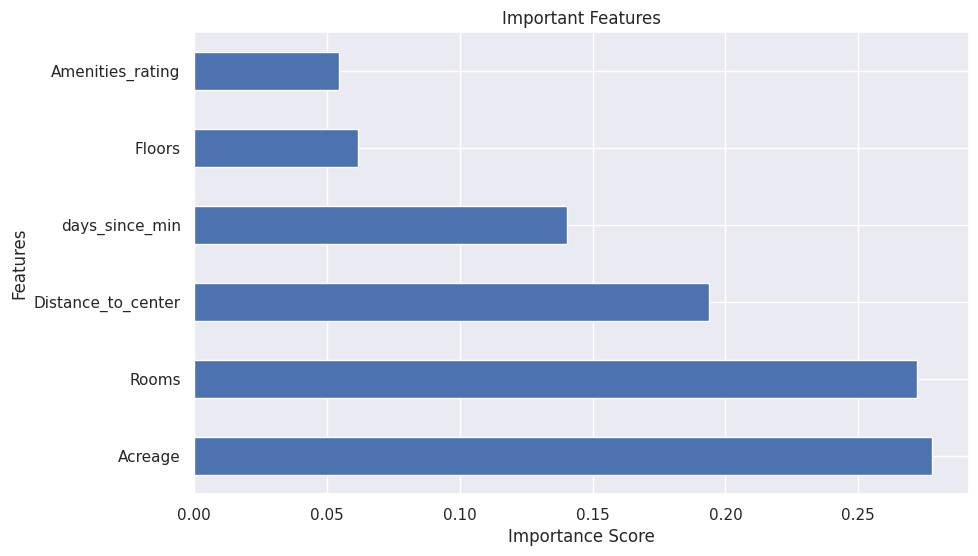

In [ ]:
best_rf_model = grid_search.best_estimator_

feature_importances = best_rf_model.feature_importances_

feature_importance = pd.Series(feature_importances, index=columns)

top_features = feature_importance.sort_values(ascending=False).head(15)


plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


##RandomForest From Scratch (Interface)

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

###T·ªïng Quan

>**T·ªïng quan:**

* Random Forests ƒë∆∞·ª£c bi·∫øt ƒë·∫øn nh∆∞ l√† c√°c ph∆∞∆°ng ph√°p h·ªçc t·ªï h·ª£p ƒë∆∞·ª£c s·ª≠ d·ª•ng cho vi·ªác ph√¢n lo·∫°i v√† h·ªìi quy, nh∆∞ng trong tr∆∞·ªùng h·ª£p c·ª• th·ªÉ n√†y t√¥i s·∫Ω t·∫≠p trung v√†o ph√¢n lo·∫°i.

* Random Forests v·ªÅ c∆° b·∫£n l√† m·ªôt t·∫≠p h·ª£p c√°c c√¢y quy·∫øt ƒë·ªãnh m√† m·ªói c√¢y ƒë∆∞·ª£c t·∫°o tr√™n m·ªôt m·∫´u con c·ªßa d·ªØ li·ªáu. Trong khi m·ªôt c√¢y c√° nh√¢n th∆∞·ªùng c√≥ nhi·ªÅu nhi·ªÖu v√† d·ªÖ b·ªã bi·∫øn thi√™n cao, Random Forests t√≠nh trung b√¨nh t·ª´ k·∫øt qu·∫£ c·ªßa nhi·ªÅu c√¢y kh√°c nhau, t·ª´ ƒë√≥ gi·∫£m thi·ªÉu bi·∫øn thi√™n v√† ƒë∆∞a ra cho ch√∫ng ta m·ªôt b·ªô ph√¢n lo·∫°i m·∫°nh m·∫Ω.

* **Random forests l√† m√¥ h√¨nh phi tham s·ªë (kh√¥ng c√≥ tham s·ªë) v√† y√™u c·∫ßu √≠t ho·∫∑c kh√¥ng c·∫ßn ƒëi·ªÅu ch·ªânh tham s·ªë**. Ch√∫ng kh√°c bi·ªát v·ªõi nhi·ªÅu m√¥ h√¨nh h·ªçc m√°y th√¥ng th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ng√†y nay th∆∞·ªùng ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a b·∫±ng c√°ch s·ª≠ d·ª•ng gradient descent. C√°c m√¥ h√¨nh nh∆∞ h·ªìi quy tuy·∫øn t√≠nh, Support Vector Machine (SVM), m·∫°ng neural (Neural Network), v.v. y√™u c·∫ßu nhi·ªÅu ph√©p to√°n d·ª±a tr√™n ma tr·∫≠n, trong khi c√°c m√¥ h√¨nh d·ª±a tr√™n c√¢y nh∆∞ r·ª´ng ng·∫´u nhi√™n ƒë∆∞·ª£c x√¢y d·ª±ng b·∫±ng s·ªë h·ªçc c∆° b·∫£n. N√≥i c√°ch kh√°c, ƒë·ªÉ x√¢y d·ª±ng m·ªôt c√¢y, ch√∫ng ta th·ª±c s·ª± ch·ªâ c·∫ßn ch·ªçn m·ªôt s·ªë quan s√°t t·ª´ t·∫≠p d·ªØ li·ªáu c·ªßa ch√∫ng ta, ch·ªçn m·ªôt s·ªë ƒë·∫∑c tr∆∞ng ƒë·ªÉ xem x√©t, v√† t√¨m gi√° tr·ªã t·∫°o ra s·ª± ph√¢n chia t·ªët nh·∫•t trong d·ªØ li·ªáu c·ªßa ch√∫ng ta.

>**Decision Tree (C√¢y Quy·∫øt ƒê·ªãnh):**

* **M·ªôt c√°i nh√¨n t·ªïng quan nhanh** n·∫øu b·∫°n kh√¥ng quen v·ªõi c√¢y quy·∫øt ƒë·ªãnh nh·ªã ph√¢n. Ch√∫ng ta b·∫Øt ƒë·∫ßu t·ª´ ƒë·ªânh r·∫•t cao, m√† ch√∫ng ta s·∫Ω g·ªçi l√† n√∫t g·ªëc, v√† ƒë·∫∑t ra m·ªôt c√¢u h·ªèi ƒë∆°n gi·∫£n. N·∫øu c√¢u tr·∫£ l·ªùi cho c√¢u h·ªèi ƒë√≥ ƒë√∫ng, ch√∫ng ta s·∫Ω di chuy·ªÉn ƒë·∫øn n√∫t b√™n tr√°i k·∫øt n·ªëi tr·ª±c ti·∫øp b√™n d∆∞·ªõi, m√† ch√∫ng ta s·∫Ω g·ªçi l√† n√∫t con b√™n tr√°i, ng∆∞·ª£c l·∫°i, n·∫øu c√¢u tr·∫£ l·ªùi sai, ch√∫ng ta s·∫Ω di chuy·ªÉn xu·ªëng n√∫t b√™n ph·∫£i, m√† ch√∫ng ta s·∫Ω g·ªçi l√† n√∫t con b√™n ph·∫£i. Ch√∫ng ta s·∫Ω l·∫∑p l·∫°i qu√° tr√¨nh n√†y cho ƒë·∫øn khi ch√∫ng ta ƒë·∫°t ƒë∆∞·ª£c m·ªôt trong nh·ªØng n√∫t d∆∞·ªõi c√πng, c√≤n ƒë∆∞·ª£c g·ªçi l√† c√°c n√∫t cu·ªëi. ƒê·ªëi v·ªõi ph√¢n lo·∫°i, c√°c n√∫t cu·ªëi s·∫Ω ƒë∆∞a ra l·ªõp m√† c√≥ t·∫ßn su·∫•t xu·∫•t hi·ªán nhi·ªÅu nh·∫•t, trong khi trong b·ªëi c·∫£nh h·ªìi quy, ch√∫ng s·∫Ω ƒë∆∞a ra d·ª± ƒëo√°n trung b√¨nh.

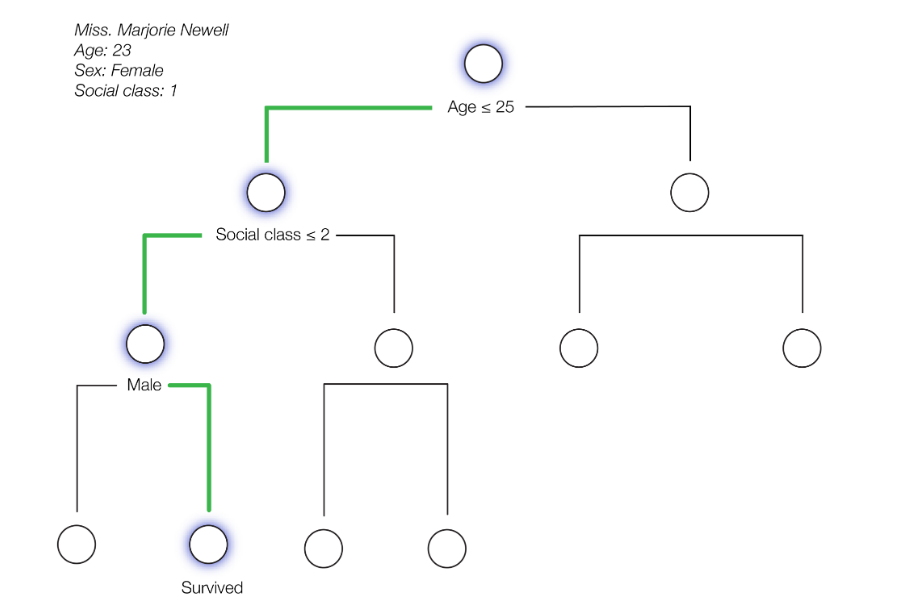

* V·∫•n ƒë·ªÅ khi d·ª±a v√†o m·ªôt c√¢y ƒë∆°n l·∫ª l√† n√≥ c·∫ßn r·∫•t nhi·ªÅu ƒë·ªô s√¢u ƒë·ªÉ c√≥ ƒë∆∞·ª£c s·ª©c m·∫°nh d·ª± ƒëo√°n m·∫°nh m·∫Ω. C√¢y quy·∫øt ƒë·ªãnh nh·ªã ph√¢n c√≥ th·ªÉ c√≥ k√≠ch th∆∞·ªõc l√™n ƒë·∫øn \(2^{d+1} - 1\), trong ƒë√≥ \(d\) l√† ƒë·ªô s√¢u c·ªßa c√¢y, v√¨ v·∫≠y v√≠ d·ª•, m·ªôt c√¢y c√≥ ƒë·ªô s√¢u l√† 10 c√≥ th·ªÉ ƒë·∫∑t ra ƒë·∫øn 2047 c√¢u h·ªèi kh√°c nhau. ƒêi·ªÅu n√†y cu·ªëi c√πng d·∫´n ƒë·∫øn s·ª± ph·ª©c t·∫°p r·∫•t l·ªõn trong c√¢y c·ªßa ch√∫ng ta v√† trong th·∫ø gi·ªõi h·ªçc m√°y, ƒë·ªô ph·ª©c t·∫°p cao d·∫´n ƒë·∫øn ƒë·ªô ph∆∞∆°ng sai cao.

* **C√¢y quy·∫øt ƒë·ªãnh c√≥ c√°i g·ªçi l√† ƒë·ªô ch·ªách th·∫•p v√† ƒë·ªô ph∆∞∆°ng sai cao**. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† m√¥ h√¨nh c·ªßa ch√∫ng ta kh√¥ng nh·∫•t qu√°n, nh∆∞ng **trung b√¨nh th√¨ ch√≠nh x√°c**. H√£y t∆∞·ªüng t∆∞·ª£ng m·ªôt b·∫£ng phi ti√™u ƒë·∫ßy phi ti√™u n·∫±m r·∫£i r√°c kh·∫Øp n∆°i, tr∆∞·ª£t tr√°i v√† ph·∫£i, tuy nhi√™n, n·∫øu ch√∫ng ta trung b√¨nh ch√∫ng l·∫°i th√†nh m·ªôt phi ti√™u duy nh·∫•t, ch√∫ng ta c√≥ th·ªÉ ƒë·∫°t ƒë∆∞·ª£c m·ªôt c√∫ n√©m v√†o t√¢m. M·ªói c√¢y ri√™ng l·∫ª c√≥ th·ªÉ ƒë∆∞·ª£c coi nh∆∞ nh·ªØng phi ti√™u kh√¥ng ch√≠nh x√°c v√† m·ªôt r·ª´ng ng·∫´u nhi√™n s·∫Ω mang l·∫°i cho ch√∫ng ta c√∫ n√©m v√†o t√¢m ƒë√≥.

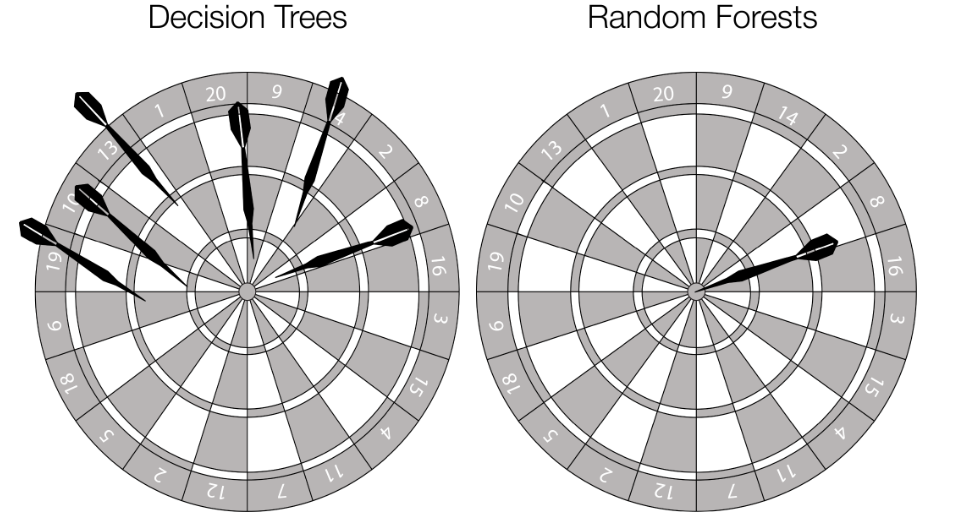

###Entropy

C√°c ph√©p ƒëo th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng nh·∫•t ƒë·ªÉ x√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh nh·ªã ph√¢n l√†: Entropy, L·ªói Ph√¢n lo·∫°i (Classification Error), v√† Ch·ªâ s·ªë Gini (Gini Index). Trong ch·ªß ƒë·ªÅ n√†y, ch√∫ng ta s·∫Ω t·∫≠p trung v√†o entropy, m·ªôt ph√©p ƒëo s·ª± kh√¥ng ch·∫Øc ch·∫Øn (ƒë√¥i khi g·ªçi l√† ƒë·ªô t·∫°p) s·ª≠ d·ª•ng c√¥ng th·ª©c sau:

\[ H(X) = -\sum_j p_j \log p_j \]

trong ƒë√≥ \( p_j \) l√† x√°c su·∫•t c·ªßa l·ªõp \( j \).

Entropy tu√¢n theo m·ªôt c√°ch di·ªÖn gi·∫£i r·∫•t tr·ª±c quan v·ªõi c√°c ƒë·∫∑c t√≠nh sau:

- **Certainty (Ch·∫Øc ch·∫Øn)**: Entropy ƒë∆∞·ª£c t·ªëi thi·ªÉu h√≥a khi t·∫•t c·∫£ c√°c m·∫´u trong m·ªôt n√∫t thu·ªôc c√πng m·ªôt l·ªõp sao cho \( P(X=1)=1 \) (trong tr∆∞·ªùng h·ª£p c·ªßa ch√∫ng ta, m·ªçi h√†nh kh√°ch ƒë·ªÅu s·ªëng s√≥t).
  \[ -1 \log_2 (1) - 0 \log_2 (0) = 0 \]
  
- **Uncertainty (Kh√¥ng ch·∫Øc ch·∫Øn)**: Entropy ƒë∆∞·ª£c t·ªëi ƒëa h√≥a khi ch√∫ng ta c√≥ ph√¢n ph·ªëi l·ªõp ƒë·ªìng ƒë·ªÅu sao cho \( P(X=1) = 0.5 \) (trong tr∆∞·ªùng h·ª£p c·ªßa ch√∫ng ta, m·ªói h√†nh kh√°ch c√≥ 50% c∆° h·ªôi s·ªëng s√≥t).
  \[ -0.5 \log_2 (0.5) - 0.5 \log_2 (0.5) = 0.5 + 0.5 = 1 \]

Khi ch√∫ng ta t√¨m ki·∫øm m·ªôt t·∫≠p hu·∫•n luy·ªán ƒë·ªÉ chia, ch√∫ng ta s·∫Ω mu·ªën t√¨m m·ªôt t·∫≠p t·ªëi ƒëa h√≥a entropy, n∆°i m√† m·ªôt n·ª≠a s·ªë h√†nh kh√°ch s·ªëng s√≥t v√† m·ªôt n·ª≠a kh√¥ng, v√¨ v·∫≠y ch√∫ng ta s·∫Ω b·∫Øt ƒë·∫ßu kh√¥ng ch·∫Øc ch·∫Øn. Khi ch√∫ng ta t√¨m ki·∫øm m·ªôt gi√° tr·ªã ƒë·ªÉ chia, ch√∫ng ta s·∫Ω mu·ªën t·ªëi thi·ªÉu h√≥a entropy, ƒë·ªÉ k·∫øt th√∫c c√†ng ch·∫Øc ch·∫Øn c√†ng t·ªët.

In [ ]:
def entropy(p):
    # H√†m t√≠nh entropy c·ªßa x√°c su·∫•t p
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        # T√≠nh entropy d·ª±a tr√™n c√¥ng th·ª©c -p*log2(p) - (1-p)*log2(1-p)
        return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))


###Information Gain

Information Gain (ƒê·ªô tƒÉng Th√¥ng tin):
Information Gain ƒëo l∆∞·ªùng m·ª©c ƒë·ªô th√¥ng tin ch√∫ng ta thu ƒë∆∞·ª£c khi chia m·ªôt node t·∫°i m·ªôt gi√° tr·ªã c·ª• th·ªÉ. C√¥ng th·ª©c ƒë·ªÉ t√≠nh Information Gain l√†:

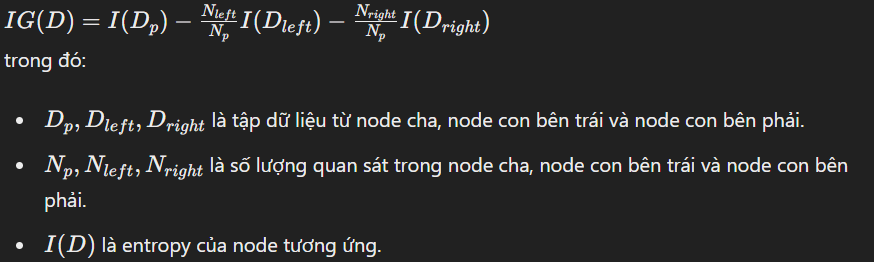

**Di·ªÖn gi·∫£i c√¥ng th·ª©c:**

**Information¬†Gain = Entropy¬†tr∆∞·ªõc¬†khi¬†chia‚àíEntropy¬†sau¬†khi¬†chia**

Entropy tr∆∞·ªõc khi chia l√† m·ª©c ƒë·ªô kh√¥ng ch·∫Øc ch·∫Øn c·ªßa d·ªØ li·ªáu tr∆∞·ªõc khi ch√∫ng ta th·ª±c hi·ªán ph√©p chia. Entropy sau khi chia l√† m·ª©c ƒë·ªô kh√¥ng ch·∫Øc ch·∫Øn c·ªßa d·ªØ li·ªáu sau khi chia.

In [ ]:

def information_gain(left_child, right_child):
    # H√†m t√≠nh th√¥ng tin thu ƒë∆∞·ª£c t·ª´ vi·ªác ph√¢n chia d·ªØ li·ªáu th√†nh left_child v√† right_child

    parent = left_child + right_child  # K·∫øt h·ª£p left_child v√† right_child ƒë·ªÉ t·∫°o th√†nh t·∫≠p d·ªØ li·ªáu ban ƒë·∫ßu
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0  # X√°c su·∫•t c·ªßa l·ªõp 1 trong t·∫≠p parent
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0  # X√°c su·∫•t c·ªßa l·ªõp 1 trong t·∫≠p left_child
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0  # X√°c su·∫•t c·ªßa l·ªõp 1 trong t·∫≠p right_child

    IG_p = entropy(p_parent)  # T√≠nh entropy c·ªßa t·∫≠p parent
    IG_l = entropy(p_left)  # T√≠nh entropy c·ªßa t·∫≠p left_child
    IG_r = entropy(p_right)  # T√≠nh entropy c·ªßa t·∫≠p right_child

    # T√≠nh th√¥ng tin thu ƒë∆∞·ª£c b·∫±ng c√°ch tr·ª´ ƒëi entropy c·ªßa c√°c t·∫≠p con (weighted sum) t·ª´ entropy c·ªßa t·∫≠p parent
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r


###Bootstrapping

**Ng·∫´u nhi√™n trong t·ª´ng c√¢y quy·∫øt ƒë·ªãnh:**

>M·ªôt trong nh·ªØng l√Ω do ch√≠nh khi·∫øn r·ª´ng ng·∫´u nhi√™n (Random Forest) m·∫°nh m·∫Ω l√† do t√≠nh ng·∫´u nhi√™n ƒë∆∞·ª£c ti√™m v√†o m·ªói c√¢y. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† m·ªói c√¢y quy·∫øt ƒë·ªãnh s·∫Ω ƒë∆∞·ª£c x√¢y d·ª±ng tr√™n m·ªôt t·∫≠p d·ªØ li·ªáu con bootstrapped c·ªßa d·ªØ li·ªáu g·ªëc.

**Bootstrapping:**

>N·∫øu t·∫≠p d·ªØ li·ªáu c·ªßa ch√∫ng ta c√≥
n quan s√°t, bootstrapping l√† qu√° tr√¨nh l·∫•y m·∫´u
n ƒëi·ªÉm v·ªõi ph√©p thay th·∫ø. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† m·ªôt s·ªë quan s√°t trong t·∫≠p d·ªØ li·ªáu c·ªßa ch√∫ng ta s·∫Ω ƒë∆∞·ª£c ch·ªçn nhi·ªÅu h∆°n m·ªôt l·∫ßn v√† m·ªôt s·ªë s·∫Ω kh√¥ng ƒë∆∞·ª£c ch·ªçn. Ch√∫ng ta c√≥ th·ªÉ t√≠nh x√°c su·∫•t m·ªôt quan s√°t b·ªã b·ªè qua trong t·∫≠p d·ªØ li·ªáu bootstrapped l√†:   
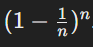

**Theo ƒë·ªãnh nghƒ©a:**

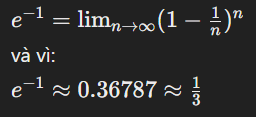

‚áí Bootstrapping n m·∫´u v·ªõi ph√©p thay th·∫ø s·∫Ω b·ªè qua kho·∫£ng 1/3 s·ªë quan s√°t trong m·ªói c√¢y ri√™ng bi·ªát. V√¨ m·ªói c√¢y ch·ªâ ƒë∆∞·ª£c x√¢y d·ª±ng v·ªõi kho·∫£ng 2/3 d·ªØ li·ªáu, ch√∫ng ta s·∫Ω th·∫•y r·∫±ng h·∫ßu h·∫øt c√°c c√¢y s·∫Ω kh√°c nhau ƒë√°ng k·ªÉ.

**Out-of-Bag Error (L·ªói OOB):**

M·ªôt l·ª£i √≠ch kh√°c c·ªßa bootstrapping l√† ch√∫ng ta c√≥ ƒë∆∞·ª£c ∆∞·ªõc l∆∞·ª£ng l·ªói out-of-bag (OOB) mi·ªÖn ph√≠. C√°c m·∫´u OOB l√† kho·∫£ng 1/3 c√°c quan s√°t kh√¥ng ƒë∆∞·ª£c ch·ªçn ƒë·ªÉ x√¢y d·ª±ng m·ªôt c√¢y c·ª• th·ªÉ. Sau khi x√¢y d·ª±ng c√¢y v·ªõi c√°c quan s√°t bootstrapped, ch√∫ng ta c√≥ th·ªÉ ki·ªÉm tra m·ªói **ùë•‚Éóùëñ** b·ªã b·ªè qua v√† t√≠nh to√°n l·ªói d·ª± ƒëo√°n trung b√¨nh t·ª´ nh·ªØng m·∫´u ƒë√≥. Ch√∫ng ta c√≥ th·ªÉ t√≠nh to√°n ƒëi·ªÉm OOB cho m·ªói c√¢y v√† l·∫•y trung b√¨nh c·ªßa t·∫•t c·∫£ c√°c ƒëi·ªÉm n√†y ƒë·ªÉ c√≥ ƒë∆∞·ª£c ∆∞·ªõc l∆∞·ª£ng v·ªÅ ƒë·ªô ch√≠nh x√°c c·ªßa r·ª´ng ng·∫´u nhi√™n. ƒêi·ªÅu n√†y th·ª±c ch·∫•t l√† d·∫°ng leave-one-out cross-validation. N√≥ cho ch√∫ng ta m·ªôt ∆∞·ªõc l∆∞·ª£ng v·ªÅ ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh m√† kh√¥ng c·∫ßn ph·∫£i th·ª≠ nghi·ªám ch√≠nh th·ª©c tr√™n d·ªØ li·ªáu m·ªõi v√† ch√∫ng ta s·∫Ω th·∫•y r·∫±ng n√≥ g·∫ßn b·∫±ng v·ªõi t·ª∑ l·ªá l·ªói khi th·ª≠ nghi·ªám.

**K·∫øt lu·∫≠n:**

R·ª´ng ng·∫´u nhi√™n m·∫°nh m·∫Ω nh·ªù t√≠nh ng·∫´u nhi√™n trong qu√° tr√¨nh x√¢y d·ª±ng t·ª´ng c√¢y quy·∫øt ƒë·ªãnh v√† l·ª£i √≠ch t·ª´ bootstrapping, nh∆∞ vi·ªác c√≥ ƒë∆∞·ª£c ∆∞·ªõc l∆∞·ª£ng l·ªói OOB m√† kh√¥ng c·∫ßn th·ª≠ nghi·ªám tr√™n d·ªØ li·ªáu m·ªõi. ƒêi·ªÅu n√†y gi√∫p r·ª´ng ng·∫´u nhi√™n c√≥ kh·∫£ nƒÉng t·ªïng qu√°t h√≥a t·ªët v√† ƒë·ªô ch√≠nh x√°c cao.

In [ ]:
def draw_bootstrap(X_train, y_train):
    # H√†m l·∫•y m·∫´u bootstrap t·ª´ t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán

    X_train_df = pd.DataFrame(X_train)  # Chuy·ªÉn X_train th√†nh DataFrame
    # L·∫•y ng·∫´u nhi√™n c√°c ch·ªâ s·ªë t·ª´ 0 ƒë·∫øn len(X_train)-1 v·ªõi thay th·∫ø (replace=True)
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace=True))
    # T√¨m c√°c ch·ªâ s·ªë kh√¥ng n·∫±m trong bootstrap_indices ƒë·ªÉ l√†m t·∫≠p d·ªØ li·ªáu OOB (out-of-bag)
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    # T·∫°o t·∫≠p d·ªØ li·ªáu bootstrap t·ª´ c√°c ch·ªâ s·ªë ƒë√£ ch·ªçn
    X_bootstrap = X_train_df.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    # T·∫°o t·∫≠p d·ªØ li·ªáu OOB t·ª´ c√°c ch·ªâ s·ªë c√≤n l·∫°i
    X_oob = X_train_df.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    # Tr·∫£ v·ªÅ t·∫≠p d·ªØ li·ªáu bootstrap v√† OOB
    return X_bootstrap, y_bootstrap, X_oob, y_oob


def oob_score(tree, X_test, y_test):
    # H√†m t√≠nh to√°n l·ªói OOB (out-of-bag error) cho c√¢y quy·∫øt ƒë·ªãnh

    mis_label = 0  # ƒê·∫øm s·ªë l∆∞·ª£ng nh√£n b·ªã sai
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])  # D·ª± ƒëo√°n nh√£n cho t·ª´ng m·∫´u trong X_test
        if pred != y_test[i]:  # N·∫øu nh√£n d·ª± ƒëo√°n kh√¥ng kh·ªõp v·ªõi nh√£n th·∫≠t
            mis_label += 1  # TƒÉng s·ªë l∆∞·ª£ng nh√£n b·ªã sai
    # T√≠nh to√°n t·ª∑ l·ªá l·ªói OOB b·∫±ng c√°ch chia s·ªë l∆∞·ª£ng nh√£n b·ªã sai cho t·ªïng s·ªë m·∫´u
    return mis_label / len(X_test)


###Bagging

**Bagging (Bootstrap Aggregating):**

Bagging l√† qu√° tr√¨nh tr·ªìng m·ªôt c√¢y m√† m·ªói node trong c√¢y xem x√©t m·ªçi gi√° tr·ªã trong m·∫´u bootstrapped cho t·ª´ng ƒë·∫∑c tr∆∞ng ƒë·ªÉ t√¨m ra ph√©p chia t·ªët nh·∫•t t·∫°i node ƒë√≥. Qu√° tr√¨nh n√†y ƒë∆∞·ª£c l·∫∑p l·∫°i cho t·∫•t c·∫£ c√°c c√¢y trong m√¥ h√¨nh.

**√ù t∆∞·ªüng ch√≠nh c·ªßa Bagging:**

* Bootstrapping: L·∫•y m·∫´u ng·∫´u nhi√™n v·ªõi thay th·∫ø t·ª´ t·∫≠p d·ªØ li·ªáu g·ªëc ƒë·ªÉ t·∫°o ra nhi·ªÅu t·∫≠p d·ªØ li·ªáu con.
* X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh: M·ªói c√¢y ƒë∆∞·ª£c x√¢y d·ª±ng tr√™n m·ªôt trong c√°c t·∫≠p d·ªØ li·ªáu bootstrapped n√†y, v√† m·ªói node trong c√¢y xem x√©t t·∫•t c·∫£ c√°c gi√° tr·ªã c·ªßa t·ª´ng ƒë·∫∑c tr∆∞ng ƒë·ªÉ t√¨m ra ph√©p chia t·ªët nh·∫•t.

**R·ª´ng Ng·∫´u nhi√™n (Random Forests):**

R·ª´ng ng·∫´u nhi√™n √°p d·ª•ng c√πng m·ªôt quy tr√¨nh nh∆∞ bagging, nh∆∞ng v·ªõi m·ªôt ƒëi·ªÉm kh√°c bi·ªát quan tr·ªçng: tr√™n m·ªôt t·∫≠p d·ªØ li·ªáu c√≥ ùëù ƒë·∫∑c tr∆∞ng, m·ªói c√¢y ch·ªâ xem x√©t m·ªôt t·∫≠p con ùëö ƒë·∫∑c tr∆∞ng t·∫°i m·ªói node, trong ƒë√≥:   
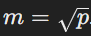

###find_split_point

**ƒê·ªÉ x√¢y d·ª±ng h√†m find_split_point, ch√∫ng ta s·∫Ω th·ª±c hi·ªán c√°c b∆∞·ªõc sau:**

1. Ch·ªçn ng·∫´u nhi√™n m ƒë·∫∑c tr∆∞ng.
2. ƒê·ªëi v·ªõi m·ªói ƒë·∫∑c tr∆∞ng ƒë∆∞·ª£c ch·ªçn, l·∫∑p qua t·ª´ng gi√° tr·ªã trong t·∫≠p d·ªØ li·ªáu bootstrapped v√† t√≠nh to√°n ƒë·ªô tƒÉng th√¥ng tin (information gain).
3. Tr·∫£ v·ªÅ m·ªôt dictionary ch·ª©a gi√° tr·ªã mang l·∫°i ƒë·ªô tƒÉng th√¥ng tin cao nh·∫•t, ƒë·∫°i di·ªán cho m·ªôt node trong c√¢y.

**M·ªói node s·∫Ω bao g·ªìm:**

* Ch·ªâ s·ªë c·ªßa ƒë·∫∑c tr∆∞ng.
* Gi√° tr·ªã ƒë·ªÉ chia t·∫°i ƒë·∫∑c tr∆∞ng ƒë√≥.
* Node con b√™n tr√°i.
* Node con b√™n ph·∫£i.

In [ ]:
def find_split_point(X_bootstrap, y_bootstrap, max_features):
    # H√†m t√¨m ƒëi·ªÉm chia t·ªët nh·∫•t trong t·∫≠p d·ªØ li·ªáu bootstrap

    feature_ls = list()  # Danh s√°ch c√°c ƒë·∫∑c tr∆∞ng s·∫Ω ƒë∆∞·ª£c xem x√©t
    num_features = len(X_bootstrap[0])  # S·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng trong d·ªØ li·ªáu

    # Ch·ªçn ng·∫´u nhi√™n c√°c ƒë·∫∑c tr∆∞ng ƒë·ªÉ xem x√©t, t·ªëi ƒëa l√† max_features ƒë·∫∑c tr∆∞ng
    while len(feature_ls) < max_features:
        feature_idx = random.sample(range(num_features), 1)[0]
        if feature_idx not in feature_ls:
            feature_ls.append(feature_idx)

    best_info_gain = -999  # Kh·ªüi t·∫°o gi√° tr·ªã th√¥ng tin thu ƒë∆∞·ª£c t·ªët nh·∫•t
    node = None  # Bi·∫øn l∆∞u tr·ªØ node t·ªët nh·∫•t

    # Duy·ªát qua t·ª´ng ƒë·∫∑c tr∆∞ng ƒë√£ ch·ªçn
    for feature_idx in feature_ls:
        # Duy·ªát qua t·ª´ng ƒëi·ªÉm chia trong ƒë·∫∑c tr∆∞ng
        for split_point in X_bootstrap[:, feature_idx]:
            left_child = {'X_bootstrap': [], 'y_bootstrap': []}  # Kh·ªüi t·∫°o t·∫≠p con tr√°i
            right_child = {'X_bootstrap': [], 'y_bootstrap': []}  # Kh·ªüi t·∫°o t·∫≠p con ph·∫£i

            # Ki·ªÉm tra lo·∫°i d·ªØ li·ªáu c·ªßa ƒëi·ªÉm chia ƒë·ªÉ th·ª±c hi·ªán chia ƒë√∫ng c√°ch
            if isinstance(split_point, (int, float)):
                # Chia d·ªØ li·ªáu li√™n t·ª•c
                for i, value in enumerate(X_bootstrap[:, feature_idx]):
                    if value <= split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            else:
                # Chia d·ªØ li·ªáu ph√¢n lo·∫°i
                for i, value in enumerate(X_bootstrap[:, feature_idx]):
                    if value == split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])

            # T√≠nh to√°n th√¥ng tin thu ƒë∆∞·ª£c t·ª´ vi·ªác chia d·ªØ li·ªáu
            split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
            # C·∫≠p nh·∫≠t ƒëi·ªÉm chia t·ªët nh·∫•t n·∫øu th√¥ng tin thu ƒë∆∞·ª£c l·ªõn h∆°n th√¥ng tin t·ªët nh·∫•t hi·ªán t·∫°i
            if split_info_gain > best_info_gain:
                best_info_gain = split_info_gain
                left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
                right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
                node = {'information_gain': split_info_gain,
                        'left_child': left_child,
                        'right_child': right_child,
                        'split_point': split_point,
                        'feature_idx': feature_idx}

    # Tr·∫£ v·ªÅ node t·ªët nh·∫•t
    return node


###split_node

H√†m split_node s·∫Ω quy·∫øt ƒë·ªãnh khi n√†o d·ª´ng vi·ªác chia c√°c n√∫t trong c√¢y v√† cu·ªëi c√πng t·∫°o ra m·ªôt n√∫t terminal (ph√¢n lo·∫°i h√†nh kh√°ch s·ªëng s√≥t ho·∫∑c thi·ªát m·∫°ng).

**H√†m terminal_node:**

Tr·∫£ v·ªÅ l·ªõp ph·ªï bi·∫øn nh·∫•t t·∫°i node hi·ªán t·∫°i.

**H√†m split_node:**

* Ki·ªÉm tra v√† quy·∫øt ƒë·ªãnh khi n√†o d·ª´ng vi·ªác chia node.  
* N·∫øu ƒë·∫°t ƒëi·ªÅu ki·ªán d·ª´ng, t·∫°o node cu·ªëi c√πng.  
* N·∫øu kh√¥ng, ti·∫øp t·ª•c chia node cho ƒë·∫øn khi ƒë·∫°t ƒëi·ªÅu ki·ªán d·ª´ng.

**K·∫æT LU·∫¨N:**
H√†m **find_split_point** v√† **split_node** gi√∫p x√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh trong m√¥ h√¨nh r·ª´ng ng·∫´u nhi√™n, t·ªëi ∆∞u h√≥a vi·ªác chia d·ªØ li·ªáu d·ª±a tr√™n ƒë·ªô tƒÉng th√¥ng tin v√† ƒë·∫£m b·∫£o r·∫±ng m·ªói node con ƒë∆∞·ª£c chia m·ªôt c√°ch hi·ªáu qu·∫£ v√† ch√≠nh x√°c.

In [ ]:
def terminal_node(node):
    # H√†m t·∫°o node l√° (terminal node) d·ª±a tr√™n nh√£n c·ªßa c√°c m·∫´u trong node ƒë√≥

    y_bootstrap = node['y_bootstrap']
    # Ch·ªçn nh√£n d·ª± ƒëo√°n l√† nh√£n xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c nh√£n c·ªßa node
    pred = max(y_bootstrap, key=y_bootstrap.count)
    return pred


def split_node(node, max_features, min_samples_split, max_depth, depth):
    # H√†m chia node d·ª±a tr√™n c√°c tham s·ªë v√† ƒë·ªô s√¢u hi·ªán t·∫°i c·ªßa c√¢y

    left_child = node['left_child']
    right_child = node['right_child']

    # X√≥a c√°c node con sau khi chia
    del(node['left_child'])
    del(node['right_child'])

    # Ki·ªÉm tra n·∫øu m·ªôt trong hai node con kh√¥ng c√≥ m·∫´u n√†o
    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    # Ki·ªÉm tra n·∫øu ƒë·ªô s√¢u hi·ªán t·∫°i ƒë√£ ƒë·∫°t ƒë·∫øn ƒë·ªô s√¢u t·ªëi ƒëa
    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    # Chia node con tr√°i n·∫øu s·ªë l∆∞·ª£ng m·∫´u nh·ªè h∆°n ho·∫∑c b·∫±ng min_samples_split
    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_features, min_samples_split, max_depth, depth + 1)

    # Chia node con ph·∫£i n·∫øu s·ªë l∆∞·ª£ng m·∫´u nh·ªè h∆°n ho·∫∑c b·∫±ng min_samples_split
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)


###build_tree & random_forest

**H√†m build_tree:**

* X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh t·ª´ t·∫≠p d·ªØ li·ªáu bootstrapped.
* S·ª≠ d·ª•ng **find_split_point** v√† **split_node** ƒë·ªÉ x√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh.

**C√°c tham s·ªë ch√≠nh c·ªßa r·ª´ng ng·∫´u nhi√™n:**

* n_estimators: S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng.  
* max_features: S·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng ƒë∆∞·ª£c xem x√©t khi t√¨m ki·∫øm ƒëi·ªÉm chia t·ªët nh·∫•t (th∆∞·ªùng l√† 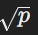).  
* max_depth: ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y.  
* min_samples_split: S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu c·∫ßn thi·∫øt ƒë·ªÉ chia m·ªôt node n·ªôi b·ªô.

**Quy tr√¨nh x√¢y d·ª±ng c√¢y ƒë∆°n l·∫ª:**

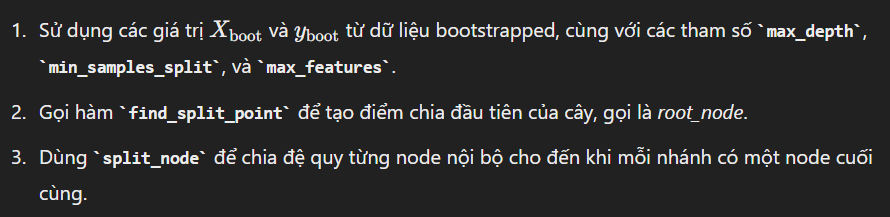

**X√¢y d·ª±ng r·ª´ng ng·∫´u nhi√™n:**

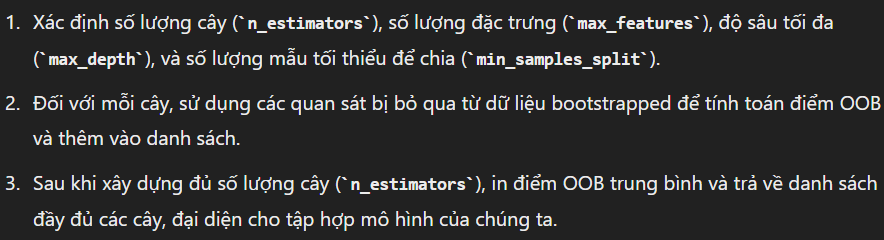

In [ ]:
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    # H√†m x√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh t·ª´ d·ªØ li·ªáu bootstrap
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node


def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    # H√†m x√¢y d·ª±ng r·ª´ng ng·∫´u nhi√™n t·ª´ d·ªØ li·ªáu hu·∫•n luy·ªán

    tree_ls = list()  # Danh s√°ch c√°c c√¢y trong r·ª´ng
    oob_ls = list()  # Danh s√°ch c√°c l·ªói OOB

    for i in range(n_estimators):
        # L·∫•y m·∫´u bootstrap v√† OOB
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)

        # X√¢y d·ª±ng c√¢y t·ª´ d·ªØ li·ªáu bootstrap
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, min_samples_split, max_depth)

        # Th√™m c√¢y v√†o danh s√°ch c√°c c√¢y
        tree_ls.append(tree)

        # T√≠nh to√°n l·ªói OOB cho c√¢y v√† th√™m v√†o danh s√°ch l·ªói OOB
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)

    # In ra ∆∞·ªõc t√≠nh l·ªói OOB trung b√¨nh
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))

    return tree_ls


###predict_tree & predict_forest

H√†m predict_tree s·∫Ω d·ª± ƒëo√°n l·ªõp c·ªßa m·ªôt vector ƒë·∫ßu v√†o
ùë•ùëñ
‚Éód·ª±a tr√™n m·ªôt c√¢y ƒë∆°n l·∫ª. V√¨ m·ªôt c√¢y ƒë∆°n l·∫ª ƒë∆∞·ª£c c·∫•u tr√∫c d∆∞·ªõi d·∫°ng c√°c t·ª´ ƒëi·ªÉn l·ªìng nhau, ƒë·∫°i di·ªán cho t·ª´ng node, ch√∫ng ta s·∫Ω cho
ùë•ùëñ
‚Éó ƒëi qua c√¢y b·∫±ng c√°ch li√™n t·ª•c ki·ªÉm tra xem ƒëi·ªÉm chia hi·ªán t·∫°i c√≥ ch·ª©a t·ª´ ƒëi·ªÉn kh√°c (node) hay kh√¥ng. Khi ch√∫ng ta ƒë·∫°t ƒë·∫øn left_split ho·∫∑c right_split kh√¥ng ch·ª©a t·ª´ ƒëi·ªÉn n√†o, ch√∫ng ta ƒë√£ ƒë·∫°t ƒë·∫øn node cu·ªëi c√πng v√† c√≥ th·ªÉ tr·∫£ v·ªÅ l·ªõp.

**H√†m predict_tree:**

* Duy·ªát qua c√¢y ƒë∆°n l·∫ª tree ƒë·ªÉ d·ª± ƒëo√°n l·ªõp cho vector ƒë·∫ßu v√†o x.
* B·∫Øt ƒë·∫ßu t·ª´ node g·ªëc, ki·ªÉm tra gi√° tr·ªã c·ªßa ƒë·∫∑c tr∆∞ng t·∫°i node hi·ªán t·∫°i v√† quy·∫øt ƒë·ªãnh ƒëi sang node tr√°i hay ph·∫£i.
* Khi ƒë·∫øn node cu·ªëi c√πng, tr·∫£ v·ªÅ l·ªõp d·ª± ƒëo√°n ƒë∆∞·ª£c l∆∞u trong `node['terminal']`.

In [ ]:
def predict_tree(tree, X_test):
    # H√†m d·ª± ƒëo√°n nh√£n c·ªßa m·ªôt m·∫´u d·ª±a tr√™n c√¢y quy·∫øt ƒë·ªãnh

    feature_idx = tree['feature_idx']  # L·∫•y ch·ªâ s·ªë ƒë·∫∑c tr∆∞ng d√πng ƒë·ªÉ chia

    # Ki·ªÉm tra gi√° tr·ªã c·ªßa ƒë·∫∑c tr∆∞ng t·∫°i m·∫´u X_test ƒë·ªÉ quy·∫øt ƒë·ªãnh ƒëi ti·∫øp ƒë·∫øn node con tr√°i ho·∫∑c ph·∫£i
    if X_test[feature_idx] <= tree['split_point']:
        # N·∫øu gi√° tr·ªã ƒë·∫∑c tr∆∞ng nh·ªè h∆°n ho·∫∑c b·∫±ng ƒëi·ªÉm chia, ti·∫øp t·ª•c xu·ªëng c√¢y con b√™n tr√°i
        if isinstance(tree['left_split'], dict):
            return predict_tree(tree['left_split'], X_test)  # ƒê·ªá quy xu·ªëng node con tr√°i
        else:
            return tree['left_split']  # N·∫øu node con tr√°i l√† node l√°, tr·∫£ v·ªÅ gi√° tr·ªã d·ª± ƒëo√°n
    else:
        # N·∫øu gi√° tr·ªã ƒë·∫∑c tr∆∞ng l·ªõn h∆°n ƒëi·ªÉm chia, ti·∫øp t·ª•c xu·ªëng c√¢y con b√™n ph·∫£i
        if isinstance(tree['right_split'], dict):
            return predict_tree(tree['right_split'], X_test)  # ƒê·ªá quy xu·ªëng node con ph·∫£i
        else:
            return tree['right_split']  # N·∫øu node con ph·∫£i l√† node l√°, tr·∫£ v·ªÅ gi√° tr·ªã d·ª± ƒëo√°n


**H√†m predict_forest:**

* D·ª± ƒëo√°n l·ªõp c·ªßa t·∫≠p d·ªØ li·ªáu ƒë·∫ßu v√†o X d·ª±a tr√™n r·ª´ng ng·∫´u nhi√™n forest.
* L·∫∑p qua t·ª´ng c√¢y trong r·ª´ng v√† d·ª± ƒëo√°n l·ªõp cho t·ª´ng m·∫´u trong X.
* T·ªïng h·ª£p c√°c d·ª± ƒëo√°n t·ª´ t·∫•t c·∫£ c√°c c√¢y cho t·ª´ng m·∫´u v√† ch·ªçn l·ªõp ph·ªï bi·∫øn nh·∫•t l√†m l·ªõp cu·ªëi c√πng.

In [ ]:
def predict_rf(tree_ls, X_test):
    # H√†m d·ª± ƒëo√°n nh√£n c·ªßa t·∫≠p m·∫´u d·ª±a tr√™n r·ª´ng ng·∫´u nhi√™n
    pred_ls = list()  # Danh s√°ch l∆∞u c√°c d·ª± ƒëo√°n cu·ªëi c√πng cho t·ª´ng m·∫´u trong X_test

    for i in range(len(X_test)):
        # D·ª± ƒëo√°n nh√£n c·ªßa m·∫´u X_test th·ª© i b·ªüi t·∫•t c·∫£ c√°c c√¢y trong r·ª´ng
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]

        # Ch·ªçn nh√£n c√≥ s·ªë l·∫ßn xu·∫•t hi·ªán nhi·ªÅu nh·∫•t (ƒëa s·ªë) l√†m nh√£n cu·ªëi c√πng
        final_pred = max(ensemble_preds, key=ensemble_preds.count)

        # Th√™m nh√£n cu·ªëi c√πng v√†o danh s√°ch k·∫øt qu·∫£
        pred_ls.append(final_pred)

    return np.array(pred_ls)  # Tr·∫£ v·ªÅ k·∫øt qu·∫£ d·ª± ƒëo√°n d∆∞·ªõi d·∫°ng numpy array


In [ ]:
'''
# S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng ng·∫´u nhi√™n
n_estimators = 150

# S·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c ch·ªçn t·∫°i m·ªói node
max_features = 'sqrt'

# ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa m·ªói c√¢y
max_depth = 15

# S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu c·∫ßn c√≥ ƒë·ªÉ t√°ch node
min_samples_split = 17

# X√¢y d·ª±ng m√¥ h√¨nh r·ª´ng ng·∫´u nhi√™n d·ª±a tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán
model = random_forest(X_RF_train, y_RF_train, n_estimators, max_features, max_depth, min_samples_split)

# D·ª± ƒëo√°n nh√£n cho t·∫≠p d·ªØ li·ªáu ki·ªÉm tra
preds = predict_rf(model, X_RF_test)

# T√≠nh to√°n ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra
acc = sum(preds == y_RF_test) / len(y_RF_test)
print("Testing accuracy: {:.3f}".format(acc))
'''

'\n# S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng ng·∫´u nhi√™n\nn_estimators = 150\n\n# S·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng t·ªëi ƒëa ƒë∆∞·ª£c ch·ªçn t·∫°i m·ªói node\nmax_features = \'sqrt\'\n\n# ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa m·ªói c√¢y\nmax_depth = 15\n\n# S·ªë l∆∞·ª£ng m·∫´u t·ªëi thi·ªÉu c·∫ßn c√≥ ƒë·ªÉ t√°ch node\nmin_samples_split = 17\n\n# X√¢y d·ª±ng m√¥ h√¨nh r·ª´ng ng·∫´u nhi√™n d·ª±a tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán\nmodel = random_forest(X_RF_train, y_RF_train, n_estimators, max_features, max_depth, min_samples_split)\n\n# D·ª± ƒëo√°n nh√£n cho t·∫≠p d·ªØ li·ªáu ki·ªÉm tra\npreds = predict_rf(model, X_RF_test)\n\n# T√≠nh to√°n ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra\nacc = sum(preds == y_RF_test) / len(y_RF_test)\nprint("Testing accuracy: {:.3f}".format(acc))\n'

##Performance

 **L√Ω do ch·ªçn c√°c metrics MAE, MSE:**

* **Mean Absolute Error (MAE):**
  * MAE ƒëo l∆∞·ªùng gi√° tr·ªã trung b√¨nh c·ªßa c√°c sai s·ªë tuy·ªát ƒë·ªëi gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n. MAE cho bi·∫øt sai s·ªë d·ª± ƒëo√°n trung b√¨nh c·ªßa m√¥ h√¨nh m√† kh√¥ng quan t√¢m ƒë·∫øn h∆∞·ªõng c·ªßa sai s·ªë.
  * MAE d·ªÖ hi·ªÉu v√† tr·ª±c quan, gi√∫p d·ªÖ d√†ng di·ªÖn gi·∫£i v√† so s√°nh m·ª©c ƒë·ªô sai s·ªë gi·ªØa c√°c m√¥ h√¨nh kh√°c nhau.

* **Mean Squared Error (MSE):**
  * MSE ƒëo l∆∞·ªùng gi√° tr·ªã trung b√¨nh c·ªßa b√¨nh ph∆∞∆°ng c√°c sai s·ªë gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† gi√° tr·ªã d·ª± ƒëo√°n. MSE nh·∫•n m·∫°nh c√°c sai s·ªë l·ªõn h∆°n do vi·ªác b√¨nh ph∆∞∆°ng sai s·ªë.
  * MSE h·ªØu √≠ch trong vi·ªác ƒë√°nh gi√° m√¥ h√¨nh khi mu·ªën t·∫≠p trung v√†o vi·ªác gi·∫£m thi·ªÉu c√°c sai s·ªë l·ªõn v√† khi vi·ªác c√≥ c√°c d·ª± ƒëo√°n l·ªõn h∆°n c·∫ßn ƒë∆∞·ª£c ƒë·∫∑c bi·ªát quan t√¢m.


**L√Ω do kh√¥ng n√™n ƒë∆∞a R¬≤ v√†o ƒë·ªÉ so s√°nh:**

* **Kh√¥ng ph√π h·ª£p v·ªõi d·ªØ li·ªáu phi tuy·∫øn t√≠nh ho·∫∑c ph·ª©c t·∫°p**:
  * V·ªõi c√°c m√¥ h√¨nh phi tuy·∫øn t√≠nh ho·∫∑c ph·ª©c t·∫°p nh∆∞ XGBoost v√† Random Forest, R¬≤ c√≥ th·ªÉ kh√¥ng ph·∫£n √°nh ƒë√∫ng kh·∫£ nƒÉng d·ª± b√°o c·ªßa m√¥ h√¨nh v√¨ n√≥ ch·ªß y·∫øu ph√π h·ª£p v·ªõi c√°c m√¥ h√¨nh tuy·∫øn t√≠nh.
  * Khi d·ªØ li·ªáu kh√¥ng tuy·∫øn t√≠nh, R¬≤ c√≥ th·ªÉ ƒë∆∞a ra nh·ªØng k·∫øt qu·∫£ kh√¥ng ch√≠nh x√°c ho·∫∑c g√¢y hi·ªÉu l·∫ßm.

**Nh√≥m s·∫Ω kh√¥ng ƒë∆∞a Lasso v√† Ridge v√†o ph·∫ßn performance b·ªüi v√¨ original Linear Regression trong tr∆∞·ªùng h·ª£p n√†y ƒë√£ c√≥ hi·ªáu su·∫•t t∆∞∆°ng ƒë∆∞∆°ng v·ªõi Lasso v√† Ridge, do c√°c bi·∫øn ƒë·∫ßu v√†o c√≥ t∆∞∆°ng quan th·∫•p v·ªõi nhau v√† tr·ªçng s·ªë m√¥ h√¨nh kh√¥ng b·ªã qu√° ph·ª©c t·∫°p.**

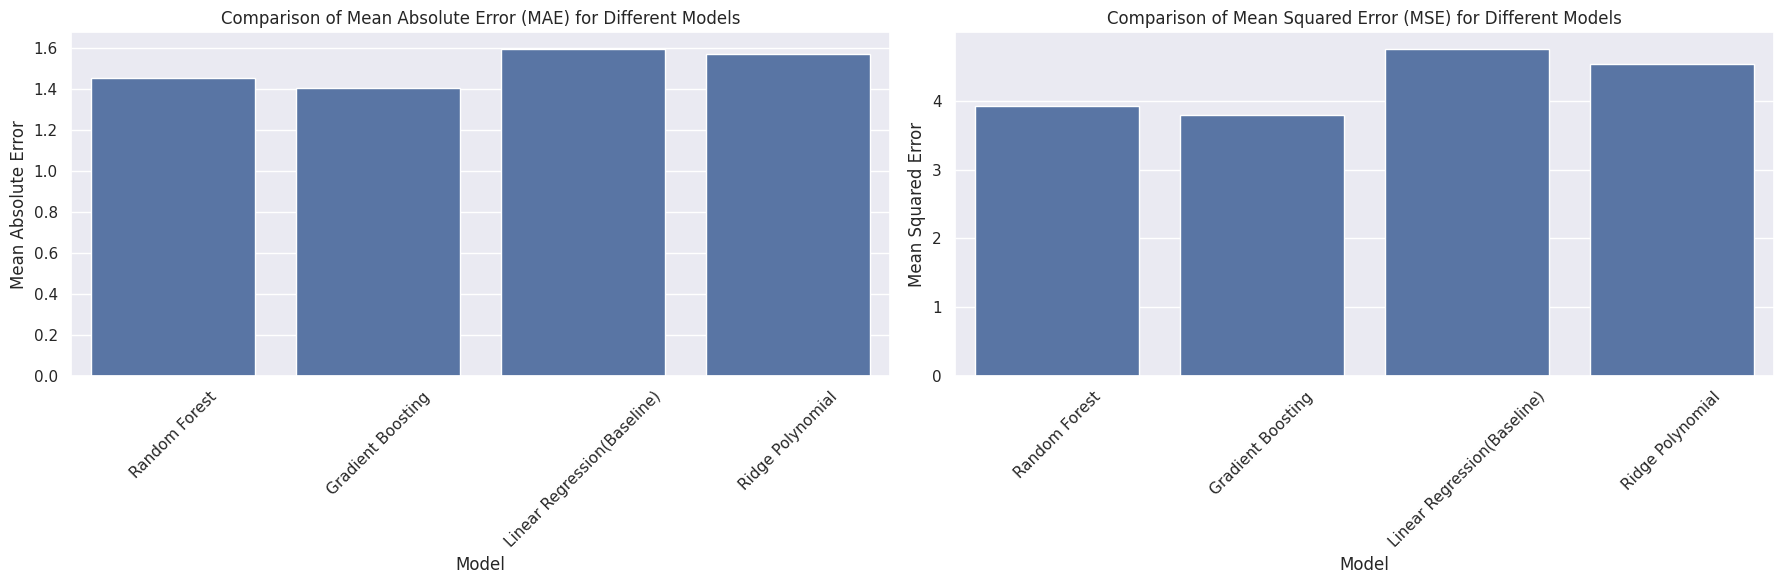

In [ ]:
# Gi√° tr·ªã MAE c·ªßa c√°c m√¥ h√¨nh
mae_values = {
    'Random Forest': MAE_RF,
    'Gradient Boosting': mae_GB_test,
    'Linear Regression(Baseline)': mae_LNR,
    'Ridge Polynomial': mae_Ridge_poly
}

# Gi√° tr·ªã MSE c·ªßa c√°c m√¥ h√¨nh
mse_values = {
    'Random Forest': MSE_RF,
    'Gradient Boosting': mse_GB_test,
    'Linear Regression(Baseline)': mse_LNR,
    'Ridge Polynomial': mse_Ridge_poly
}

# Chuy·ªÉn ƒë·ªïi t·ª´ t·ª´ ƒëi·ªÉn sang DataFrame ƒë·ªÉ d·ªÖ v·∫Ω bi·ªÉu ƒë·ªì
mae_df = pd.DataFrame(list(mae_values.items()), columns=['Model', 'MAE'])
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'MSE'])

# T·∫°o subplot v·ªõi 2 bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# V·∫Ω bi·ªÉu ƒë·ªì MAE
sns.barplot(ax=axes[0], x='Model', y='MAE', data=mae_df)
axes[0].set_title('Comparison of Mean Absolute Error (MAE) for Different Models')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].set_xlabel('Model')
axes[0].tick_params(axis='x', rotation=45)

# V·∫Ω bi·ªÉu ƒë·ªì MSE
sns.barplot(ax=axes[1], x='Model', y='MSE', data=mse_df)
axes[1].set_title('Comparison of Mean Squared Error (MSE) for Different Models')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()



In [ ]:
mae_df

Model       MAE
0                Random Forest  1.452257
1            Gradient Boosting  1.403605
2  Linear Regression(Baseline)  1.595629
3             Ridge Polynomial  1.568201

In [ ]:
mse_df

Model       MSE
0                Random Forest  3.929715
1            Gradient Boosting  3.794622
2  Linear Regression(Baseline)  4.757181
3             Ridge Polynomial  4.531281

## Model - evaluation

### **1. Gradient Boosting**

- **MAE:** 1.403605
- **MSE:** 3.794622

**Nh·∫≠n ƒë·ªãnh:**
- Gradient Boosting c√≥ MAE v√† MSE th·∫•p nh·∫•t trong s·ªë c√°c m√¥ h√¨nh ƒë√£ so s√°nh, cho th·∫•y ƒë√¢y l√† m√¥ h√¨nh t·ªët nh·∫•t cho t·∫≠p d·ªØ li·ªáu n√†y.
- MAE v√† MSE th·∫•p ch·ª©ng t·ªè r·∫±ng m√¥ h√¨nh n√†y kh√¥ng ch·ªâ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n m√† c√≤n c√≥ √≠t sai s·ªë l·ªõn trong d·ª± ƒëo√°n.



### **2. Random Forest**

- **MAE:** 1.444086
- **MSE:** 3.901233

**Nh·∫≠n ƒë·ªãnh:**
- Random Forest c√≥ MAE v√† MSE cao h∆°n so v·ªõi Gradient Boosting nh∆∞ng v·∫´n t·ªët h∆°n so v·ªõi c√°c m√¥ h√¨nh c√≤n l·∫°i.
- Random Forest l√† m√¥ h√¨nh th·ª© hai t·ªët nh·∫•t trong s·ªë c√°c m√¥ h√¨nh ƒë√£ th·ª≠ nghi·ªám, v√† c√≥ hi·ªáu su·∫•t g·∫ßn v·ªõi Gradient Boosting.



### **3. Linear Regression (Baseline)**

- **MAE:** 1.595629
- **MSE:** 4.757181

**Nh·∫≠n ƒë·ªãnh:**
- Linear Regression c√≥ MAE v√† MSE cao nh·∫•t, cho th·∫•y m√¥ h√¨nh n√†y c√≥ hi·ªáu su·∫•t k√©m nh·∫•t.
- K·∫øt qu·∫£ n√†y c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng l√†m baseline ƒë·ªÉ so s√°nh v·ªõi c√°c m√¥ h√¨nh ph·ª©c t·∫°p h∆°n.
- Hi·ªáu su·∫•t k√©m c√≥ th·ªÉ do Linear Regression kh√¥ng th·ªÉ b·∫Øt k·ªãp c√°c m·∫´u ph·ª©c t·∫°p trong d·ªØ li·ªáu.



### **4. Ridge Polynomial Regression**

- **MAE:** 1.568201
- **MSE:** 4.531281

**Nh·∫≠n ƒë·ªãnh:**
- Ridge Polynomial Regression c√≥ MAE v√† MSE th·∫•p h∆°n Linear Regression, nh∆∞ng v·∫´n cao h∆°n so v·ªõi Random Forest v√† Gradient Boosting.
- Vi·ªác √°p d·ª•ng Ridge Polynomial gi√∫p c·∫£i thi·ªán hi·ªáu su·∫•t so v·ªõi Linear Regression nh∆∞ng kh√¥ng th·ªÉ v∆∞·ª£t qua c√°c m√¥ h√¨nh phi tuy·∫øn t√≠nh ph·ª©c t·∫°p h∆°n nh∆∞ Random Forest v√† Gradient Boosting.
- ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng vi·ªác th√™m ƒëa th·ª©c v√†o m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh c√≥ th·ªÉ gi√∫p c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c, nh∆∞ng kh√¥ng nhi·ªÅu nh∆∞ c√°c m√¥ h√¨nh phi tuy·∫øn t√≠nh ph·ª©c t·∫°p h∆°n.



### **5. T·ªïng quan**

- **Gradient Boosting**: Hi·ªáu su·∫•t t·ªët nh·∫•t, n√™n ƒë∆∞·ª£c s·ª≠ d·ª•ng cho c√°c d·ª± ƒëo√°n ch√≠nh x√°c nh·∫•t.
- **Random Forest**: C≈©ng r·∫•t hi·ªáu qu·∫£ v√† c√≥ th·ªÉ l√† l·ª±a ch·ªçn t·ªët n·∫øu mu·ªën m·ªôt m√¥ h√¨nh d·ªÖ gi·∫£i th√≠ch h∆°n so v·ªõi Gradient Boosting.
- **Linear Regression**: Hi·ªáu su·∫•t k√©m nh·∫•t, ch·ªâ n√™n d√πng l√†m baseline.
- **Ridge Polynomial Regression**: C·∫£i thi·ªán h∆°n so v·ªõi Linear Regression, nh∆∞ng kh√¥ng t·ªët b·∫±ng Random Forest v√† Gradient Boosting.<br>


### **6. M√¥ h√¨nh m·∫°nh nh·∫•t:**

=> **Gradient Boosting l√† m√¥ h√¨nh t·ªët nh·∫•t cho t·∫≠p d·ªØ li·ªáu n√†y, trong khi Random Forest c≈©ng l√† m·ªôt l·ª±a ch·ªçn kh·∫£ thi v·ªõi hi·ªáu su·∫•t g·∫ßn t∆∞∆°ng ƒë∆∞∆°ng. C√°c m√¥ h√¨nh tuy·∫øn t√≠nh nh∆∞ Linear Regression v√† Ridge Polynomial Regression c√≥ hi·ªáu su·∫•t k√©m h∆°n ƒë√°ng k·ªÉ.**

In [ ]:
import joblib
joblib.dump(best_model, 'best_gb_model.pkl')

['best_gb_model.pkl']

**ƒêo·∫°n m√£ tr√™n ƒë∆∞·ª£c d√πng ƒë·ªÉ l∆∞u l·∫°i m√¥ h√¨nh t·ªët nh·∫•t v·ªõi c√°c th√¥ng s·ªë ƒë√£ ƒë∆∞·ª£c tuning ƒë·ªÉ c√≥ th·ªÉ tri·ªÉn khai l√™n ·ª©ng d·ª•ng**

# **Final Report**

## 1. ƒê·∫∑t v·∫•n ƒë·ªÅ



### 1.1 Gi·ªõi thi·ªáu
Trong b·ªëi c·∫£nh th·ªã tr∆∞·ªùng b·∫•t ƒë·ªông s·∫£n ng√†y c√†ng ph√°t tri·ªÉn, vi·ªác d·ª± ƒëo√°n gi√° nh√† tr·ªü th√†nh m·ªôt y·∫øu t·ªë quan tr·ªçng kh√¥ng ch·ªâ ƒë·ªëi v·ªõi c√°c nh√† ƒë·∫ßu t∆∞ m√† c√≤n v·ªõi ng∆∞·ªùi mua v√† b√°n nh√†. Gi√° nh√† b·ªã ·∫£nh h∆∞·ªüng b·ªüi nhi·ªÅu y·∫øu t·ªë nh∆∞ v·ªã tr√≠ ƒë·ªãa l√Ω, di·ªán t√≠ch, s·ªë ph√≤ng, ti·ªán √≠ch xung quanh, v√† nhi·ªÅu y·∫øu t·ªë kh√°c. D·ª± ƒëo√°n ch√≠nh x√°c gi√° nh√† c√≥ th·ªÉ gi√∫p c√°c b√™n li√™n quan ƒë∆∞a ra c√°c quy·∫øt ƒë·ªãnh t√†i ch√≠nh h·ª£p l√Ω, gi·∫£m thi·ªÉu r·ªßi ro v√† t·ªëi ∆∞u h√≥a l·ª£i nhu·∫≠n. V√¨ v·∫≠y, nh√≥m ch√∫ng t√¥i ƒë√£ ch·ªçn d·ª± √°n "D·ª± ƒëo√°n gi√° nh√†" v·ªõi m·ª•c ti√™u x√¢y d·ª±ng m·ªôt m√¥ h√¨nh d·ª± ƒëo√°n gi√° nh√† d·ª±a tr√™n c√°c y·∫øu t·ªë li√™n quan.



### 1.2 L√Ω do ch·ªçn ƒë·ªÅ t√†i
- **T√≠nh th·ª±c ti·ªÖn:** Gi√° nh√† l√† m·ªôt trong nh·ªØng th√¥ng tin quan tr·ªçng nh·∫•t trong th·ªã tr∆∞·ªùng b·∫•t ƒë·ªông s·∫£n. Vi·ªác d·ª± ƒëo√°n ch√≠nh x√°c gi√° nh√† c√≥ th·ªÉ gi√∫p ng∆∞·ªùi mua, ng∆∞·ªùi b√°n v√† c√°c nh√† ƒë·∫ßu t∆∞ ƒë∆∞a ra quy·∫øt ƒë·ªãnh ch√≠nh x√°c h∆°n.
- **·ª®ng d·ª•ng c·ªßa c√¥ng ngh·ªá:** S·ª± ph√°t tri·ªÉn c·ªßa tr√≠ tu·ªá nh√¢n t·∫°o v√† h·ªçc m√°y cho ph√©p ch√∫ng ta x√¢y d·ª±ng c√°c m√¥ h√¨nh d·ª± ƒëo√°n ch√≠nh x√°c v√† hi·ªáu qu·∫£ h∆°n. ƒê√¢y l√† c∆° h·ªôi ƒë·ªÉ ·ª©ng d·ª•ng c√°c c√¥ng ngh·ªá m·ªõi v√†o gi·∫£i quy·∫øt c√°c v·∫•n ƒë·ªÅ th·ª±c ti·ªÖn.
- **Nhu c·∫ßu c·ªßa th·ªã tr∆∞·ªùng:** Th·ªã tr∆∞·ªùng b·∫•t ƒë·ªông s·∫£n lu√¥n c√≥ nhu c·∫ßu cao v·ªÅ c√°c c√¥ng c·ª• h·ªó tr·ª£ quy·∫øt ƒë·ªãnh gi√° c·∫£. M·ªôt m√¥ h√¨nh d·ª± ƒëo√°n gi√° nh√† ch√≠nh x√°c s·∫Ω c√≥ gi√° tr·ªã l·ªõn ƒë·ªëi v·ªõi c·∫£ ng∆∞·ªùi d√πng c√° nh√¢n v√† doanh nghi·ªáp.
- **K·ªπ nƒÉng v√† ki·∫øn th·ª©c:** D·ª± √°n n√†y cung c·∫•p c∆° h·ªôi ƒë·ªÉ nh√≥m ch√∫ng t√¥i √°p d·ª•ng v√† n√¢ng cao c√°c k·ªπ nƒÉng v·ªÅ ph√¢n t√≠ch d·ªØ li·ªáu, l·∫≠p tr√¨nh v√† h·ªçc m√°y, c≈©ng nh∆∞ ki·∫øn th·ª©c v·ªÅ th·ªã tr∆∞·ªùng b·∫•t ƒë·ªông s·∫£n.



## 2. Tri·ªÉn khai





### 2.1 Data Collection


#### 2.1.1 C√°c m√¥ h√¨nh LLM ƒë∆∞·ª£c anyscale h·ªó tr·ª£.
1. **codellama/CodeLlama-70b-Instruct-hf:**
   - **M√¥ t·∫£:** CodeLlama l√† m·ªôt m√¥ h√¨nh ng√¥n ng·ªØ l·ªõn ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ x·ª≠ l√Ω v√† t·∫°o m√£ ngu·ªìn. Phi√™n b·∫£n n√†y c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω c√°c t√°c v·ª• li√™n quan ƒë·∫øn m√£ l·∫≠p tr√¨nh v·ªõi ƒë·ªô ch√≠nh x√°c cao.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 70 t·ª∑.
     - ƒê∆∞·ª£c t·ªëi ∆∞u h√≥a ƒë·ªÉ t·∫°o m√£ v√† hi·ªÉu c√°c ng√¥n ng·ªØ l·∫≠p tr√¨nh kh√°c nhau.
     - H·ªó tr·ª£ nhi·ªÅu ng√¥n ng·ªØ l·∫≠p tr√¨nh ph·ªï bi·∫øn nh∆∞ Python, JavaScript, C++, v.v.

2. **google/gemma-7b-it:**
   - **M√¥ t·∫£:** Gemma l√† m·ªôt m√¥ h√¨nh ng√¥n ng·ªØ l·ªõn ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a cho c√°c t√°c v·ª• ng√¥n ng·ªØ ti·∫øng √ù.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 7 t·ª∑.
     - ƒê∆∞·ª£c hu·∫•n luy·ªán tr√™n m·ªôt t·∫≠p d·ªØ li·ªáu l·ªõn g·ªìm c√°c vƒÉn b·∫£n ti·∫øng √ù, cung c·∫•p kh·∫£ nƒÉng hi·ªÉu v√† t·∫°o ng√¥n ng·ªØ t·ª± nhi√™n ti·∫øng √ù ch√≠nh x√°c.

3. **llava-hf/llava-v1.6-mistral-7b-hf:**
   - **M√¥ t·∫£:** LLaVA l√† m·ªôt m√¥ h√¨nh ng√¥n ng·ªØ l·ªõn k·∫øt h·ª£p v·ªõi kh·∫£ nƒÉng x·ª≠ l√Ω h√¨nh ·∫£nh, cho ph√©p th·ª±c hi·ªán c√°c t√°c v·ª• nh∆∞ m√¥ t·∫£ h√¨nh ·∫£nh v√† hi·ªÉu ng·ªØ c·∫£nh t·ª´ h√¨nh ·∫£nh.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 7 t·ª∑.
     - ƒê∆∞·ª£c hu·∫•n luy·ªán ƒë·ªÉ k·∫øt h·ª£p th√¥ng tin t·ª´ vƒÉn b·∫£n v√† h√¨nh ·∫£nh, cung c·∫•p kh·∫£ nƒÉng hi·ªÉu ng·ªØ c·∫£nh ƒëa ph∆∞∆°ng ti·ªán.

4. **meta-llama/Meta-Llama-3-70B-Instruct:**
   - **M√¥ t·∫£:** ƒê√¢y l√† phi√™n b·∫£n l·ªõn nh·∫•t v√† ti√™n ti·∫øn nh·∫•t c·ªßa d√≤ng Meta-Llama-3, ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ l√†m theo c√°c h∆∞·ªõng d·∫´n c·ª• th·ªÉ v·ªõi ƒë·ªô ch√≠nh x√°c cao.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 70 t·ª∑.
     - ƒê∆∞·ª£c tinh ch·ªânh ƒë·ªÉ th·ª±c hi·ªán c√°c nhi·ªám v·ª• theo y√™u c·∫ßu v·ªõi hi·ªáu su·∫•t cao, ph√π h·ª£p cho c√°c ·ª©ng d·ª•ng ph·ª©c t·∫°p ƒë√≤i h·ªèi s·ª± ch√≠nh x√°c v√† linh ho·∫°t.

5. **meta-llama/Meta-Llama-3-8B-Instruct:**
   - **M√¥ t·∫£:** M√¥ h√¨nh n√†y ƒë∆∞·ª£c tinh ch·ªânh ƒë·ªÉ l√†m theo c√°c h∆∞·ªõng d·∫´n c·ª• th·ªÉ, ph√π h·ª£p cho c√°c t√°c v·ª• y√™u c·∫ßu th·ª±c hi·ªán c√°c nhi·ªám v·ª• theo y√™u c·∫ßu.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 8 t·ª∑.
     - Cung c·∫•p kh·∫£ nƒÉng th·ª±c hi·ªán c√°c nhi·ªám v·ª• theo h∆∞·ªõng d·∫´n v·ªõi ƒë·ªô ch√≠nh x√°c cao, th√≠ch h·ª£p cho nhi·ªÅu ·ª©ng d·ª•ng kh√°c nhau.

6. **mistralai/Mistral-7B-Instruct-v0.1:**
   - **M√¥ t·∫£:** M√¥ h√¨nh n√†y ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a cho c√°c t√°c v·ª• h∆∞·ªõng d·∫´n, gi√∫p th·ª±c hi·ªán c√°c nhi·ªám v·ª• theo y√™u c·∫ßu c·ª• th·ªÉ.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 7 t·ª∑.
     - ƒê∆∞·ª£c tinh ch·ªânh ƒë·ªÉ cung c·∫•p hi·ªáu su·∫•t cao trong vi·ªác th·ª±c hi·ªán c√°c nhi·ªám v·ª• d·ª±a tr√™n h∆∞·ªõng d·∫´n.

7. **mistralai/Mixtral-8x22B-Instruct-v0.1:**
   - **M√¥ t·∫£:** ƒê√¢y l√† m·ªôt m√¥ h√¨nh r·∫•t l·ªõn, ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ k·∫øt h·ª£p nhi·ªÅu m√¥ h√¨nh nh·ªè h∆°n (8x22B), nh·∫±m t·ªëi ∆∞u h√≥a kh·∫£ nƒÉng x·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n v·ªõi ƒë·ªô ch√≠nh x√°c cao.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 176 t·ª∑ (8 m√¥ h√¨nh m·ªói m√¥ h√¨nh 22 t·ª∑ tham s·ªë).
     - Cung c·∫•p kh·∫£ nƒÉng x·ª≠ l√Ω c√°c nhi·ªám v·ª• ph·ª©c t·∫°p v·ªõi hi·ªáu su·∫•t cao.

8. **mistralai/Mixtral-8x7B-Instruct-v0.1:**
   - **M√¥ t·∫£:** T∆∞∆°ng t·ª± nh∆∞ m√¥ h√¨nh tr√™n, nh∆∞ng c√≥ k√≠ch th∆∞·ªõc nh·ªè h∆°n, ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ k·∫øt h·ª£p nhi·ªÅu m√¥ h√¨nh 7B.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 56 t·ª∑ (8 m√¥ h√¨nh m·ªói m√¥ h√¨nh 7 t·ª∑ tham s·ªë).
     - T·ªëi ∆∞u cho c√°c nhi·ªám v·ª• x·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n y√™u c·∫ßu ƒë·ªô ch√≠nh x√°c v√† kh·∫£ nƒÉng x·ª≠ l√Ω cao.

9. **mlabonne/NeuralHermes-2.5-Mistral-7B:**
   - **M√¥ t·∫£:** NeuralHermes l√† m·ªôt m√¥ h√¨nh ng√¥n ng·ªØ l·ªõn, t·ªëi ∆∞u cho c√°c t√°c v·ª• li√™n quan ƒë·∫øn giao ti·∫øp v√† ph√¢n t√≠ch vƒÉn b·∫£n.
   - **ƒê·∫∑c ƒëi·ªÉm:**
     - S·ªë l∆∞·ª£ng tham s·ªë: 7 t·ª∑.
     - Cung c·∫•p kh·∫£ nƒÉng ph√¢n t√≠ch v√† hi·ªÉu ng√¥n ng·ªØ t·ª± nhi√™n, th√≠ch h·ª£p cho c√°c ·ª©ng d·ª•ng ph√¢n t√≠ch vƒÉn b·∫£n v√† giao ti·∫øp.



#### 2.1.2 LLM ƒë∆∞·ª£c s·ª≠ d·ª•ng: Meta-llma/Meta-Llama-3-70B-Instruct.

**ƒê·∫∂C ƒêI·ªÇM M√î H√åNH**

- **Kh·∫£ nƒÉng hi·ªÉu ng·ªØ c·∫£nh v√† x·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n:**
  - N·∫øu b√†i to√°n d·ª± ƒëo√°n gi√° nh√† y√™u c·∫ßu x·ª≠ l√Ω v√† ph√¢n t√≠ch c√°c m√¥ t·∫£ b·∫±ng vƒÉn b·∫£n, b√¨nh lu·∫≠n, ƒë√°nh gi√° ho·∫∑c d·ªØ li·ªáu phi c·∫•u tr√∫c kh√°c, Meta-LLaMA-3-70B-Instruct c√≥ th·ªÉ r·∫•t h·ªØu √≠ch. V√≠ d·ª•, m√¥ h√¨nh c√≥ th·ªÉ tr√≠ch xu·∫•t th√¥ng tin quan tr·ªçng t·ª´ m√¥ t·∫£ c·ªßa c√°c ng√¥i nh√† ho·∫∑c ƒë√°nh gi√° c·ªßa ng∆∞·ªùi d√πng.

- **Kh·∫£ nƒÉng t√πy ch·ªânh v√† l√†m theo h∆∞·ªõng d·∫´n c·ª• th·ªÉ:**
  - M√¥ h√¨nh Instruct ƒë∆∞·ª£c hu·∫•n luy·ªán ƒë·ªÉ th·ª±c hi·ªán c√°c t√°c v·ª• theo h∆∞·ªõng d·∫´n c·ª• th·ªÉ, gi√∫p d·ªÖ d√†ng ƒëi·ªÅu ch·ªânh ƒë·ªÉ th·ª±c hi·ªán c√°c nhi·ªám v·ª• ph√¢n t√≠ch d·ªØ li·ªáu ph·ª©c t·∫°p theo y√™u c·∫ßu.

- **Hi·ªáu su·∫•t m·∫°nh m·∫Ω tr√™n nhi·ªÅu nhi·ªám v·ª• kh√°c nhau:**
  - Meta-LLaMA-3-70B-Instruct c√≥ kh·∫£ nƒÉng h·ªçc v√† t·ªïng qu√°t h√≥a t·ªët tr√™n nhi·ªÅu lo·∫°i nhi·ªám v·ª• kh√°c nhau, c√≥ th·ªÉ mang l·∫°i l·ª£i √≠ch n·∫øu b√†i to√°n d·ª± ƒëo√°n gi√° nh√† c·∫ßn t√≠ch h·ª£p v·ªõi nhi·ªÅu ngu·ªìn d·ªØ li·ªáu kh√°c nhau.

**T√çNH PH√ô H·ª¢P**

- **K·∫øt h·ª£p v·ªõi m√¥ h√¨nh truy·ªÅn th·ªëng:**
  - S·ª≠ d·ª•ng Meta-LLaMA-3-70B-Instruct ƒë·ªÉ x·ª≠ l√Ω v√† tr√≠ch xu·∫•t th√¥ng tin t·ª´ c√°c d·ªØ li·ªáu phi c·∫•u tr√∫c nh∆∞ m√¥ t·∫£ b·∫•t ƒë·ªông s·∫£n, b√¨nh lu·∫≠n c·ªßa ng∆∞·ªùi d√πng, tin t·ª©c v·ªÅ th·ªã tr∆∞·ªùng nh√† ƒë·∫•t, sau ƒë√≥ s·ª≠ d·ª•ng c√°c th√¥ng tin n√†y l√†m ƒë·∫ßu v√†o cho c√°c m√¥ h√¨nh truy·ªÅn th·ªëng nh∆∞ Gradient Boosting ho·∫∑c Random Forest.

- **Feature Engineering:**
  - D√πng Meta-LLaMA-3-70B-Instruct ƒë·ªÉ t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi t·ª´ vƒÉn b·∫£n, ch·∫≥ng h·∫°n nh∆∞ ƒë√°nh gi√° m·ª©c ƒë·ªô ti·ªán √≠ch c·ªßa khu v·ª±c d·ª±a tr√™n m√¥ t·∫£, ph√¢n lo·∫°i ch·∫•t l∆∞·ª£ng nh√† d·ª±a tr√™n c√°c ti√™u ch√≠ ƒë∆∞·ª£c m√¥ t·∫£ trong d·ªØ li·ªáu.

- **Ph√¢n t√≠ch v√† hi·ªÉu bi·∫øt th·ªã tr∆∞·ªùng:**
  - M√¥ h√¨nh c√≥ th·ªÉ ph√¢n t√≠ch d·ªØ li·ªáu l·ªãch s·ª≠ v√† hi·ªán t·∫°i t·ª´ nhi·ªÅu ngu·ªìn ƒë·ªÉ t·∫°o ra b√°o c√°o v√† d·ª± ƒëo√°n v·ªÅ xu h∆∞·ªõng th·ªã tr∆∞·ªùng nh√† ƒë·∫•t, gi√∫p c·∫£i thi·ªán ch·∫•t l∆∞·ª£ng d·ª± ƒëo√°n gi√° nh√†.

**Nh·∫≠n x√©t:**

- Trong qu√° tr√¨nh l·ª±a ch·ªçn m√¥ h√¨nh ph√π h·ª£p nh·∫•t cho nhi·ªám v·ª• c·ª• th·ªÉ, c·∫ßn c√¢n nh·∫Øc gi·ªØa hi·ªáu su·∫•t t·ªïng th·ªÉ v√† kh·∫£ nƒÉng th·ª±c hi·ªán nhi·ªám v·ª• theo h∆∞·ªõng d·∫´n c·ª• th·ªÉ.

- **mistralai/Mixtral-8x22B-Instruct-v0.1** l√† m√¥ h√¨nh c√≥ quy m√¥ l·ªõn nh·∫•t v·ªõi 176 t·ª∑ tham s·ªë, mang l·∫°i hi·ªáu su·∫•t cao nh·∫•t cho c√°c t√°c v·ª• ph·ª©c t·∫°p. Tuy nhi√™n, s·ª©c m·∫°nh v√† ƒë·ªô ch√≠nh x√°c cao c·ªßa m√¥ h√¨nh n√†y ƒëi k√®m v·ªõi h·∫°n ch·∫ø trong vi·ªác t·ªëi ∆∞u h√≥a cho c√°c nhi·ªám v·ª• theo h∆∞·ªõng d·∫´n c·ª• th·ªÉ. ƒêi·ªÅu n√†y c√≥ th·ªÉ d·∫´n ƒë·∫øn vi·ªác ƒë·∫ßu ra kh√¥ng ƒë√∫ng ƒë·ªãnh d·∫°ng mong mu·ªën, g√¢y kh√≥ khƒÉn trong vi·ªác x·ª≠ l√Ω d·ªØ li·ªáu ƒë·∫ßu ra t·ª´ c√°c m√¥ h√¨nh LLM.

- Ng∆∞·ª£c l·∫°i, **Meta-Llama-3-70B-Instruct** v·ªõi 70 t·ª∑ tham s·ªë ƒë√£ ƒë∆∞·ª£c tinh ch·ªânh ƒë·ªÉ l√†m theo c√°c h∆∞·ªõng d·∫´n c·ª• th·ªÉ v·ªõi ƒë·ªô ch√≠nh x√°c cao. M·∫∑c d√π quy m√¥ nh·ªè h∆°n so v·ªõi Mixtral-8x22B, m√¥ h√¨nh n√†y l·∫°i ph√π h·ª£p h∆°n cho c√°c ·ª©ng d·ª•ng y√™u c·∫ßu s·ª± ch√≠nh x√°c v√† linh ho·∫°t trong vi·ªác th·ª±c hi·ªán c√°c nhi·ªám v·ª• theo h∆∞·ªõng d·∫´n. ƒêi·ªÅu n√†y ƒë·∫∑c bi·ªát quan tr·ªçng trong c√°c t√°c v·ª• tr√≠ch xu·∫•t th√™m c√°c t√≠nh nƒÉng t·ª´ d·ªØ li·ªáu th√¥, n∆°i m√† ƒë·ªô ch√≠nh x√°c v√† tu√¢n th·ªß ƒë·ªãnh d·∫°ng l√† y·∫øu t·ªë ∆∞u ti√™n.

Do ƒë√≥, nh√≥m quy·∫øt ƒë·ªãnh ch·ªçn **Meta-Llama-3-70B-Instruct** ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng c√°c nhi·ªám v·ª• theo h∆∞·ªõng d·∫´n ƒë∆∞·ª£c th·ª±c hi·ªán m·ªôt c√°ch ch√≠nh x√°c v√† hi·ªáu qu·∫£ nh·∫•t, ƒë·ªìng th·ªùi gi·∫£m thi·ªÉu r·ªßi ro l·ªói ƒë·ªãnh d·∫°ng ƒë·∫ßu ra so v·ªõi vi·ªác s·ª≠ d·ª•ng c√°c m√¥ h√¨nh c√≥ quy m√¥ l·ªõn h∆°n nh∆∞ng kh√¥ng ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a cho nhi·ªám v·ª• n√†y.




####2.1.3 C√¥ng c·ª• s·ª≠ d·ª•ng ƒë·ªÉ l·∫•y d·ªØ li·ªáu: Selenium
- Selenium ƒë∆∞·ª£c nh√≥m l·ª±a ch·ªçn v√¨ n√≥ mang t√≠nh linh ƒë·ªông cao, c√≥ th·ªÉ l·∫•y ƒë∆∞·ª£c d·ªØ li·ªáu t·ª´ c√°c trang web ph·ª©c t·∫°p kh√°c nhau, m·∫∑c d√π trang web ch·ª©a ngu·ªìn data l√† 1 trang web tƒ©nh n√™n vi·ªác s·ª≠ d·ª•ng Selenium c√≥ th·ªÉ kh√¥ng ph·∫£i l√† t·ªëi ∆∞u nh·∫•t trong tr∆∞·ªùng h·ª£p n√†y. Nh∆∞ng v√¨ c√≥ th·ªÉ s·ª≠ d·ª•ng cho nhi·ªÅu m·ª•c ƒë√≠ch kh√°c nhau trong project n√™n nh√≥m v·∫´n quy·∫øt ƒë·ªãnh d√πng Selenium l√†m c√¥ng c·ª• ch√≠nh ƒë·ªÉ l·∫•y data.

- C·ª• th·ªÉ: Selenium ƒë√£ ƒë∆∞·ª£c d√πng l·∫°i 1 l·∫ßn n·ªØa ƒë·ªÉ build 1 tool geocode cho c√°c bi·∫øn "Address","city/province" v√† "district" do h·∫°n ch·∫ø c·ªßa API v√† hi·ªáu su·∫•t tr·∫£ ra c·ªßa n√≥ kh√¥ng cao.




####2.1.4 C√°c bi·∫øn s∆° c·∫•p ban ƒë·∫ßu l·∫•y ƒë∆∞·ª£c tr√™n web g·ªìm c√≥:
- **Gi√°** (Price)
- **Di·ªán t√≠ch** (Area)
- **S·ªë ph√≤ng ng·ªß** (Bedrooms)
- **S·ªë ph√≤ng t·∫Øm** (Bathrooms)
- **M√£ s·ªë tin ƒëƒÉng** (Listing ID)
- **Ng√†y ƒëƒÉng** (Date Posted)
- **S·ªë ƒëi·ªán tho·∫°i** (Phone Number)
- **Qu·∫≠n/Huy·ªán** (district)
- **Th√†nh ph·ªë/T·ªânh** (city/province)
- **Ti√™u ƒë·ªÅ** (Title)
- **desciption** (Description)

- Trong ƒë√≥ c√°c bi·∫øn nh∆∞ " Di·ªán t√≠ch ", "S·ªë ph√≤ng ng·ªß", "S·ªë ph√≤ng t·∫Øm", "Ng√†y ƒëƒÉng" ƒë∆∞·ª£c n·∫±m c√πng trong 1 ul list v√¨ th·∫ø ph·∫£i d√πng regex ƒë·ªÉ tr√≠ch xu·∫•t t·ª´ text n·∫±m b√™n trong list ·∫•y. V√¨ ƒë√¢y l√† 1 danh s√°ch kh√¥ng c√≥ th·ª© t·ª± n√™n vi·ªác s·ª≠ d·ª•ng regex ƒë·ªÉ tr√≠ch xu·∫•t l√† ho√†n h·ª£p l√≠.

- C√°c bi·∫øn c√≤n l·∫°i c√≥ th·ªÉ truy su·∫•t v√†o d·ªÖ d√†ng h∆°n.

- Bi·∫øn description c≈©ng ƒë∆∞·ª£c nh√≥m truy xu·∫•t v√†o ƒë·ªÉ l·∫•y raw text, nh∆∞ng trong qu√° tr√¨nh crawling n√≥ ƒë√£ ƒë∆∞·ª£c x·ª≠ l√≠ song song v·ªõi LLM ƒë·ªÉ t·∫°o ra th√™m 8 bi·∫øn m·ªõi ·ªü ph·∫ßn sau, N√™n vi·ªác l∆∞u v·ªÅ description kh√¥ng th·∫≠t s·ª± c·∫ßn thi·∫øt n·ªØa.



#### 2.1.5 C√°c Bi·∫øn M·ªõi T·∫°o
- **ƒê·ªãa ch·ªâ** (DiaChi)
- **Ti·ªán √≠ch** (TienIch)
- **S·ªë t·∫ßng** (SoTang)
- **G·∫ßn tr∆∞·ªùng h·ªçc** (NearSchool)
- **G·∫ßn b·ªánh vi·ªán** (NearHospital)
- **An ninh** (Security)
- **T√≠nh ph√°p l√Ω r√µ r√†ng** (LegalClarity)
- **Sell House** (bi·∫øn ph√¢n lo·∫°i ƒë·ªÉ ch·ªâ ra "C√≥ ƒëang b√°n nh√† hay kh√¥ng")

- Th√¥ng qua vi·ªác s·ª≠ d·ª•ng LLM nh√≥m ƒë√£ c√≥ th·ªÉ tr√≠ch xu·∫•t ra ƒë∆∞·ª£c th√™m 8 bi·∫øn v·ªõi hi·ªáu su·∫•t kh√° t·ªët m√† kh√¥ng b·ªã qu√° nhi·ªÅu null khi tr√≠ch xu·∫•t.



#### 2.1.6 C√°c v·∫•n ƒë·ªÅ:
1. V·∫•n ƒë·ªÅ ƒë·∫ßu ti√™n g·∫∑p ph·∫£i ch√≠nh l√† vi·ªác LLM v·∫´n c√≥ th·ªÉ tr·∫£ sai k·∫øt qu·∫£ d·∫´n ƒë·∫øn vi·ªác JsonDecode b·ªã l·ªói v√† kh√¥ng tr√≠ch xu·∫•t ƒë∆∞·ª£c d·ªØ li·ªáu.
- **Gi·∫£i ph√°p: cho LLM ƒë∆∞·ª£c ch·∫°y nhi·ªÅu l·∫ßn ƒë·ªÉ n√≥ c√≥ th·ªÉ tr·∫£ ra ƒë√∫ng ƒë·ªãnh d·∫°ng, n·∫øu n√≥ kh√¥ng tr·∫£ ra ƒë√∫ng ƒë·ªãnh d·∫°ng sau 5 l·∫ßn l·∫∑p s·∫Ω cho n√≥ tr·∫£ v·ªÅ 1 gi√° tr·ªã m·∫∑c ƒë·ªãnh.**
- **Hi·ªáu qu·∫£ mang l·∫°i: sau khi thu v·ªÅ b·ªô data nh·∫≠n th·∫•y r·∫±ng kh√¥ng c√≥ qu√° nhi·ªÅu null ·ªü c√°c bi·∫øn ƒë∆∞·ª£c t·∫°o th√™m.**
2. V·∫•n ƒë·ªÅ th·ª© hai g·∫∑p ph·∫£i ƒë√≥ ch√≠nh l√† khi nh√≥m ti·∫øn h√†nh kh√°m ph√° trang web ƒë√£ nh·∫≠n th·∫•y c√°c thu·ªôc t√≠nh kh√¥ng ƒë∆∞·ª£c c·ªë ƒë·ªãnh(s·∫Ω c√≥ nh·ªØng b√†i ƒëƒÉng c√≥ thu·ªôc t√≠nh n√†y m√† kh√¥ng c√≥ thu·ªôc t√≠nh kia).
- **Gi·∫£i ph√°p: ch·ªçn ra c√°c bi·∫øn s·ªë quan tr·ªçng c·∫ßn c√≥ c·ªßa 1 b√†i ƒëƒÉng, c·ª• th·ªÉ c√°c bi·∫øn ƒë√≥ l√† "Di·ªán t√≠ch", "Ph√≤ng ng·ªß", "Ph√≤ng WC", "M√£ tin" n·∫±m trong list kh√¥ng c√≥ th·ª© t·ª±. Tr∆∞·ªõc ƒë√≥ c≈©ng s·∫Ω ƒë∆∞·ª£c l·ªçc 1 l·∫ßn v·ªõi c√°c bi·∫øn n·ªÅn t·∫£ng kh√°c nh∆∞ "phone","Gi√°","Title","district","city/province","description".**
- **Hi·ªáu qu·∫£ mang l·∫°i: B·ªô data ƒë∆∞·ª£c thu v·ªÅ tr·ªü n√™n ƒë√°ng tin c·∫≠y h∆°n v·ªõi c√°c bi·∫øn s·ªë ƒë∆∞·ª£c l·∫•y tr·ª±c ti·∫øp t·ª´ c√°c b√†i ƒëƒÉng m√† kh√¥ng b·ªã null.**
3. V·∫•n ƒë·ªÅ th·ª© ba g·∫∑p ph·∫£i l√† khi c√≥ b·ªô data th√¨ c√≥ nh·ªØng b√†i ƒëƒÉng tr√™n web b√°n nh√† nh∆∞ng kh√¥ng th·∫≠t s·ª± ƒëang b√°n nh√† m√† l·∫°i l√†m c√°c d·ªãch v·ª• kh√°c.
- **Gi·∫£i ph√°p: T·∫°o th√™m 1 bi·∫øn ph√¢n lo·∫°i t·ª´ LLM ƒë·ªÉ vi·ªác lo·∫°i b·ªè c√°c b√†i ƒëƒÉng ƒë√≥ tr·ªü n√™n d·ªÖ d√†ng h∆°n khi Preprocess, c·ª• th·ªÉ d√πng h√†m Predict_SellHouse ƒë·ªÉ th·ª±c hi·ªán. C·ª• th·ªÉ LLM s·∫Ω nh·∫≠n ƒë∆∞·ª£c 1 chu·ªói n·ªëi t·ª´ c√°c bi·∫øn "Address", "Title", "Price" ƒë·ªÉ ti·∫øn h√†nh ph√¢n lo·∫°i.**
- **Hi·ªáu qu·∫£ mang l·∫°i: Lo·∫°i b·ªè ƒë∆∞·ª£c c√°c b√†i ƒëƒÉng "nhi·ªÖu" kh√¥ng th·∫≠t s·ª± ƒëang b√°n nh√† m√† l√†m d·ªãch v·ª• kh√°c.**



#### 2.1.7 K·∫øt qu·∫£:
- K·∫øt th√∫c ph·∫ßn Data Collection, nh√≥m thu v·ªÅ ƒë∆∞·ª£c 9317 data sample v·ªõi l∆∞·ª£ng null r·∫•t nh·ªè v√† c√°c sample ƒë·ªÅu ƒë·∫°t ƒëi·ªÅu ki·ªán ƒë·∫ßu v√†o.



#### 2.1.8 ƒê√°nh gi√°:
- Trong ph·∫ßn Data Collection n√†y nh√≥m ƒë√£ thu ƒë∆∞·ª£c 1 b·ªô data ƒë√°ng tin c·∫≠y, phong ph√∫ v√† ƒëa d·∫°ng. Vi·ªác s·ª≠ d·ª•ng Selenium k·∫øt h·ª£p v·ªõi tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ LLM gi√∫p ch√∫ng t√¥i t·ª± ƒë·ªông h√≥a quy tr√¨nh thu th·∫≠p d·ªØ li·ªáu, ƒë·∫£m b·∫£o d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß v√† k·ªãp th·ªùi. V·ªõi d·ªØ li·ªáu v√† m√¥ h√¨nh hi·ªán c√≥, nh√≥m ƒë√£ c√≥ th·ªÉ ƒë·∫øn b∆∞·ªõc ti·∫øp theo ƒë·ªÉ Preprocessing.

### 2.2 Data Preprocessing and Feature Engineering



####T·ªïng quan

> Tr∆∞·ªõc khi th·ª±c hi·ªán ƒë·∫øn c√°c giai ƒëo·∫°n Exploration (hay EDA), Preprocessing v√† bao g·ªìm Feature Engineering th√¨ vi·ªác ƒë·∫ßu ti√™n s·∫Ω l√† ƒê√°nh gi√° l·∫°i c√°i nh√¨n t·ªïng quan v·ªÅ d·ªØ li·ªáu ƒë√£ thu th·∫≠p.  
* N√™u l√™n nh·ªØng quan s√°t t·ªïng quan v·ªÅ d·ªØ li·ªáu th√¥ ban ƒë·∫ßu.
* Di·ªÖn gi·∫£i nh·ªØng v·∫•n ƒë·ªÅ g·∫∑p ph·∫£i trong qu√° tr√¨nh Collection, v√† c√°c ph∆∞∆°ng ph√°p gi·∫£i quy·∫øt ƒë·ªÉ c√≥ th·ªÉ thu th·∫≠p ƒë∆∞·ª£c b·ªô d·ªØ li·ªáu th√¥ ban ƒë·∫ßu. (**Selective Web Scraping, Sampling Methods,...**)
* X√°c ƒë·ªãnh r√µ m·ª•c ti√™u c·ªßa d·ª± √°n c·ªßa nh√≥m (**D·ª± ƒëo√°n gi√° nh√† b√°n ·ªü khu v·ª±c Th√†nh Ph·ªë H·ªì Ch√≠ Minh**) v√† ƒë·ªãnh h∆∞·ªõng c√°c b∆∞·ªõc ti·∫øp theo.




Xem chi ti·∫øt ·ªü c√°c ph·∫ßn:
* Overview of the data scraping selection process from the provided website
* Sampling Methods

####Exploration

> Th·ª±c hi·ªán khai ph√° d·ªØ li·ªáu ƒë·ªÉ quan s√°t ƒë∆∞·ª£c nh·ªØng ƒë·∫∑c tr∆∞ng c∆° b·∫£n c≈©ng nh∆∞ hi·ªÉu r√µ h∆°n v·ªÅ d·ªØ li·ªáu ƒë√£ thu th·∫≠p, vi·ªác n√†y ƒë√≥ng vai tr√≤ R·∫•t quan tr·ªçng ·∫£nh h∆∞·ªüng ƒë·∫øn c√°c quy·∫øt ƒë·ªãnh Ti·ªÅn x·ª≠ l√Ω (Preprocessing) v√† c√°c K·ªπ thu·∫≠t x·ª≠ l√Ω ƒë·∫∑c tr∆∞ng (Feature Engineering).  
* Khai ph√°, quan s√°t c√°c ƒë·∫∑c tr∆∞ng c√≥ trong t·∫≠p d·ªØ li·ªáu, d·ª±a v√†o ki·∫øn th·ª©c chuy√™n ng√†nh v√† v·ªën hi·ªÉu bi·∫øt nh·∫≠n ƒë·ªãnh v·ªÅ c√°c ƒë·∫∑c tr∆∞ng ƒë√≥ng vai tr√≤ quan tr·ªçng,
* T√¨m hi·ªÉu v·ªÅ ki·ªÉu d·ªØ li·ªáu ·ªü t·ª´ng ƒë·∫∑c tr∆∞ng, vi·ªác n√†y gi√∫p x√°c ƒë·ªãnh nh·ªØng ƒë·∫∑c tr∆∞ng n√†o t·ªìn t·∫°i ki·ªÉu d·ªØ li·ªáu kh√¥ng ph√π h·ª£p cho vi·ªác ƒë∆∞a v√†o ph√¢n t√≠ch, hu·∫•n luy·ªán.
* Quan s√°t t·ªïng quan v·ªÅ c√°c d·ªØ li·ªáu, nh·ªØng gi√° tr·ªã l·∫° ho·∫∑c l·ªõn/nh·ªè b·∫•t th∆∞·ªùng c√≥ th·ªÉ s·∫Ω l√† c√°c gi√° tr·ªã ngo·∫°i lai (Outliers) vi·ªác n√†y s·∫Ω ƒë∆∞a ch√∫ng ta ƒë·∫øn vi·ªác ki·ªÉm tra v√† x·ª≠ l√Ω nh·ªØng gi√° tr·ªã ngo·∫°i lai (Handling Outliers).
* C√≥ nhi·ªÅu c√°ch th·ª©c ƒë·ªÉ x·ª≠ l√Ω nh·ªØng gi√° tr·ªã Ngo·∫°i lai (Outliers) nh∆∞:   
   * Thay th·∫ø b·∫±ng gi√° tr·ªã trung b√¨nh
   * Thay th·∫ø trung b·ªã v·ªõi IQR
   * Lo·∫°i b·ªè ho√†n to√†n c√°c Outliers
   * D√πng K·ªπ thu·∫≠t ƒë·∫∑c tr∆∞ng ƒë·ªÉ g·∫Øn c·ªù (flag) cho c√°c Outlier
   * Bi·∫øn ƒë·ªïi d·ªØ li·ªáu ƒë·ªÉ l√†m gi·∫£m t√°c ƒë·ªông c·ªßa nh·ªØng gi√° tr·ªã Ngo·∫°i lai (Log Transformation, Square Root Transformation, Box-Cox Transformation)...  
* Nh√¨n nh·∫≠n nh·ªØng d·ªØ li·ªáu c√≥ th·ªÉ kh√¥ng n·∫±m trong ph·∫°m vi d·ªØ li·ªáu s·ª≠ d·ª•ng cho ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c m·ª•c ti√™u c·ªßa d·ª± √°n.
   * Tr·ª±c quan h√≥a d·ªØ li·ªáu theo Kinh ƒë·ªô v√† Vƒ© ƒë·ªô ƒë·ªÉ quan s√°t s·ª± ph√¢n b·ªë c·ªßa b·∫•t ƒë·ªông s·∫£n ƒë√£ thu th·∫≠p, t·ª´ ƒë√≥ ƒë∆∞a ra quy·∫øt ƒë·ªãnh ch·ªçn l·ªçc d·ªØ li·ªáu s·ª≠ d·ª•ng cho d·ª± √°n nghi√™n c·ª©u.
   * ƒê√°nh gi√° d·ª±a tr√™n s·ªë l∆∞·ª£ng d·ªØ li·ªáu t·∫≠p trung theo t·ª´ng khu v·ª±c ƒë·ªÉ ƒë∆∞a ra quy·∫øt ƒë·ªãnh ph√π h·ª£p.

T·ª´ nh·ªØng c√¥ng ƒëo·∫°n n√†y ta ƒë·ªãnh h∆∞·ªõng cho c√°c quy tr√¨nh ti·ªÅn x·ª≠ l√Ω ti·∫øp theo, xem chi ti·∫øt ·ªü ph·∫ßn:
* Exploration
* Checking & Removing non-home sales properties

####Preprocessing & EDA (Exploratory Data Analysis)

> Ti·∫øn h√†nh c√°c c√¥ng ƒëo·∫°n ti·ªÅn x·ª≠ l√Ω ƒë·ªÉ ƒë∆∞a ra m·ªôt t·∫≠p d·ªØ li·ªáu ph√π h·ª£p cho ph√¢n t√≠ch v√† hu·∫•n luy·ªán m√¥ h√¨nh. Quy tr√¨nh n√†y c≈©ng ƒë√≤i h·ªèi c√≥ s·ª± hi·ªÉu bi·∫øt s√¢u s·∫Øc v·ªÅ d·ªØ li·ªáu v√† n·∫≥m r√µ ƒë∆∞·ª£c c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω. Qua ƒë√≥ ƒë∆∞a ra c√°c gi·∫£i ph√°p t·ªët v√† h∆∞·ªõng gi·∫£i quy·∫øt c√°c v·∫•n ƒë·ªÅ m·ªôt c√°ch ph√π h·ª£p.  
* X·ª≠ l√Ω d·ªØ li·ªáu c·ªßa ƒë·∫∑c tr∆∞ng `Price`, `Date Posted`.
* M√£ h√≥a ƒë·ªãa l√Ω `Address` v·ªÅ `Longitude/Latitude`.

> ƒê·ªÉ ph√π h·ª£p v·ªõi m·ª•c ti√™u d·ª± √°n c·ªßa nh√≥m: **D·ª± ƒëo√°n gi√° nh√† b√†n ·ªü khu v·ª±c TP H·ªì Ch√≠ Minh**, ti·∫øn h√†nh l·ªçc d·ªØ li·ªáu theo v√πng.  
Sau khi l·ªçc d·ªØ li·ªáu theo khu v·ª±c TP H·ªì Ch√≠ Minh ta th·ª±c hi·ªán c√°c c√¥ng ƒëo·∫°n ti·ªÅn x·ª≠ l√Ω ti·∫øp theo.
* Nh·∫≠n th·∫•y `Price` v√† `Date Posted` ch∆∞a ƒë∆∞·ª£c x·ª≠ l√Ω t·ªët, ti·∫øn h√†nh x·ª≠ l√Ω l·∫°i c√°c d·ªØ li·ªáu c·ªßa ƒë·∫∑c tr∆∞ng `Price` v√† `Date Posted`.
* Ki·ªÉm tra bi·∫øn li√™n t·ª•c.
* M√£ h√≥a bi·∫øn m·ª•c ti√™u.
* Ti·∫øp t·ª•c x·ª≠ l√Ω d·ªØ li·ªáu c·ªßa ƒë·∫∑c tr∆∞ng `Floors`.
* L·ªçc d·ªØ li·ªáu ƒë·ªÉ lo·∫°i b·ªè nh·ªØng d·ªØ li·ªáu b·∫•t ƒë·ªông s·∫£n kh√¥ng r√µ r√†ng v·ªÅ ph√°p l√Ω.
* Ki·ªÉm tra v√† lo·∫°i b·ªè d·ªØ li·ªáu tr√πng l·∫∑p
* Lo·∫°i b·ªè nh·ªØng ƒë·∫∑c tr∆∞ng kh√¥ng li√™n quan ƒë·∫øn bi·∫øn m·ª•c ti√™u `Price` th√¥ng qua ƒë√°nh gi√° t·ªïng quan v√† hi·ªÉu bi·∫øt v·ªÅ ki·∫øn th·ª©c chuy√™n ng√†nh.
* ƒê·ªïi t√™n ƒë·∫∑c tr∆∞ng cho ph√π h·ª£p.
* Ki·ªÉm tra v√† lo·∫°i b·ªè / X·ª≠ l√Ω nh·ªØng gi√° tr·ªã b·ªã thi·∫øu.
* X·ª≠ l√Ω c√°c gi√° tr·ªã Ngo·∫°i lai (Outliers).
* M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i.
* Chu·∫©n h√≥a d·ªØ li·ªáu.
* V·∫Ω c√°c bi·ªÉu ƒë·ªì tr·ª±c quan th·ªÉ hi·ªán m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn.

Xem c√°c di·ªÖn gi·∫£i chi ti·∫øt ·ªü ph·∫ßn:   **EDA(Exploratory Data Analysis) & Preprocessing & Feature Engineering**

* Price Handling
* Handling Date Posted
* Geocoding
* Filter data by region, and choose the suitable dataset for the house price prediction project
* Reprocess the Price
* Continuous Price Variable Test
* Target Encoding
* Reprocessing Date Posted
* Handling Floors
* Eliminate legally ambiguous data (Lo·∫°i b·ªè nh·ªØng d·ªØ li·ªáu kh√¥ng r√µ r√†ng v·ªÅ ph√°p l√Ω)
* Checking & Dropping the duplicate Listing ID
* Dropping irrelevant columns
* Renaming the columns
* Dropping the duplicate rows
* Checking & Dropping for missing or null values
* HANDLING OUTLIERS
* Remove 'district' column
* Encode
* Standardization

####Feature Engineering

>B∆∞·ªõc ƒë·∫ßu ti√™n l√† ƒë√°nh gi√° s·ª± t∆∞∆°ng quan v√† m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa c√°c bi·∫øn, t·ª´ ƒë√≥ x√°c ƒë·ªãnh nh·ªØng bi·∫øn kh√¥ng c√≥ t∆∞∆°ng quan v·ªõi bi·∫øn m·ª•c ti√™u ho·∫∑c kh√¥ng c√≥ quan h·ªá tuy·∫øn t√≠nh ƒë·ªÉ ƒë∆∞a ra c√°c gi·∫£i ph√°p x·ª≠ l√Ω ph√π h·ª£p (C√≥ th·ªÉ lo·∫°i b·ªè ho·∫∑c kh√¥ng). S·ª≠ d·ª•ng k·ªπ thu·∫≠t ƒë·∫∑c tr∆∞ng ƒë·ªÉ k·∫øt h·ª£p c√°c bi·∫øn c√≥ t∆∞∆°ng t√°c v·ªõi nhau ƒë·ªÉ t·∫°o ra m·ªôt bi·∫øn m·ªõi ph√π h·ª£p h∆°n v·ªõi b·ªô d·ªØ li·ªáu, ho·∫∑c ƒë·ªÉ gi·∫£m ƒëa c·ªông tuy·∫øn.

>* ƒê√°nh gi√° c√°c h·ªá s·ªë t∆∞∆°ng quan (Pearson, Lasso).
    * Vi·ªác ch·ªâ s·ª≠ d·ª•ng Pearson l√† ch∆∞a ch·∫Øc ch·∫Øn n√™n ta s·ª≠ d·ª•ng th√™m H·ªìi quy Lasso
    * H·ªìi quy Lasso c√≥ kh·∫£ nƒÉng ch·ªçn l·ªçc ƒë·∫∑c tr∆∞ng b·∫±ng c√°ch gi·∫£m c√°c h·ªá s·ªë h·ªìi quy tr·ªü v·ªÅ 0.  ƒêi·ªÅu n√†y r·∫•t h·ªØu √≠ch khi b·∫°n mu·ªën t√¨m ra nh·ªØng ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn bi·∫øn m·ª•c ti√™u.

>* ƒê√°nh gi√° v·ªÅ Th√¥ng tin chung (Manual Information), v√† s·ª≠ d·ª•ng h·ªá s·ªë MI.
    *  MI gi√∫p x√°c ƒë·ªãnh m·ª©c ƒë·ªô th√¥ng tin m√† m·ªôt bi·∫øn s·ªë cung c·∫•p v·ªÅ bi·∫øn s·ªë kh√°c

>* Chuy·ªÉn ƒë·ªïi Longitude/Latitude c·ªßa m·ªôt b·∫•t ƒë·ªông s·∫£n v·ªÅ ƒë·∫∑c tr∆∞ng `Distance_to_center` b·∫±ng vi·ªác t√≠nh kho·∫£ng c√°ch t·ª´ c√°c b·∫•t ƒë·ªông s·∫£n ƒë·∫øn trung t√¢m Qu·∫≠n 1 (khu v·ª±c s·∫ßm u·∫•t nh·∫•t) d·ª±a theo t·ªça ƒë·ªô (ƒë∆°n v·ªã kho·∫£ng c√°ch l√† km).
    * ƒê√¥i khi nh·ªØng d·ªØ li·ªáu v·ªÅ t·ªça ƒë·ªô s·∫Ω kh√¥ng th·ªÉ hi·ªán r√µ r√†ng v√† tr·ª±c quan s·ª± ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° c·ªßa b·∫•t ƒë·ªông s·∫£n.
    * Ta th·ª±c hi·ªán m·ªôt K·ªπ thu·∫≠t ƒë·∫∑c tr∆∞ng ƒë·ªÉ chuy·ªÉn ƒë·ªïi c√°c d·ªØ li·ªáu v·ªÅ t·ªça ƒë·ªô sang d·ªØ li·ªáu v·ªÅ kho·∫£ng c√°ch (ƒë∆°n v·ªã km).
    * Do d·ªØ li·ªáu l√† v·ªÅ b·∫•t ƒë·ªông s·∫£n trong khu v·ª±c TP HCM n√™n ta s·∫Ω ch·ªçn t·ªça ƒë·ªô trung t·∫≠m c·ªßa Qu·∫≠n 1 (Khu v·ª±c ƒë∆∞·ª£c xem l√† s·∫ßm u·∫•t v√† ph√°t tri·ªÉn nh·∫•t, m·ª©c ƒë·ªô ph√°t tri·ªÉn c·ªßa khu v·ª±c ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn gi√° c·ªßa b·∫•t ƒë·ªông s·∫£n) l√†m m·ªëc ƒë·ªÉ t√≠nh kho·∫£ng c√°ch cho t·ª´ng ƒëi·ªÉm d·ªØ li·ªáu. (`√Åp d·ª•ng c√¥ng th·ª©c Haversine`)

>* Gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ ƒëa c·ªông tuy·∫øn ho·∫∑c gi·ªØa c√°c ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan cao v·ªõi nhau b·∫±ng c√°ch k·∫øt h·ª£p 2 ƒë·∫∑c tr∆∞ng `Bedrooms` v√† `Bathrooms` th√†nh ƒë·∫∑c tr∆∞ng m·ªõi `Rooms`

>* K·∫øt h·ª£p c√°c ƒë·∫∑c tr∆∞ng `Amenities`, `Security`, `NearSchool` v√† `NearHospital` th√†nh ƒë·∫∑c tr∆∞ng m·ªõi `Amenities_rating`.

>* ƒê√°nh gi√° l·∫°i s·ª± t∆∞∆°ng quan ho·∫∑c ƒëa c·ªông tuy·∫øn.

Xem chi ti·∫øt ·ªü ph·∫ßn:
* **Feature Engineering**


### 2.3 Methodology

##### Heatmap based on the address of the listed house


Nh√≥m ƒë√£ v·∫Ω n√≥ ·ªü ph·∫ßn Preprocessing nh∆∞ng s·∫Ω mang th√™m v√†o b√°o c√°o.

![KDE Map](https://github.com/ThuanLy-0092/HousePrice_Prediction_Project/raw/main/kde_map.png)


##### Original- Linear Regression (Baseline)

###### 1. Gi·ªõi thi·ªáu v·ªÅ Linear Regression
Linear Regression (H·ªìi quy tuy·∫øn t√≠nh) l√† m·ªôt thu·∫≠t to√°n h·ªçc m√°y c∆° b·∫£n nh∆∞ng m·∫°nh m·∫Ω, ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã c·ªßa m·ªôt bi·∫øn m·ª•c ti√™u d·ª±a tr√™n c√°c bi·∫øn ƒë·ªôc l·∫≠p. M·ª•c ti√™u c·ªßa h·ªìi quy tuy·∫øn t√≠nh l√† t√¨m m·ªôt ƒë∆∞·ªùng th·∫≥ng (ho·∫∑c m·ªôt si√™u ph·∫≥ng trong kh√¥ng gian nhi·ªÅu chi·ªÅu) t·ªët nh·∫•t m√¥ t·∫£ m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn.

**∆Øu ƒëi·ªÉm c·ªßa Linear Regression:**
- **ƒê∆°n gi·∫£n v√† d·ªÖ hi·ªÉu**: Linear Regression l√† m·ªôt trong nh·ªØng m√¥ h√¨nh ƒë∆°n gi·∫£n nh·∫•t, d·ªÖ d√†ng gi·∫£i th√≠ch v√† tri·ªÉn khai.
- **Nhanh ch√≥ng**: Th·ªùi gian hu·∫•n luy·ªán v√† d·ª± ƒëo√°n nhanh ch√≥ng ngay c·∫£ v·ªõi c√°c t·∫≠p d·ªØ li·ªáu l·ªõn.
- **Kh·∫£ nƒÉng gi·∫£i th√≠ch cao**: C√°c h·ªá s·ªë h·ªìi quy cung c·∫•p th√¥ng tin v·ªÅ m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa t·ª´ng bi·∫øn ƒë·ªôc l·∫≠p ƒë·ªëi v·ªõi bi·∫øn m·ª•c ti√™u.


###### 2. K·∫øt qu·∫£ t·ª´ m√¥ h√¨nh Linear Regression
Ch√∫ng t√¥i ƒë√£ √°p d·ª•ng m√¥ h√¨nh Linear Regression v√†o t·∫≠p d·ªØ li·ªáu d·ª± ƒëo√°n gi√° nh√†. C√°c k·∫øt qu·∫£ d∆∞·ªõi ƒë√¢y th·ªÉ hi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh d·ª±a tr√™n c√°c ch·ªâ s·ªë ƒë√°nh gi√° kh√°c nhau.

- **Mean Absolute Error (MAE):1.595629**
- **Mean Squared Error (MSE): 4.757181**

##### Ridge Regression - with polynomial

###### 1. Gi·ªõi thi·ªáu v·ªÅ Ridge Regression with Polynomial Features
Ridge Regression l√† m·ªôt bi·∫øn th·ªÉ c·ªßa Linear Regression ƒë∆∞·ª£c b·ªï sung th√™m m·ªôt thu·∫≠t to√°n regularization (L2 regularization) ƒë·ªÉ gi·∫£m thi·ªÉu overfitting b·∫±ng c√°ch th√™m m·ªôt h·ªá s·ªë ph·∫°t v√†o h√†m m·∫•t m√°t. Khi k·∫øt h·ª£p v·ªõi Polynomial Features, Ridge Regression c√≥ th·ªÉ m√¥ h√¨nh h√≥a c√°c quan h·ªá phi tuy·∫øn gi·ªØa bi·∫øn ƒë·ªôc l·∫≠p v√† bi·∫øn m·ª•c ti√™u, gi√∫p c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh.



###### 2. K·∫øt qu·∫£ t·ª´ m√¥ h√¨nh Ridge Regression with Polynomial Features
Ch√∫ng t√¥i ƒë√£ √°p d·ª•ng m√¥ h√¨nh Ridge Regression with Polynomial Features v√†o t·∫≠p d·ªØ li·ªáu d·ª± ƒëo√°n gi√° nh√†. C√°c k·∫øt qu·∫£ d∆∞·ªõi ƒë√¢y th·ªÉ hi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh d·ª±a tr√™n c√°c ch·ªâ s·ªë ƒë√°nh gi√° kh√°c nhau.

**C√°c ch·ªâ s·ªë ƒë√°nh gi√°:**
- **Mean Absolute Error (MAE)**: 1.568201
- **Mean Squared Error (MSE)**: 4.531281


##### Random Forest

>Random Forest l√† m·ªôt thu·∫≠t to√°n m√°y h·ªçc m·∫°nh m·∫Ω v√† linh ho·∫°t, ƒë∆∞·ª£c s·ª≠ d·ª•ng r·ªông r√£i trong c√°c b√†i to√°n ph√¢n lo·∫°i v√† h·ªìi quy, bao g·ªìm c·∫£ d·ª± ƒëo√°n gi√° nh√†. ƒê·∫∑c t√≠nh m·∫°nh m·∫Ω c·ªßa Random Forest ƒë·∫øn t·ª´ vi·ªác k·∫øt h·ª£p nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh (decision tree) ƒë·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t v√† gi·∫£m thi·ªÉu v·∫•n ƒë·ªÅ qu√° kh·ªõp (overfitting).

**C√°c ƒë·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa Random Forest:**
1. Ensemble Learning: Random Forest l√† m·ªôt k·ªπ thu·∫≠t ensemble learning, k·∫øt h·ª£p nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh ƒë·ªôc l·∫≠p ƒë·ªÉ t·∫°o ra m·ªôt m√¥ h√¨nh m·∫°nh m·∫Ω h∆°n. M·ªói c√¢y quy·∫øt ƒë·ªãnh trong r·ª´ng ƒë∆∞·ª£c hu·∫•n luy·ªán tr√™n m·ªôt m·∫´u ng·∫´u nhi√™n c·ªßa d·ªØ li·ªáu hu·∫•n luy·ªán v√† m·ªôt t·∫≠p con ng·∫´u nhi√™n c·ªßa c√°c ƒë·∫∑c t√≠nh (features).

2. Gi·∫£m Overfitting: Nh·ªù vi·ªác s·ª≠ d·ª•ng nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh, Random Forest gi·∫£m thi·ªÉu r·ªßi ro overfitting so v·ªõi vi·ªác s·ª≠ d·ª•ng m·ªôt c√¢y quy·∫øt ƒë·ªãnh ƒë∆°n l·∫ª. ƒêi·ªÅu n√†y l√† do l·ªói c·ªßa c√°c c√¢y quy·∫øt ƒë·ªãnh ri√™ng l·∫ª c√≥ xu h∆∞·ªõng b√π tr·ª´ l·∫´n nhau khi k·∫øt h·ª£p l·∫°i.

3. ƒê·ªô ch√≠nh x√°c cao: Random Forest th∆∞·ªùng c√≥ ƒë·ªô ch√≠nh x√°c cao h∆°n so v·ªõi c√°c m√¥ h√¨nh ƒë∆°n gi·∫£n h∆°n nh∆∞ c√¢y quy·∫øt ƒë·ªãnh ƒë∆°n l·∫ª, do kh·∫£ nƒÉng t·ªïng h·ª£p th√¥ng tin t·ª´ nhi·ªÅu c√¢y kh√°c nhau.

4. X·ª≠ l√Ω t√≠nh kh√¥ng tuy·∫øn t√≠nh: Random Forest c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω c√°c m·ªëi quan h·ªá kh√¥ng tuy·∫øn t√≠nh gi·ªØa c√°c ƒë·∫∑c t√≠nh m√† kh√¥ng c·∫ßn ph·∫£i th·ª±c hi·ªán c√°c b∆∞·ªõc bi·∫øn ƒë·ªïi ph·ª©c t·∫°p.

5. Quan tr·ªçng c·ªßa ƒë·∫∑c t√≠nh: Random Forest cung c·∫•p th√¥ng tin v·ªÅ t·∫ßm quan tr·ªçng c·ªßa t·ª´ng ƒë·∫∑c t√≠nh trong vi·ªác d·ª± ƒëo√°n k·∫øt qu·∫£. ƒêi·ªÅu n√†y gi√∫p hi·ªÉu r√µ h∆°n v·ªÅ d·ªØ li·ªáu v√† c√≥ th·ªÉ c·∫£i thi·ªán m√¥ h√¨nh b·∫±ng c√°ch l·ª±a ch·ªçn c√°c ƒë·∫∑c t√≠nh quan tr·ªçng nh·∫•t.


**·ª®ng d·ª•ng trong d·ª± ƒëo√°n gi√° nh√†:**
1. Khi √°p d·ª•ng Random Forest v√†o b√†i to√°n d·ª± ƒëo√°n gi√° nh√†, m√¥ h√¨nh s·∫Ω s·ª≠ d·ª•ng c√°c ƒë·∫∑c t√≠nh nh∆∞ di·ªán t√≠ch, s·ªë ph√≤ng, v·ªã tr√≠, nƒÉm x√¢y d·ª±ng, v√† nhi·ªÅu y·∫øu t·ªë kh√°c ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã c·ªßa m·ªôt cƒÉn nh√†. Qu√° tr√¨nh n√†y c√≥ th·ªÉ ƒë∆∞·ª£c t√≥m t·∫Øt nh∆∞ sau:

2. Thu th·∫≠p d·ªØ li·ªáu: T·∫≠p h·ª£p d·ªØ li·ªáu bao g·ªìm c√°c ƒë·∫∑c t√≠nh c·ªßa nhi·ªÅu cƒÉn nh√† v√† gi√° tr·ªã th·ª±c t·∫ø c·ªßa ch√∫ng.

3. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu: L√†m s·∫°ch d·ªØ li·ªáu, x·ª≠ l√Ω c√°c gi√° tr·ªã thi·∫øu, v√† chu·∫©n h√≥a c√°c ƒë·∫∑c t√≠nh n·∫øu c·∫ßn thi·∫øt.

4. X√¢y d·ª±ng m√¥ h√¨nh: S·ª≠ d·ª•ng thu·∫≠t to√°n Random Forest ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh tr√™n d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω.

5. ƒê√°nh gi√° m√¥ h√¨nh: S·ª≠ d·ª•ng c√°c ph∆∞∆°ng ph√°p nh∆∞ k-fold cross-validation ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh v√† ƒëi·ªÅu ch·ªânh c√°c si√™u tham s·ªë n·∫øu c·∫ßn.

6. D·ª± ƒëo√°n: √Åp d·ª•ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã c·ªßa c√°c cƒÉn nh√† m·ªõi.

##### XGBoost (Extreme Gradient Boosting)

###### 1 Gi·ªõi thi·ªáu v·ªÅ XGBoost
XGBoost (Extreme Gradient Boosting) l√† m·ªôt th∆∞ vi·ªán m√£ ngu·ªìn m·ªü m·∫°nh m·∫Ω ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ t·ªëi ∆∞u h√≥a c√°c thu·∫≠t to√°n gradient boosting. XGBoost ƒë√£ tr·ªü th√†nh m·ªôt c√¥ng c·ª• ph·ªï bi·∫øn trong c√°c cu·ªôc thi h·ªçc m√°y v√† trong c·ªông ƒë·ªìng nghi√™n c·ª©u v√¨ hi·ªáu su·∫•t cao v√† kh·∫£ nƒÉng x·ª≠ l√Ω t·ªët c√°c t·∫≠p d·ªØ li·ªáu l·ªõn.

**∆Øu ƒëi·ªÉm c·ªßa XGBoost:**
- **Hi·ªáu su·∫•t cao**: XGBoost ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a ƒë·ªÉ t·∫≠n d·ª•ng t·ªëi ƒëa t√†i nguy√™n ph·∫ßn c·ª©ng, gi√∫p tƒÉng t·ªëc ƒë·ªô hu·∫•n luy·ªán v√† d·ª± ƒëo√°n.
- **Ch·ªëng overfitting**: XGBoost t√≠ch h·ª£p nhi·ªÅu k·ªπ thu·∫≠t ƒë·ªÉ gi·∫£m overfitting nh∆∞ regularization (L1, L2), pruning.
- **Kh·∫£ nƒÉng x·ª≠ l√Ω d·ªØ li·ªáu kh√¥ng ƒë·ªìng nh·∫•t**: XGBoost c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω c√°c ki·ªÉu d·ªØ li·ªáu kh√°c nhau v√† t·ª± ƒë·ªông x·ª≠ l√Ω c√°c gi√° tr·ªã thi·∫øu.
- **ƒêi·ªÅu ch·ªânh tham s·ªë linh ho·∫°t**: Cung c·∫•p nhi·ªÅu tham s·ªë ƒë·ªÉ ƒëi·ªÅu ch·ªânh m√¥ h√¨nh theo nhu c·∫ßu c·ª• th·ªÉ c·ªßa ng∆∞·ªùi d√πng.

###### 2 K·∫øt qu·∫£ t·ª´ m√¥ h√¨nh XGBoost
Ch√∫ng t√¥i ƒë√£ √°p d·ª•ng m√¥ h√¨nh XGBoost v√†o t·∫≠p d·ªØ li·ªáu d·ª± ƒëo√°n gi√° nh√†. C√°c k·∫øt qu·∫£ d∆∞·ªõi ƒë√¢y th·ªÉ hi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh d·ª±a tr√™n c√°c ch·ªâ s·ªë ƒë√°nh gi√° kh√°c nhau.

**C√°c ch·ªâ s·ªë ƒë√°nh gi√°:**
- **Mean Absolute Error (MAE):1.403605**
- **Mean Squared Error (MSE): 3.794622**




## 3. K·∫øt lu·∫≠n



### 3.1 T√≥m t·∫Øt k·∫øt qu·∫£




- Sau khi build ƒë∆∞·ª£c model t·ªët nh·∫•t (XGBoost-tuned) th√¨ nh√≥m ƒë√£ tri·ªÉn khai model l√™n 1 trang web ƒë·ªÉ c√≥ th·ªÉ d·ª± ƒëo√°n gi√° nh√† t·ª´ ƒë·∫ßu v√†o c·ªßa ng∆∞·ªùi d√πng.
Link:https://predictionapp-team17.streamlit.app/.
- V√† sau ƒë√¢y c≈©ng l√† 1 link ƒë∆∞a ƒë·∫øn 1 web ch·ª©a hi·ªáu su·∫•t model c·ªßa nh√≥m: https://bestmodel-team17.streamlit.app/

- link d·∫´n ƒë·∫øn code v√† database c·ªßa app d·ª± ƒëo√°n: https://github.com/ThuanLy-0092/Prediction_App
-link ƒë√£n ƒë·∫øn code c·ªßa web ch·ª©a performance c·ªßa best_model:https://github.com/ThuanLy-0092/Best_Model

### 3.2 Nh·ªØng h·∫°n ch·∫ø



- Th·ªùi gian th·ª±c hi·ªán d·ª± √°n c√≥ h·∫°n, do ƒë√≥, nh√≥m ch∆∞a th·ªÉ th·ª≠ nghi·ªám h·∫øt c√°c m√¥ h√¨nh v√† k·ªπ thu·∫≠t t·ªëi ∆∞u kh√°c.

- Tuy ƒë√£ ho√†n th√†nh t·ªët c√°c b∆∞·ªõc chu·∫©n b·ªã d·ªØ li·ªáu v√† ti·ªÅn x·ª≠ l√≠, nh∆∞ng v·ªÅ model c·ªßa nh√≥m ch∆∞a ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t t·ªët.

- ·ªû ph·∫ßn build model from scratch ch·ªâ c√≥ th·ªÉ show ƒë∆∞·ª£c interface m√† ch∆∞a ƒë√°p ·ª©ng ƒë∆∞·ª£c kh√¢u tuning b·∫±ng model from scratch, v√¨ h·∫°n ch·∫ø v·ªÅ qu·ªπ th·ªùi gian n√™n nh√≥m kh√¥ng th·ªÉ chu·∫©n b·ªã k·ªãp.

- Trong ph·∫ßn ch·ªçn c√¥ng c·ª• crawling c√≥ th·ªÉ ch·ªçn c√°c c√¥ng c·ª• c√≥ t·ªëc ƒë·ªô nhanh h∆°n, nh∆∞ng nh√≥m ƒë√£ ch·ªçn Selenium v√¨ th·∫ø khi crawling t·ªën nhi·ªÅu th·ªùi gian v√† t√†i nguy√™n h∆°n.

### 3.3 H∆∞·ªõng nghi√™n c·ª©u ti·∫øp theo
---



- ƒê·ªÉ ti·∫øp t·ª•c ph√°t tri·ªÉn d·ª± √°n n√†y, nh√≥m c√≥ th·ªÉ t√¨m th√™m nh·ªØng ngu·ªìn data uy t√≠n kh√°c v√† tr√≠ch xu·∫•t ra nh·ªØng bi·∫øn t∆∞∆°ng ·ª©ng ƒë·ªÉ c√≥ th·ªÉ tƒÉng s·ªë l∆∞·ª£ng sample, t·ª´ ƒë√≥ s·ªë l∆∞·ª£ng data sample c√≥ th·ªÉ ƒë∆∞·ª£c m·ªü r·ªông l√†m cho m√¥ h√¨nh b·∫Øt ƒë∆∞·ª£c trend c·ªßa data, khi ƒë√≥ n√≥ c√≥ th·ªÉ fit t·ªët h∆°n.

- C√≥ th·ªÉ b·ªï sung ki·∫øn th·ª©c v·ªÅ c√°c m√¥ h√¨nh m·∫°nh h∆°n ƒë·ªÉ ƒë∆∞a ra c√°c hi·ªáu su·∫©t t·ªët h∆°n trong vi·ªác d·ª± ƒëo√°n.

- C√¢n nh·∫Øc trong vi·ªác t·∫°o th√™m c√°c bi·∫øn c·∫ßn thi·∫øt ƒë·ªÉ m√¥ h√¨nh c√≥ th·ªÉ h·ªçc ƒë∆∞·ª£c m·ªëi quan h·ªá ph·ª©c t·∫°p gi·ªØa d·ªØ li·ªáu.


### 3.4 K·∫øt lu·∫≠n

---


- D·ª± √°n l·∫ßn n√†y ƒë√£ gi√∫p Nh√≥m 17 hi·ªÉu r√µ h∆°n v·ªÅ quy tr√¨nh ph√¢n t√≠ch d·ªØ li·ªáu v√† tri·ªÉn khai c√°c m√¥ h√¨nh h·ªçc m√°y ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†. M·∫∑c d√π c√≤n m·ªôt s·ªë h·∫°n ch·∫ø, nh∆∞ng nh·ªØng k·∫øt qu·∫£ ƒë·∫°t ƒë∆∞·ª£c ƒë√£ ch·ª©ng t·ªè hi·ªáu qu·∫£ c·ªßa c√°c m√¥ h√¨nh ƒë√£ s·ª≠ d·ª•ng. Nh·ªØng kinh nghi·ªám v√† ki·∫øn th·ª©c thu ƒë∆∞·ª£c t·ª´ d·ª± √°n n√†y s·∫Ω l√† n·ªÅn t·∫£ng v·ªØng ch·∫Øc cho c√°c nghi√™n c·ª©u v√† ·ª©ng d·ª•ng th·ª±c t·∫ø trong t∆∞∆°ng lai.

- Nh√≥m 17 xin ƒë∆∞·ª£c c·∫£m ∆°n s·ª± h∆∞·ªõng d·∫´n v√† h·ªó tr·ª£ t·ª´ gi√°o vi√™n h∆∞·ªõng d·∫´n.


### 3.5 T√†i li·ªáu tham kh·∫£o


* [Python sklearn model selection documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Python sklearn GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Python sklearn RandomizedSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
* [Python sklearn StratifiedKFold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
* [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)
* [Hyperopt documentation](http://hyperopt.github.io/hyperopt/)
* [Hyperopt Github](https://github.com/hyperopt/hyperopt/wiki/FMin)
* [max_delta_step in xgboost](https://stats.stackexchange.com/questions/233248/max-delta-step-in-xgboost)
* https://carbonati.github.io/posts/random-forests-from-scratch/

#**Contribution**

### Nh√≥m tr∆∞·ªüng: L√Ω Vƒ©nh Thu·∫≠n
- **MSSV:** 22280092

**ƒê√≥ng g√≥p:**
- X√¢y d·ª±ng tool ƒë·ªÉ crawl data.
- S·ª≠ d·ª•ng LLM ƒë·ªÉ tr√≠ch xu·∫•t th√™m c√°c features c·∫ßn thi·∫øt.
- ƒê√≥ng g√≥p √Ω ki·∫øn gi·∫£i quy·∫øt d·ªØ li·ªáu trong Preprocessing & Feature Engineering.
- Hu·∫•n luy·ªán m√¥ h√¨nh Linear(Baseline), Ridge regression- with polynomial v√† Tuning XGBoost (s·ª≠ d·ª•ng sklearn).
- X√¢y d·ª±ng tool ƒë·ªÉ Geocode d·ªØ li·ªáu.
- X√¢y d·ª±ng app ch·∫°y tr√™n web ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†.
- X√¢y d·ª±ng app ch·∫°y tr√™n web th·ªÉ hi·ªán performance c·ªßa best model.

**M·ª©c ƒë·ªô ƒë√≥ng g√≥p:** 40%

---

### Th√†nh Vi√™n: Nguy·ªÖn Nh·ª±t Tr∆∞·ªùng
- **MSSV:** 22280099

**ƒê√≥ng g√≥p:**
- ƒê√≥ng g√≥p √Ω ki·∫øn gi·∫£i quy·∫øt trong ph·∫ßn Data Collection.
- Th·ª±c hi·ªán EDA v√† ƒë∆∞a c√°c nh·∫≠n ƒë·ªãnh v·ªÅ d·ªØ li·ªáu.
- Th·ª±c hi·ªán ph·∫ßn Data Preprocessing and Feature Engineering.
- Th·ª±c hi·ªán ph·∫ßn LinearRegression From Scratch.
- Th·ª±c hi·ªán m√¥ h√¨nh Random Forest v√† Tuning (interface RandomForest from scratch).

**M·ª©c ƒë·ªô ƒë√≥ng g√≥p:** 40%

---

### Th√†nh Vi√™n: T·ª´ Th·ª©c
- **MSSV:** 22280093

**ƒê√≥ng g√≥p:**
- Chu·∫©n b·ªã Document ph·∫ßn LLM.
- Thi·∫øt k·∫ø ph∆∞∆°ng ph√°p cho b√†i to√°n.
- Th·ª±c hi·ªán Gradient Boosting from Scratch.
- ƒê√≥ng g√≥p √Ω ki·∫øn gi·∫£i quy·∫øt trong ph·∫ßn Data Collection.

**M·ª©c ƒë·ªô ƒë√≥ng g√≥p:** 20%
